## **Code : Result Ver.1(3kW)**
- Writer : Donghyeon Kim
- Update : 2022.11.09.
- 대상 : 통합 데이터(태양광 사용 3kW & 미사용)
- 주택형태 : 단독주택

<hr>

## **Prior Settings**

In [1]:
# 라이브러리 설정
import os
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사용자 함수 호출
# get_project_root : 파일의 상위-상위 경로 호출
# get_name_root : 모든 사용자 이름 호출
# get_name_use_final : 태양광 사용자 이름(최종) / 단독주택이라는 공통점 있음.
# get_name_not_final : 태양광 미사용자 이름(최종)
from pack_utils import get_project_root, get_name_root, get_name_use_final, get_name_not_final

### **Data**
#### 1) Hour(1시간 단위)

In [3]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_final')
file_name = os.path.join(folder_root, 'final_data_hour.xlsx')
rawdata = pd.read_excel(file_name)

# 3kW 한정
df_all_hour = rawdata[rawdata['설비용량(kW)'].isin(['3kW', np.nan])]

# Filtering
# (1) Using Solar
df_all_hour_use = df_all_hour[df_all_hour.type == 'use']

# (2) Not Using Solar
df_all_hour_not = df_all_hour[df_all_hour.type == 'not']

In [4]:
df_all_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254274 entries, 0 to 273544
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   가구번호                    254274 non-null  int64  
 1   연도                      254274 non-null  int64  
 2   월                       254274 non-null  int64  
 3   일                       254274 non-null  int64  
 4   시간                      254274 non-null  int64  
 5   설비용량(kW)                88118 non-null   object 
 6   발전량(kWh)                88118 non-null   float64
 7   전력소비량(kWh)              254274 non-null  float64
 8   수전전력량(kWh)              254274 non-null  float64
 9   잉여전력량(kWh)              88118 non-null   float64
 10  잉여전력량/발전량               88118 non-null   float64
 11  자가소비율                   88118 non-null   float64
 12  자가공급률                   88118 non-null   float64
 13  temperature             254274 non-null  float64
 14  uws_10m             

#### 2) Day(1일 단위)

In [5]:
# All Data
root = get_project_root()
folder_root = os.path.join(root, 'data_final')
file_name2 = os.path.join(folder_root, 'final_data_day.xlsx')
rawdata2 = pd.read_excel(file_name2)

# 3kW 한정
df_all_day = rawdata2[rawdata2['설비용량(kW)'].isin(['3kW', np.nan])]

# Filtering
# (1) Using Solar
df_all_day_use = df_all_day[df_all_day.type == 'use']

# (2) Not Using Solar
df_all_day_not = df_all_day[df_all_day.type == 'not']

In [6]:
df_all_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 0 to 11762
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   가구번호        10956 non-null  int64  
 1   연도          10956 non-null  int64  
 2   월           10956 non-null  int64  
 3   일           10956 non-null  int64  
 4   설비용량(kW)    3754 non-null   object 
 5   발전량(kWh)    3754 non-null   float64
 6   발전시간        3754 non-null   float64
 7   이용률         3754 non-null   float64
 8   전력소비량(kWh)  10956 non-null  float64
 9   수전전력량(kWh)  10956 non-null  float64
 10  잉여전력량(kWh)  3754 non-null   float64
 11  잉여전력량/발전량   3754 non-null   float64
 12  자가소비율       3754 non-null   float64
 13  자가공급률       3754 non-null   float64
 14  type        10956 non-null  object 
 15  owner       10956 non-null  object 
 16  ym          10956 non-null  object 
dtypes: float64(9), int64(4), object(4)
memory usage: 1.5+ MB


<hr>

## **<평균>**

### **1. 월간/계절별/1년 가구당 평균 전력 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [7]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['전력소비량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['전력소비량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

use    not
2021/5   380.9  238.2
2021/6   362.7  232.0
2021/7   503.5  336.2
2021/8   488.0  320.2
2021/9   392.4  267.8
2021/10  411.5  242.8
2021/11  433.8  257.7
2021/12  475.5  291.7
2022/1   536.1  309.9
2022/2   442.6  292.7
2022/3   426.5  260.0
2022/4   387.8  232.4

In [10]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_spring = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_not_summer = df_all_day_not[(df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') | (df_all_day_not.ym == '2021/8')]
    
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_not_autumn = df_all_day_not[(df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') | (df_all_day_not.ym == '2021/11')]
    
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]
df_all_day_not_winter = df_all_day_not[(df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') | (df_all_day_not.ym == '2022/2')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['전력소비량(kWh)'])
not_consum_spring = np.sum(df_all_day_not_spring['전력소비량(kWh)'])
    
use_consum_summer = np.sum(df_all_day_use_summer['전력소비량(kWh)'])
not_consum_summer = np.sum(df_all_day_not_summer['전력소비량(kWh)'])
    
use_consum_autumn = np.sum(df_all_day_use_autumn['전력소비량(kWh)'])
not_consum_autumn = np.sum(df_all_day_not_autumn['전력소비량(kWh)'])
    
use_consum_winter = np.sum(df_all_day_use_winter['전력소비량(kWh)'])
not_consum_winter = np.sum(df_all_day_not_winter['전력소비량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
not_consum_spring_mean = round(not_consum_spring / (len(df_all_day_not_spring.owner.unique())*3), 1)

use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
not_consum_summer_mean = round(not_consum_summer / (len(df_all_day_not_summer.owner.unique())*3), 1)
    
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
not_consum_autumn_mean = round(not_consum_autumn / (len(df_all_day_not_autumn.owner.unique())*3), 1)
    
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
not_consum_winter_mean = round(not_consum_winter / (len(df_all_day_not_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['use'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]
result['not'] = [not_consum_spring_mean, not_consum_summer_mean, not_consum_autumn_mean, not_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

use    not
spring  398.4  239.2
summer  451.4  296.1
autumn  412.6  256.1
winter  484.7  298.1

In [11]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_year = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') |
                                    (df_all_day_not.ym == '2021/8') | (df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') |
                                    (df_all_day_not.ym == '2021/11') | (df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') |
                                    (df_all_day_not.ym == '2022/2') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['전력소비량(kWh)'])
not_consum_year = np.sum(df_all_day_not_year['전력소비량(kWh)'])
    
# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)
not_consum_year_mean = round(not_consum_year / (len(df_all_day_not_year.owner.unique())*12), 1)
    
# 4) 값 넣기
result['use'] = use_consum_year_mean
result['not'] = not_consum_year_mean

result

{'use': 436.8, 'not': 272.4}

<hr>

### **2. 월간/계절별/1년 평균 가구당 전력 생산량(발전량)**
- 태양광 사용 가구

In [12]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['발전량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['발전량(kWh)'].append(use_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

발전량(kWh)
2021/5      350.1
2021/6      341.5
2021/7      334.9
2021/8      269.8
2021/9      272.9
2021/10     303.2
2021/11     244.8
2021/12     238.4
2022/1      271.1
2022/2      300.9
2022/3      308.7
2022/4      392.9

In [13]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['발전량(kWh)'])
use_consum_summer = np.sum(df_all_day_use_summer['발전량(kWh)'])
use_consum_autumn = np.sum(df_all_day_use_autumn['발전량(kWh)'])
use_consum_winter = np.sum(df_all_day_use_winter['발전량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['발전량(kWh)'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

발전량(kWh)
spring     350.6
summer     315.4
autumn     273.6
winter     270.1

In [14]:
# Result Dictionary
result = {}
result['발전량(kWh)'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['발전량(kWh)'])

# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)

# 4) 값 넣기
result['발전량(kWh)'] = use_consum_year_mean

result

{'발전량(kWh)': 302.4}

<hr>

### **3. 월간/계절별/1년 평균 가구당 전력 수출량(잉여전력량)**
- 태양광 사용 가구

In [15]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_export = np.sum(df_all_day_use_f['잉여전력량(kWh)'])
    
    # 3) 평균 구하기
    use_export_mean = round(use_export / len(df_all_day_use_f.owner.unique()), 1)

    # 4) 값 넣기
    result['잉여전력량(kWh)'].append(use_export_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

잉여전력량(kWh)
2021/5        231.2
2021/6        210.7
2021/7        172.0
2021/8        134.2
2021/9        161.3
2021/10       193.7
2021/11       153.0
2021/12       140.2
2022/1        148.5
2022/2        181.0
2022/3        198.2
2022/4        266.2

In [16]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['잉여전력량(kWh)'])
use_consum_summer = np.sum(df_all_day_use_summer['잉여전력량(kWh)'])
use_consum_autumn = np.sum(df_all_day_use_autumn['잉여전력량(kWh)'])
use_consum_winter = np.sum(df_all_day_use_winter['잉여전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['잉여전력량(kWh)'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

잉여전력량(kWh)
spring       231.9
summer       172.3
autumn       169.3
winter       156.6

In [17]:
# Result Dictionary
result = {}
result['잉여전력량(kWh)'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]

# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['잉여전력량(kWh)'])

# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)

# 4) 값 넣기
result['잉여전력량(kWh)'] = use_consum_year_mean

result

{'잉여전력량(kWh)': 182.5}

<hr>

### **4. SSR, SCR, 설비이용률, 발전시간**
- 태양광 사용 가구

In [18]:
# Result Dictionary
result = {}
result['SSR'] = []
result['SCR'] = []
result['설비이용률'] = []
result['발전시간'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    ssr = np.sum(df_all_day_use_f['자가공급률'])
    scr = np.sum(df_all_day_use_f['자가소비율'])
    use_rate = np.sum(df_all_day_use_f['이용률'])
    use_hour = np.sum(df_all_day_use_f['발전시간'])
    
    # 3) 평균 구하기
    ssr_mean = round(ssr / len(df_all_day_use_f), 2)
    scr_mean = round(scr / len(df_all_day_use_f), 2)
    use_rate_mean = round(use_rate / len(df_all_day_use_f), 2)
    use_hour_mean = round(use_hour / len(df_all_day_use_f), 2)
    
    # 4) 값 넣기
    result['SSR'].append(ssr_mean)
    result['SCR'].append(scr_mean)
    result['설비이용률'].append(use_rate_mean)
    result['발전시간'].append(use_hour_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

SSR   SCR  설비이용률  발전시간
2021/5   0.33  0.45  15.69  3.76
2021/6   0.38  0.46  15.81  3.79
2021/7   0.34  0.55  15.01  3.60
2021/8   0.29  0.59  12.09  2.90
2021/9   0.30  0.51  12.64  3.03
2021/10  0.28  0.45  13.58  3.26
2021/11  0.22  0.46  11.33  2.72
2021/12  0.21  0.48  10.68  2.56
2022/1   0.23  0.51  12.15  2.92
2022/2   0.27  0.44  14.93  3.58
2022/3   0.27  0.47  13.83  3.32
2022/4   0.34  0.39  18.19  4.37

<hr>

### **5. 월간/계절별/1년 평균 가구당 전력 그리드 소비량**
- 태양광 사용 가구
- 태양광 미사용 가구

In [19]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# Fill Dictionary
date_list = ['2021/5', '2021/6', '2021/7', '2021/8', '2021/9', '2021/10', '2021/11', '2021/12',
             '2022/1', '2022/2', '2022/3', '2022/4']

for i in range(len(date_list)):
    # 1) Year/Month 필터링
    df_all_day_use_f = df_all_day_use[df_all_day_use.ym == date_list[i]]
    df_all_day_not_f = df_all_day_not[df_all_day_not.ym == date_list[i]]
    
    # 2) 태양광 사용/미사용 가구별 값 합산
    use_consum = np.sum(df_all_day_use_f['수전전력량(kWh)'])
    not_consum = np.sum(df_all_day_not_f['수전전력량(kWh)'])
    
    # 3) 평균 구하기
    use_consum_mean = round(use_consum / len(df_all_day_use_f.owner.unique()), 1)
    not_consum_mean = round(not_consum / len(df_all_day_not_f.owner.unique()), 1)
    
    # 4) 값 넣기
    result['use'].append(use_consum_mean)
    result['not'].append(not_consum_mean)
    
result = pd.DataFrame(result)
result.index = date_list
result

use    not
2021/5   261.9  238.2
2021/6   231.9  232.0
2021/7   340.6  336.2
2021/8   352.4  320.2
2021/9   280.8  267.8
2021/10  302.0  242.8
2021/11  342.0  257.7
2021/12  377.3  291.7
2022/1   413.5  309.9
2022/2   322.7  292.7
2022/3   316.0  260.0
2022/4   261.2  232.4

In [20]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 계절 필터링
df_all_day_use_spring = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_spring = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
df_all_day_use_summer = df_all_day_use[(df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') | (df_all_day_use.ym == '2021/8')]
df_all_day_not_summer = df_all_day_not[(df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') | (df_all_day_not.ym == '2021/8')]
    
df_all_day_use_autumn = df_all_day_use[(df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') | (df_all_day_use.ym == '2021/11')]
df_all_day_not_autumn = df_all_day_not[(df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') | (df_all_day_not.ym == '2021/11')]
    
df_all_day_use_winter = df_all_day_use[(df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') | (df_all_day_use.ym == '2022/2')]
df_all_day_not_winter = df_all_day_not[(df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') | (df_all_day_not.ym == '2022/2')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_spring = np.sum(df_all_day_use_spring['수전전력량(kWh)'])
not_consum_spring = np.sum(df_all_day_not_spring['수전전력량(kWh)'])
    
use_consum_summer = np.sum(df_all_day_use_summer['수전전력량(kWh)'])
not_consum_summer = np.sum(df_all_day_not_summer['수전전력량(kWh)'])
    
use_consum_autumn = np.sum(df_all_day_use_autumn['수전전력량(kWh)'])
not_consum_autumn = np.sum(df_all_day_not_autumn['수전전력량(kWh)'])
    
use_consum_winter = np.sum(df_all_day_use_winter['수전전력량(kWh)'])
not_consum_winter = np.sum(df_all_day_not_winter['수전전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_spring_mean = round(use_consum_spring / (len(df_all_day_use_spring.owner.unique())*3), 1)
not_consum_spring_mean = round(not_consum_spring / (len(df_all_day_not_spring.owner.unique())*3), 1)

use_consum_summer_mean = round(use_consum_summer / (len(df_all_day_use_summer.owner.unique())*3), 1)
not_consum_summer_mean = round(not_consum_summer / (len(df_all_day_not_summer.owner.unique())*3), 1)
    
use_consum_autumn_mean = round(use_consum_autumn / (len(df_all_day_use_autumn.owner.unique())*3), 1)
not_consum_autumn_mean = round(not_consum_autumn / (len(df_all_day_not_autumn.owner.unique())*3), 1)
    
use_consum_winter_mean = round(use_consum_winter / (len(df_all_day_use_winter.owner.unique())*3), 1)
not_consum_winter_mean = round(not_consum_winter / (len(df_all_day_not_winter.owner.unique())*3), 1)
    
# 4) 값 넣기
result['use'] = [use_consum_spring_mean, use_consum_summer_mean, use_consum_autumn_mean, use_consum_winter_mean]
result['not'] = [not_consum_spring_mean, not_consum_summer_mean, not_consum_autumn_mean, not_consum_winter_mean]

result = pd.DataFrame(result)
result.index = ['spring', 'summer', 'autumn', 'winter']
result

use    not
spring  279.7  239.2
summer  308.3  296.1
autumn  308.3  256.1
winter  371.2  298.1

In [21]:
# Result Dictionary
result = {}
result['use'] = []
result['not'] = []

# 1) 1년 필터링
df_all_day_use_year = df_all_day_use[(df_all_day_use.ym == '2021/5') | (df_all_day_use.ym == '2021/6') | (df_all_day_use.ym == '2021/7') |
                                    (df_all_day_use.ym == '2021/8') | (df_all_day_use.ym == '2021/9') | (df_all_day_use.ym == '2021/10') |
                                    (df_all_day_use.ym == '2021/11') | (df_all_day_use.ym == '2021/12') | (df_all_day_use.ym == '2022/1') |
                                    (df_all_day_use.ym == '2022/2') | (df_all_day_use.ym == '2022/3') | (df_all_day_use.ym == '2022/4')]
df_all_day_not_year = df_all_day_not[(df_all_day_not.ym == '2021/5') | (df_all_day_not.ym == '2021/6') | (df_all_day_not.ym == '2021/7') |
                                    (df_all_day_not.ym == '2021/8') | (df_all_day_not.ym == '2021/9') | (df_all_day_not.ym == '2021/10') |
                                    (df_all_day_not.ym == '2021/11') | (df_all_day_not.ym == '2021/12') | (df_all_day_not.ym == '2022/1') |
                                    (df_all_day_not.ym == '2022/2') | (df_all_day_not.ym == '2022/3') | (df_all_day_not.ym == '2022/4')]
    
# 2) 태양광 사용/미사용 가구별 값 합산
use_consum_year = np.sum(df_all_day_use_year['수전전력량(kWh)'])
not_consum_year = np.sum(df_all_day_not_year['수전전력량(kWh)'])
    
# 3) 평균 구하기
use_consum_year_mean = round(use_consum_year / (len(df_all_day_use_year.owner.unique())*12), 1)
not_consum_year_mean = round(not_consum_year / (len(df_all_day_not_year.owner.unique())*12), 1)
    
# 4) 값 넣기
result['use'] = use_consum_year_mean
result['not'] = not_consum_year_mean

result

{'use': 316.9, 'not': 272.4}

<hr>

### **6. SCR(자가소비율)**
- 태양광 사용 가구
- 개인정보 포함된 관계로, 코드 생략함.

<hr>

### **7. SSR(자가공급률)**
- 태양광 사용 가구
- 개인정보 포함된 관계로, 코드 생략함.

<hr>

## **<월>**

### 2021.05

In [31]:
df_all_hour_21_5 = df_all_hour[df_all_hour.ym == '2021/5']

In [32]:
# 총 전력 소비량
df_all_hour_21_5.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   506.0  0.342491  0.203213  0.050003  0.200012  0.300003  0.419983   
     1   503.0  0.316790  0.278273  0.049988  0.190002  0.279968  0.369995   
     2   504.0  0.297241  0.200089  0.050003  0.179993  0.250000  0.352524   
     3   508.0  0.283978  0.187114  0.049988  0.179993  0.250000  0.329956   
     4   511.0  0.281723  0.201576  0.049988  0.175018  0.239990  0.319992   
     5   507.0  0.306351  0.489827  0.040009  0.170044  0.239990  0.330017   
     6   510.0  0.324020  0.330623  0.039993  0.190002  0.269989  0.390015   
     7   507.0  0.400513  0.329755  0.029999  0.250000  0.339996  0.460022   
     8   510.0  0.344570  0.216777  0.039993  0.209991  0.289978  0.419983   
     9   503.0  0.319780  0.302139  0.029999  0.180008  0.270020  0.360016   
     10  509.0  0.332908  0.516927  0.049988  0.179993  0.250000  0.349976   
     11  497.0  0.310684  0.261226  0.039993  0.170013  0.250000  0.369995   
     12  504.0  0.352520  0.544922  0.020004  0.179993  0.260010  0.369995   
     13  500.0  0.300200  0.312132  0.049988  0.170013  0.250000  0.339966   
     14  505.0  0.297307  0.272733  0.029999  0.170013  0.250000  0.340027   
     15  501.0  0.315469  0.317062  0.049988  0.179993  0.250000  0.359985   
     16  497.0  0.331952  0.647553  0.029999  0.179993  0.269989  0.360016   
     17  499.0  0.357215  0.280763  0.029999  0.200012  0.280029  0.419983   
     18  499.0  0.404610  0.350082  0.029999  0.210022  0.299988  0.460022   
     19  503.0  0.441014  0.332017  0.039993  0.250000  0.350037  0.529999   
     20  501.0  0.475172  0.316963  0.049988  0.290009  0.399963  0.580017   
     21  508.0  0.529545  0.732950  0.049988  0.309998  0.399994  0.570007   
     22  508.0  0.432521  0.225613  0.050003  0.287491  0.389969  0.520020   
     23  511.0  0.397105  0.404885  0.050003  0.229980  0.320007  0.464996   
use  0   276.0  0.516099  0.271497  0.150024  0.279999  0.470001  0.699966   
     1   271.0  0.482306  0.384188  0.140015  0.259979  0.429993  0.630005   
     2   272.0  0.447536  0.229935  0.130005  0.250000  0.399994  0.592514   
     3   275.0  0.443129  0.262496  0.130005  0.239990  0.389984  0.554993   
     4   270.0  0.419166  0.214718  0.130005  0.239998  0.369995  0.549988   
     5   274.0  0.446554  0.235533  0.129944  0.260017  0.390015  0.559998   
     6   273.0  0.486614  0.298505  0.119995  0.260040  0.409973  0.630066   
     7   269.0  0.595629  0.382630  0.159943  0.309998  0.489990  0.769989   
     8   271.0  0.635363  0.621246  0.100037  0.345032  0.559998  0.779922   
     9   271.0  0.509449  0.337505  0.120056  0.269989  0.439911  0.679932   
     10  273.0  0.446001  0.266266  0.119934  0.229980  0.390076  0.599976   
     11  271.0  0.440486  0.263885  0.109985  0.229980  0.380066  0.590042   
     12  273.0  0.470007  0.296828  0.079956  0.239990  0.390015  0.620026   
     13  272.0  0.453768  0.255803  0.099976  0.249939  0.400024  0.599983   
     14  271.0  0.439152  0.246694  0.026428  0.239990  0.399994  0.579971   
     15  272.0  0.465211  0.526472  0.100037  0.230034  0.380005  0.550041   
     16  277.0  0.506463  0.596776  0.109985  0.250000  0.399963  0.600006   
     17  276.0  0.509257  0.311324  0.119995  0.279968  0.444977  0.642502   
     18  276.0  0.606951  0.344319  0.159973  0.330009  0.559967  0.780006   
     19  276.0  0.673329  0.383975  0.130005  0.390015  0.559998  0.890015   
     20  271.0  0.682251  0.352790  0.170044  0.434998  0.589996  0.900024   
     21  273.0  0.675441  0.312721  0.149994  0.429993  0.609985  0.940002   
     22  273.0  0.630768  0.294749  0.179993  0.389954  0.569946  0.840027   
     23  273.0  0.580441  0.290880  0.140015  0.320007  0.529968  0.809998   

               max  
type 시간             
not  0    1.380005  
     1    5.089996  
     2    2.390015  
   

In [33]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   274.0  0.004199  0.008107  0.000000  0.000000  0.000000   
         6   273.0  0.096137  0.105149  0.000000  0.030029  0.070007   
         7   269.0  0.334291  0.281908  0.000000  0.119995  0.289978   
         8   271.0  0.703258  0.502383  0.000000  0.270020  0.609985   
         9   271.0  1.016351  0.655252  0.000000  0.410004  0.969971   
         10  273.0  1.330516  0.808414  0.010010  0.530029  1.429993   
         11  271.0  1.457569  0.819253  0.000000  0.635010  1.660034   
         12  273.0  1.512659  0.832877  0.010010  0.780029  1.690002   
         13  272.0  1.439134  0.800979  0.070007  0.680008  1.625000   
         14  271.0  1.326143  0.765677  0.000000  0.614990  1.480042   
         15  272.0  1.102745  0.788338  0.000000  0.527527  1.149963   
         16  277.0  0.808109  0.966494  0.000000  0.369995  0.710083   
         17  276.0  0.352559  0.225454  0.000000  0.179977  0.309998   
         18  276.0  0.086220  0.096567  0.000000  0.030029  0.079956   
         19  276.0  0.003611  0.014648  0.000000  0.000000  0.000000   
         20  271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.010010   0.050903  
         6   0.130005   0.750000  
         7   0.479980   1.449951  
         8   1.079956   2.059998  
         9   1.550018   3.239990  
         10  2.000000   4.100037  
         11  2.184967   3.400024  
         12  2.229980   4.200012  
         13  2.132492   4.000000  
         14  1.914978   4.799988  
         15  1.599976   9.350037  
         16  1.110046  11.000000  
         17  0.549988   1.336426  
         18  0.122482   1.336487  
         19  0.000000   0.226501  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [34]:
# 총 전력 수출량
df_all_hour_21_5_use = df_all_hour_21_5[df_all_hour_21_5.type == 'use']
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   273.0  0.012564  0.040765  0.0  0.000000  0.000000  0.009949   
         7   269.0  0.104165  0.187173  0.0  0.000000  0.010010  0.130005   
         8   271.0  0.336235  0.390833  0.0  0.000000  0.179993  0.539978   
         9   271.0  0.647822  0.597679  0.0  0.050003  0.549988  1.125000   
         10  273.0  0.972601  0.769817  0.0  0.150024  0.940002  1.559998   
         11  271.0  1.098410  0.811216  0.0  0.244995  1.200012  1.834991   
         12  273.0  1.133863  0.824166  0.0  0.309998  1.259979  1.869995   
         13  272.0  1.061542  0.780473  0.0  0.227516  1.139984  1.750000   
         14  271.0  0.962449  0.732689  0.0  0.254990  1.040039  1.569977   
         15  272.0  0.741177  0.684922  0.0  0.147499  0.690018  1.239990   
         16  277.0  0.455938  0.676995  0.0  0.069977  0.319946  0.690002   
         17  276.0  0.112482  0.165118  0.0  0.000000  0.029968  0.159973   
         18  276.0  0.004442  0.012238  0.0  0.000000  0.000000  0.000000   
         19  276.0  0.000022  0.000358  0.0  0.000000  0.000000  0.000000   
         20  271.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.349976  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  3.070007  
         12  3.770020  
         13  3.570007  
         14  4.059998  
         15  6.670013  
         16  6.940002  
         17  0.769958  
         18  0.099976  
         19  0.005951  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [35]:
# 총 그리드 소비량
df_all_hour_21_5.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   506.0  0.342491  0.203213  0.050003  0.200012  0.300003  0.419983   
     1   503.0  0.316790  0.278273  0.049988  0.190002  0.279968  0.369995   
     2   504.0  0.297241  0.200089  0.050003  0.179993  0.250000  0.352524   
     3   508.0  0.283978  0.187114  0.049988  0.179993  0.250000  0.329956   
     4   511.0  0.281723  0.201576  0.049988  0.175018  0.239990  0.319992   
     5   507.0  0.306351  0.489827  0.040009  0.170044  0.239990  0.330017   
     6   510.0  0.324020  0.330623  0.039993  0.190002  0.269989  0.390015   
     7   507.0  0.400513  0.329755  0.029999  0.250000  0.339996  0.460022   
     8   510.0  0.344570  0.216777  0.039993  0.209991  0.289978  0.419983   
     9   503.0  0.319780  0.302139  0.029999  0.180008  0.270020  0.360016   
     10  509.0  0.332908  0.516927  0.049988  0.179993  0.250000  0.349976   
     11  497.0  0.310684  0.261226  0.039993  0.170013  0.250000  0.369995   
     12  504.0  0.352520  0.544922  0.020004  0.179993  0.260010  0.369995   
     13  500.0  0.300200  0.312132  0.049988  0.170013  0.250000  0.339966   
     14  505.0  0.297307  0.272733  0.029999  0.170013  0.250000  0.340027   
     15  501.0  0.315469  0.317062  0.049988  0.179993  0.250000  0.359985   
     16  497.0  0.331952  0.647553  0.029999  0.179993  0.269989  0.360016   
     17  499.0  0.357215  0.280763  0.029999  0.200012  0.280029  0.419983   
     18  499.0  0.404610  0.350082  0.029999  0.210022  0.299988  0.460022   
     19  503.0  0.441014  0.332017  0.039993  0.250000  0.350037  0.529999   
     20  501.0  0.475172  0.316963  0.049988  0.290009  0.399963  0.580017   
     21  508.0  0.529545  0.732950  0.049988  0.309998  0.399994  0.570007   
     22  508.0  0.432521  0.225613  0.050003  0.287491  0.389969  0.520020   
     23  511.0  0.397105  0.404885  0.050003  0.229980  0.320007  0.464996   
use  0   276.0  0.516099  0.271497  0.150024  0.279999  0.470001  0.699966   
     1   271.0  0.482306  0.384188  0.140015  0.259979  0.429993  0.630005   
     2   272.0  0.447536  0.229935  0.130005  0.250000  0.399994  0.592514   
     3   275.0  0.443129  0.262496  0.130005  0.239990  0.389984  0.554993   
     4   270.0  0.419166  0.214718  0.130005  0.239998  0.369995  0.549988   
     5   274.0  0.442355  0.235902  0.129944  0.260010  0.380005  0.559998   
     6   273.0  0.403041  0.318360  0.010010  0.160034  0.330078  0.559937   
     7   269.0  0.365502  0.395155  0.000000  0.079987  0.230011  0.500000   
     8   271.0  0.268341  0.571351  0.000000  0.014999  0.119995  0.414978   
     9   271.0  0.140920  0.262370  0.000000  0.000000  0.029968  0.179977   
     10  273.0  0.088086  0.195182  0.000000  0.000000  0.000000  0.069946   
     11  271.0  0.081327  0.199903  0.000000  0.000000  0.000000  0.049988   
     12  273.0  0.091211  0.191768  0.000000  0.000000  0.000000  0.090027   
     13  272.0  0.076176  0.152236  0.000000  0.000000  0.000000  0.082504   
     14  271.0  0.075458  0.156547  0.000000  0.000000  0.000000  0.070007   
     15  272.0  0.103643  0.333448  0.000000  0.000000  0.010010  0.089996   
     16  277.0  0.154293  0.323981  0.000000  0.000000  0.039978  0.180054   
     17  276.0  0.269180  0.305364  0.000000  0.040031  0.179993  0.390015   
     18  276.0  0.525173  0.360465  0.039978  0.257507  0.479980  0.720001   
     19  276.0  0.669740  0.385469  0.130005  0.387489  0.559998  0.889992   
     20  271.0  0.682251  0.352790  0.170044  0.434998  0.589996  0.900024   
     21  273.0  0.675441  0.312721  0.149994  0.429993  0.609985  0.940002   
     22  273.0  0.630768  0.294749  0.179993  0.389954  0.569946  0.840027   
     23  273.0  0.580441  0.290880  0.140015  0.320007  0.529968  0.809998   

               max  
type 시간             
not  0    1.380005  
     1    5.089996  
     2    2.390015  
   

In [36]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   274.0  0.288321  0.453810  0.000000  0.000000  0.000000   
         6   273.0  0.832509  0.320915  0.000000  0.846479  1.000000   
         7   269.0  0.803763  0.252783  0.000000  0.642834  0.937405   
         8   271.0  0.663582  0.294216  0.000000  0.405254  0.683349   
         9   271.0  0.520420  0.320803  0.000000  0.210967  0.462445   
         10  273.0  0.424804  0.319999  0.066329  0.143679  0.313251   
         11  271.0  0.392489  0.314675  0.000000  0.127275  0.260874   
         12  273.0  0.388392  0.309399  0.038257  0.136175  0.263148   
         13  272.0  0.401995  0.302746  0.046433  0.146104  0.294638   
         14  271.0  0.408732  0.300987  0.000000  0.175651  0.291511   
         15  272.0  0.462189  0.303704  0.000000  0.208878  0.358902   
         16  277.0  0.574091  0.301658  0.000000  0.311089  0.552991   
         17  276.0  0.783340  0.262318  0.000000  0.618172  0.899969   
         18  276.0  0.870173  0.301328  0.000000  0.916963  1.000000   
         19  276.0  0.226107  0.418022  0.000000  0.000000  0.000000   
         20  271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   1.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.974180  1.0  
         9   0.849217  1.0  
         10  0.682688  1.0  
         11  0.642494  1.0  
         12  0.580651  1.0  
         13  0.636514  1.0  
         14  0.622665  1.0  
         15  0.727999  1.0  
         16  0.847403  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [37]:
# SSR(자가공급률)
df_all_hour_21_5_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   274.0  0.011396  0.022541  0.000000  0.000000  0.000000   
         6   273.0  0.243227  0.232105  0.000000  0.051182  0.179499   
         7   269.0  0.493534  0.320600  0.000000  0.204135  0.461418   
         8   271.0  0.670940  0.318935  0.000000  0.408862  0.769267   
         9   271.0  0.796910  0.281307  0.000000  0.674865  0.951664   
         10  273.0  0.865788  0.244438  0.019249  0.829363  1.000000   
         11  271.0  0.880144  0.231993  0.000000  0.888908  1.000000   
         12  273.0  0.874392  0.220298  0.014099  0.833312  1.000000   
         13  272.0  0.876881  0.216371  0.086974  0.844600  1.000000   
         14  271.0  0.872129  0.225723  0.000000  0.839393  1.000000   
         15  272.0  0.855549  0.238876  0.000000  0.802523  0.985796   
         16  277.0  0.784038  0.276035  0.000000  0.671376  0.919004   
         17  276.0  0.575099  0.308437  0.000000  0.325804  0.596136   
         18  276.0  0.198490  0.200447  0.000000  0.042134  0.130490   
         19  276.0  0.008052  0.027682  0.000000  0.000000  0.000000   
         20  271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.017406  0.123886  
         6   0.363712  0.975588  
         7   0.791762  1.000000  
         8   0.963646  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.868727  1.000000  
         18  0.293287  0.917613  
         19  0.000000  0.392906  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

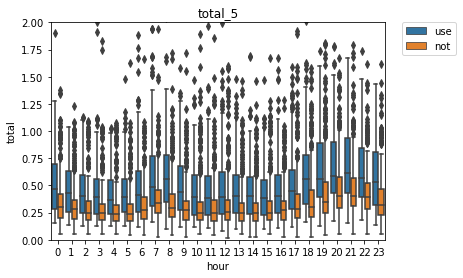

In [38]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_5')
plt.show()

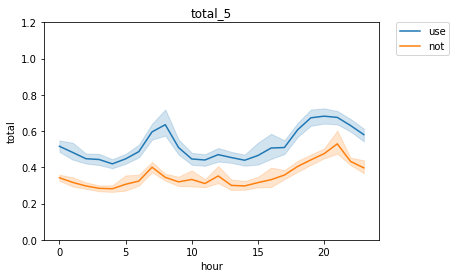

In [39]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_5')
plt.show()

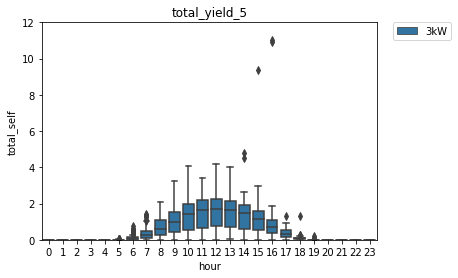

In [40]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_5')
plt.show()

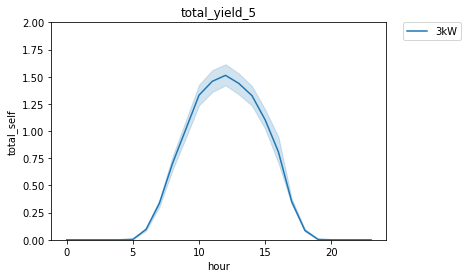

In [41]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_5')
plt.show()

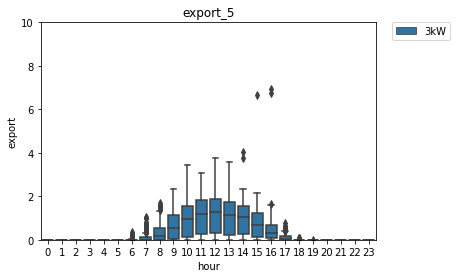

In [42]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_5')
plt.show()

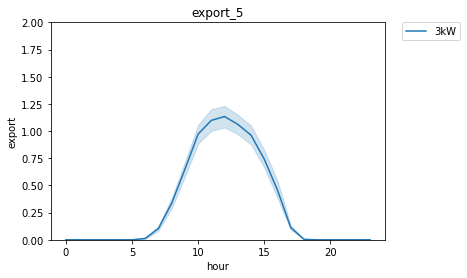

In [43]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_5')
plt.show()

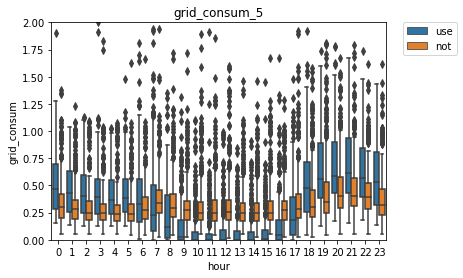

In [44]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_5')
plt.show()

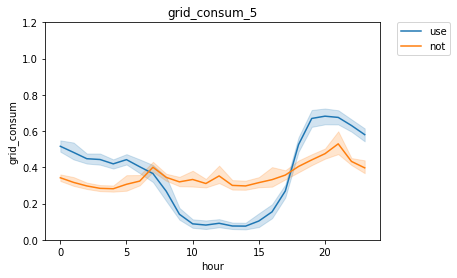

In [45]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_5, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_5')
plt.show()

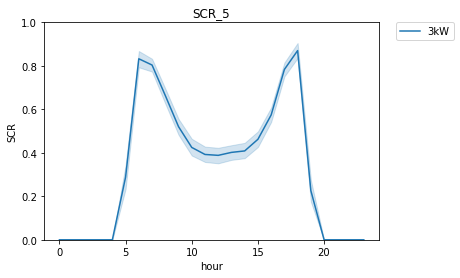

In [46]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_5')
plt.show()

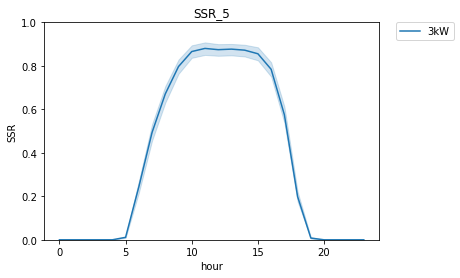

In [47]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_5, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_5')
plt.show()

<hr>

### 2021.06

In [48]:
df_all_hour_21_6 = df_all_hour[df_all_hour.ym == '2021/6']

In [49]:
# 총 전력 소비량
df_all_hour_21_6.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   489.0  0.390653  0.528171  0.069977  0.219971  0.299988  0.420044   
     1   490.0  0.333470  0.217830  0.049988  0.192490  0.260010  0.390015   
     2   490.0  0.303225  0.204766  0.059998  0.179993  0.239990  0.349976   
     3   489.0  0.300962  0.261223  0.059998  0.170044  0.239990  0.349976   
     4   493.0  0.277211  0.176887  0.059998  0.169983  0.230011  0.320068   
     5   479.0  0.285157  0.185164  0.049988  0.169983  0.239990  0.320007   
     6   473.0  0.318646  0.201582  0.059998  0.190002  0.270020  0.400024   
     7   470.0  0.399150  0.243075  0.059998  0.250000  0.340027  0.489990   
     8   472.0  0.354491  0.334517  0.049988  0.200012  0.290009  0.429993   
     9   482.0  0.334793  0.308724  0.059998  0.160034  0.279968  0.400017   
     10  476.0  0.312586  0.316581  0.059998  0.160034  0.260010  0.369995   
     11  482.0  0.307073  0.281988  0.059998  0.162506  0.250000  0.367508   
     12  480.0  0.323501  0.467802  0.059998  0.169983  0.260010  0.369995   
     13  482.0  0.320196  0.323722  0.059998  0.159973  0.250000  0.370056   
     14  486.0  0.330865  0.426177  0.059998  0.170021  0.260010  0.359985   
     15  487.0  0.335337  0.423998  0.049988  0.179993  0.260010  0.380005   
     16  482.0  0.319273  0.230397  0.059998  0.179993  0.270020  0.380005   
     17  483.0  0.335943  0.250184  0.059998  0.179993  0.280029  0.404968   
     18  482.0  0.407655  0.353114  0.059998  0.190002  0.299988  0.479980   
     19  485.0  0.466866  0.670702  0.059998  0.210022  0.330017  0.510010   
     20  486.0  0.505228  0.552238  0.079987  0.270020  0.399994  0.570007   
     21  488.0  0.499161  0.338555  0.119995  0.309998  0.410034  0.599983   
     22  490.0  0.462734  0.308486  0.089996  0.280029  0.380005  0.559998   
     23  486.0  0.410659  0.321768  0.089996  0.239990  0.329971  0.470032   
use  0   265.0  0.491639  0.248533  0.159973  0.260010  0.459961  0.640015   
     1   264.0  0.461590  0.255435  0.139984  0.250000  0.419952  0.592560   
     2   263.0  0.421546  0.198815  0.140015  0.250000  0.390015  0.549988   
     3   264.0  0.416933  0.217726  0.140015  0.240044  0.369995  0.532516   
     4   259.0  0.393833  0.198183  0.139984  0.220032  0.359985  0.510010   
     5   255.0  0.400312  0.194590  0.140015  0.245026  0.349976  0.505005   
     6   253.0  0.466950  0.348053  0.129944  0.250000  0.380005  0.630005   
     7   256.0  0.569838  0.356096  0.169952  0.299988  0.454956  0.752594   
     8   256.0  0.558699  0.295256  0.150024  0.330078  0.489960  0.710022   
     9   256.0  0.523841  0.492259  0.110107  0.270020  0.459991  0.650040   
     10  261.0  0.472052  0.366035  0.129944  0.250000  0.430054  0.580017   
     11  261.0  0.468550  0.326413  0.110046  0.239990  0.440125  0.589996   
     12  262.0  0.525720  0.415895  0.109985  0.260025  0.450012  0.669983   
     13  264.0  0.505148  0.359382  0.119934  0.280014  0.455063  0.610046   
     14  265.0  0.489253  0.397438  0.130005  0.260071  0.420044  0.600037   
     15  266.0  0.506027  0.529067  0.120026  0.270020  0.440002  0.607407   
     16  267.0  0.487081  0.297159  0.119873  0.264984  0.449951  0.610001   
     17  265.0  0.521737  0.285515  0.149872  0.309906  0.450073  0.669983   
     18  267.0  0.611071  0.352250  0.160004  0.325027  0.510071  0.819946   
     19  267.0  0.642279  0.347654  0.129944  0.390015  0.570007  0.824951   
     20  268.0  0.664597  0.305284  0.170013  0.429993  0.589966  0.850052   
     21  267.0  0.637119  0.274125  0.188599  0.410019  0.600037  0.819977   
     22  267.0  0.622928  0.331547  0.179993  0.375031  0.559998  0.809998   
     23  262.0  0.565225  0.322388  0.140015  0.302490  0.519989  0.739990   

               max  
type 시간             
not  0   10.599976  
     1    1.390015  
     2    1.979980  
   

In [50]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   259.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   255.0  0.009724  0.013755  0.000000  0.000000  0.009949   
         6   253.0  0.127997  0.105593  0.000000  0.049927  0.110046   
         7   256.0  0.383057  0.243939  0.000000  0.229980  0.334991   
         8   256.0  0.715590  0.414749  0.000000  0.400024  0.640015   
         9   256.0  1.062683  0.562320  0.000000  0.659912  1.029999   
         10  261.0  1.306863  0.625249  0.070007  0.820068  1.390015   
         11  261.0  1.419642  0.673659  0.140015  0.900024  1.510010   
         12  262.0  1.505679  0.889328  0.000000  0.942535  1.610046   
         13  264.0  1.441563  0.841587  0.099976  0.927521  1.505005   
         14  265.0  1.369438  0.999547  0.010010  0.859985  1.419922   
         15  266.0  1.079328  0.598934  0.019897  0.672546  1.125000   
         16  267.0  0.755961  0.408954  0.000000  0.454987  0.760010   
         17  265.0  0.399726  0.220246  0.000000  0.240112  0.369995   
         18  267.0  0.139279  0.142008  0.000000  0.069946  0.130005   
         19  267.0  0.014249  0.046534  0.000000  0.000000  0.010010   
         20  268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  262.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.010010   0.079956  
         6   0.189941   0.760010  
         7   0.510010   1.189941  
         8   1.032532   1.940063  
         9   1.532532   2.510010  
         10  1.819946   3.180420  
         11  1.969971   4.231323  
         12  2.027435   8.669922  
         13  1.949951   9.620117  
         14  1.809937  11.100037  
         15  1.469971   5.750000  
         16  1.020020   2.470093  
         17  0.550049   1.599365  
         18  0.179932   1.599243  
         19  0.020020   0.704712  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [51]:
# 총 전력 수출량
df_all_hour_21_6_use = df_all_hour_21_6[df_all_hour_21_6.type == 'use']
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   264.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   263.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   264.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   259.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   255.0  0.000039  0.000627  0.0  0.000000  0.000000  0.000000   
         6   253.0  0.015106  0.040485  0.0  0.000000  0.000000  0.010010   
         7   256.0  0.120664  0.168177  0.0  0.000000  0.050049  0.172516   
         8   256.0  0.343676  0.369159  0.0  0.020012  0.239990  0.547531   
         9   256.0  0.658863  0.547042  0.0  0.130005  0.595001  1.082520   
         10  261.0  0.896023  0.626206  0.0  0.299988  0.940002  1.419922   
         11  261.0  1.001984  0.663384  0.0  0.369995  1.060059  1.539978   
         12  262.0  1.061213  0.810757  0.0  0.420013  1.035034  1.600021   
         13  264.0  1.005161  0.774974  0.0  0.367500  0.984985  1.579971   
         14  265.0  0.939385  0.855278  0.0  0.320007  0.880005  1.419983   
         15  266.0  0.671604  0.530474  0.0  0.152451  0.659973  1.060043   
         16  267.0  0.394710  0.373539  0.0  0.049988  0.329956  0.614990   
         17  265.0  0.118077  0.153403  0.0  0.000000  0.049988  0.169983   
         18  267.0  0.006592  0.018397  0.0  0.000000  0.000000  0.000000   
         19  267.0  0.000487  0.007376  0.0  0.000000  0.000000  0.000000   
         20  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  267.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  262.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.010010  
         6   0.400024  
         7   0.849976  
         8   1.589966  
         9   2.109985  
         10  2.360046  
         11  2.300049  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  3.030029  
         16  2.080017  
         17  0.619995  
         18  0.120178  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [52]:
# 총 그리드 소비량
df_all_hour_21_6.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   489.0  0.390653  0.528171  0.069977  0.219971  0.299988  0.420044   
     1   490.0  0.333470  0.217830  0.049988  0.192490  0.260010  0.390015   
     2   490.0  0.303225  0.204766  0.059998  0.179993  0.239990  0.349976   
     3   489.0  0.300962  0.261223  0.059998  0.170044  0.239990  0.349976   
     4   493.0  0.277211  0.176887  0.059998  0.169983  0.230011  0.320068   
     5   479.0  0.285157  0.185164  0.049988  0.169983  0.239990  0.320007   
     6   473.0  0.318646  0.201582  0.059998  0.190002  0.270020  0.400024   
     7   470.0  0.399150  0.243075  0.059998  0.250000  0.340027  0.489990   
     8   472.0  0.354491  0.334517  0.049988  0.200012  0.290009  0.429993   
     9   482.0  0.334793  0.308724  0.059998  0.160034  0.279968  0.400017   
     10  476.0  0.312586  0.316581  0.059998  0.160034  0.260010  0.369995   
     11  482.0  0.307073  0.281988  0.059998  0.162506  0.250000  0.367508   
     12  480.0  0.323501  0.467802  0.059998  0.169983  0.260010  0.369995   
     13  482.0  0.320196  0.323722  0.059998  0.159973  0.250000  0.370056   
     14  486.0  0.330865  0.426177  0.059998  0.170021  0.260010  0.359985   
     15  487.0  0.335337  0.423998  0.049988  0.179993  0.260010  0.380005   
     16  482.0  0.319273  0.230397  0.059998  0.179993  0.270020  0.380005   
     17  483.0  0.335943  0.250184  0.059998  0.179993  0.280029  0.404968   
     18  482.0  0.407655  0.353114  0.059998  0.190002  0.299988  0.479980   
     19  485.0  0.466866  0.670702  0.059998  0.210022  0.330017  0.510010   
     20  486.0  0.505228  0.552238  0.079987  0.270020  0.399994  0.570007   
     21  488.0  0.499161  0.338555  0.119995  0.309998  0.410034  0.599983   
     22  490.0  0.462734  0.308486  0.089996  0.280029  0.380005  0.559998   
     23  486.0  0.410659  0.321768  0.089996  0.239990  0.329971  0.470032   
use  0   265.0  0.491639  0.248533  0.159973  0.260010  0.459961  0.640015   
     1   264.0  0.461590  0.255435  0.139984  0.250000  0.419952  0.592560   
     2   263.0  0.421546  0.198815  0.140015  0.250000  0.390015  0.549988   
     3   264.0  0.416933  0.217726  0.140015  0.240044  0.369995  0.532516   
     4   259.0  0.393833  0.198183  0.139984  0.220032  0.359985  0.510010   
     5   255.0  0.390628  0.196039  0.130005  0.239990  0.330017  0.489990   
     6   253.0  0.354059  0.363998  0.010010  0.129974  0.250000  0.490112   
     7   256.0  0.307444  0.346931  0.000000  0.040001  0.170029  0.492538   
     8   256.0  0.186786  0.249760  0.000000  0.000000  0.070007  0.290039   
     9   256.0  0.120021  0.387291  0.000000  0.000000  0.019958  0.092491   
     10  261.0  0.061213  0.207825  0.000000  0.000000  0.000000  0.039917   
     11  261.0  0.050891  0.134507  0.000000  0.000000  0.000000  0.029968   
     12  262.0  0.081254  0.214307  0.000000  0.000000  0.000000  0.059998   
     13  264.0  0.068745  0.154493  0.000000  0.000000  0.000000  0.062485   
     14  265.0  0.059201  0.133437  0.000000  0.000000  0.000000  0.040039   
     15  266.0  0.098303  0.308391  0.000000  0.000000  0.009949  0.107483   
     16  267.0  0.125830  0.202880  0.000000  0.000000  0.029968  0.190063   
     17  265.0  0.240088  0.259267  0.000000  0.040039  0.150024  0.350037   
     18  267.0  0.478384  0.347697  0.029968  0.194977  0.385010  0.715027   
     19  267.0  0.628517  0.346064  0.129944  0.380005  0.559998  0.804993   
     20  268.0  0.664597  0.305284  0.170013  0.429993  0.589966  0.850052   
     21  267.0  0.637119  0.274125  0.188599  0.410019  0.600037  0.819977   
     22  267.0  0.622928  0.331547  0.179993  0.375031  0.559998  0.809998   
     23  262.0  0.565225  0.322388  0.140015  0.302490  0.519989  0.739990   

               max  
type 시간             
not  0   10.599976  
     1    1.390015  
     2    1.979980  
   

In [53]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   259.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   255.0  0.520914  0.499997  0.000000  0.000000  1.000000   
         6   253.0  0.856646  0.284939  0.000000  0.842274  1.000000   
         7   256.0  0.779132  0.240491  0.000000  0.603925  0.850890   
         8   256.0  0.642163  0.291320  0.000000  0.368828  0.653720   
         9   256.0  0.500064  0.303525  0.000000  0.212783  0.436214   
         10  261.0  0.414665  0.279771  0.074089  0.174235  0.335163   
         11  261.0  0.388127  0.273309  0.045662  0.149996  0.307667   
         12  262.0  0.394930  0.277660  0.000000  0.159313  0.318995   
         13  264.0  0.400705  0.272483  0.058830  0.182045  0.322910   
         14  265.0  0.412508  0.272723  0.075359  0.176918  0.322971   
         15  266.0  0.486206  0.293963  0.087900  0.224721  0.415550   
         16  267.0  0.585891  0.294257  0.000000  0.304257  0.585119   
         17  265.0  0.770099  0.249134  0.000000  0.603754  0.843822   
         18  267.0  0.923352  0.218257  0.000000  0.944407  1.000000   
         19  267.0  0.551897  0.497058  0.000000  0.000000  1.000000   
         20  268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  262.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   1.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.948888  1.0  
         9   0.762172  1.0  
         10  0.615336  1.0  
         11  0.571470  1.0  
         12  0.557604  1.0  
         13  0.573873  1.0  
         14  0.598112  1.0  
         15  0.752944  1.0  
         16  0.874890  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  1.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [54]:
# SSR(자가공급률)
df_all_hour_21_6_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   259.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   255.0  0.028923  0.039864  0.000000  0.000000  0.015166   
         6   253.0  0.327599  0.251029  0.000000  0.094011  0.295130   
         7   256.0  0.579976  0.306836  0.000000  0.308308  0.628031   
         8   256.0  0.742545  0.272499  0.000000  0.566926  0.841055   
         9   256.0  0.854643  0.221016  0.000000  0.816765  0.960017   
         10  261.0  0.921474  0.166537  0.128975  0.934129  1.000000   
         11  261.0  0.925761  0.157803  0.095248  0.948221  1.000000   
         12  262.0  0.902828  0.187282  0.000000  0.900680  1.000000   
         13  264.0  0.904085  0.171703  0.130077  0.875745  1.000000   
         14  265.0  0.915161  0.165414  0.020426  0.907967  1.000000   
         15  266.0  0.873510  0.216315  0.024414  0.819761  0.983228   
         16  267.0  0.806552  0.262364  0.000000  0.688230  0.936250   
         17  265.0  0.626789  0.280355  0.000000  0.396176  0.675011   
         18  267.0  0.281090  0.217068  0.000000  0.098803  0.222222   
         19  267.0  0.026712  0.045826  0.000000  0.000000  0.010880   
         20  268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  262.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.043516  0.210662  
         6   0.533171  0.947318  
         7   0.865126  1.000000  
         8   1.000000  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.888798  1.000000  
         18  0.438306  0.903533  
         19  0.037447  0.501673  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

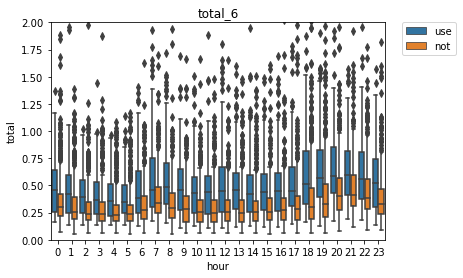

In [55]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_6')
plt.show()

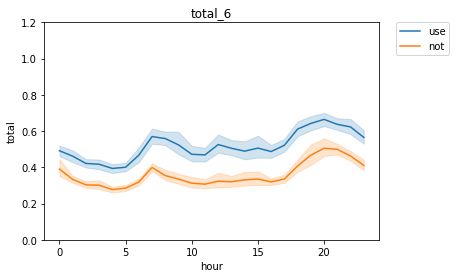

In [56]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_6')
plt.show()

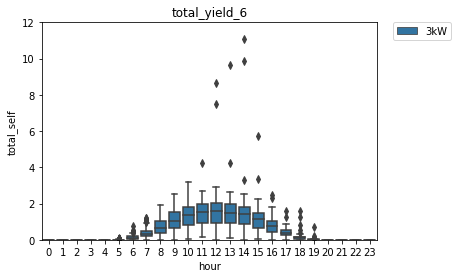

In [57]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_6')
plt.show()

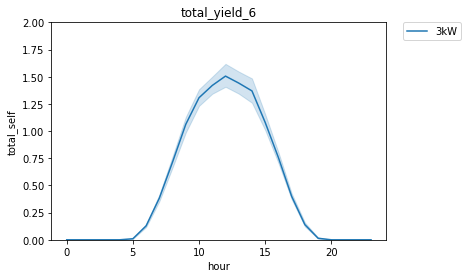

In [58]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_6')
plt.show()

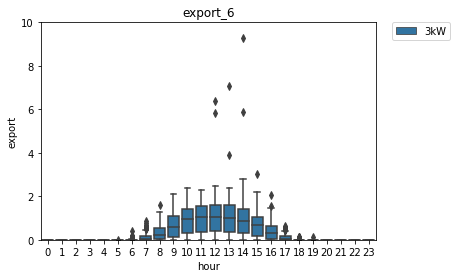

In [59]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_6')
plt.show()

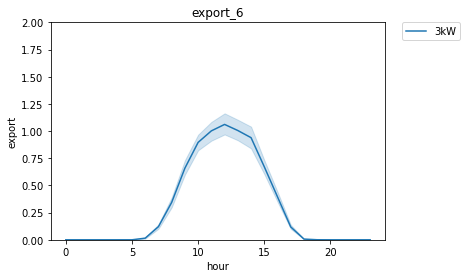

In [60]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_6')
plt.show()

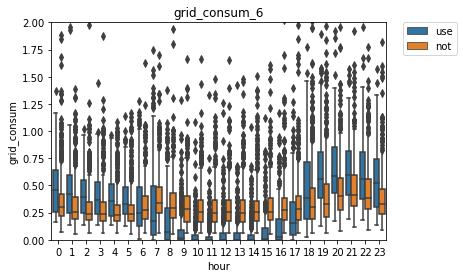

In [61]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_6')
plt.show()

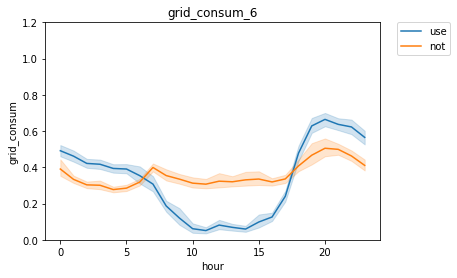

In [62]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_6, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_6')
plt.show()

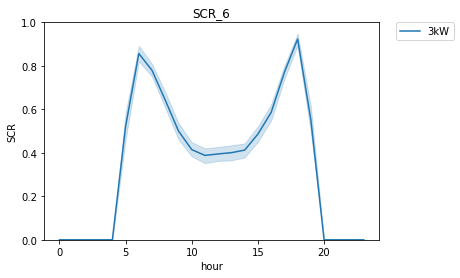

In [63]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_6')
plt.show()

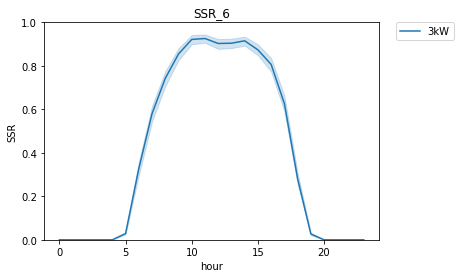

In [64]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_6, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_6')
plt.show()

<hr>

### 2021.07

In [65]:
df_all_hour_21_7 = df_all_hour[df_all_hour.ym == '2021/7']

In [66]:
# 총 전력 소비량
df_all_hour_21_7.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.457966  0.284324  0.049988  0.235016  0.380005  0.609985   
     1   530.0  0.423206  0.329400  0.059998  0.220009  0.339996  0.559937   
     2   530.0  0.377777  0.240066  0.059998  0.200012  0.319946  0.507507   
     3   531.0  0.346614  0.221970  0.059998  0.190002  0.300049  0.459961   
     4   530.0  0.317051  0.194629  0.059998  0.180054  0.279938  0.390015   
     5   528.0  0.308939  0.194807  0.049988  0.179993  0.250000  0.390015   
     6   533.0  0.385176  0.332072  0.059998  0.209961  0.320007  0.440063   
     7   534.0  0.459081  0.382177  0.059998  0.279968  0.380005  0.510010   
     8   532.0  0.402632  0.298798  0.059998  0.229980  0.355042  0.469971   
     9   529.0  0.400680  0.324328  0.059998  0.219971  0.329956  0.469971   
     10  529.0  0.384781  0.269721  0.049988  0.220032  0.330017  0.469971   
     11  528.0  0.461746  0.909194  0.049988  0.200012  0.339966  0.489990   
     12  526.0  0.427814  0.365155  0.049988  0.180054  0.340027  0.529999   
     13  528.0  0.456228  0.526466  0.059998  0.187469  0.334991  0.522491   
     14  526.0  0.454561  0.416799  0.059998  0.210022  0.340027  0.530029   
     15  519.0  0.461889  0.427150  0.050049  0.229980  0.339966  0.545044   
     16  522.0  0.540017  1.020013  0.049988  0.239990  0.359985  0.557465   
     17  527.0  0.580059  0.713075  0.059998  0.260010  0.390015  0.670044   
     18  526.0  0.639300  0.709804  0.059998  0.250000  0.429993  0.730072   
     19  526.0  0.623762  0.571863  0.069977  0.279968  0.440033  0.760010   
     20  530.0  0.722132  0.666691  0.059998  0.350037  0.519974  0.840073   
     21  530.0  0.684003  0.530925  0.059998  0.380005  0.539978  0.819992   
     22  532.0  0.618665  0.487605  0.070007  0.329956  0.500000  0.789932   
     23  527.0  0.519279  0.376458  0.059998  0.269989  0.419922  0.690033   
use  0   270.0  0.582561  0.349470  0.169983  0.319962  0.500000  0.750000   
     1   274.0  0.528521  0.293595  0.159973  0.279968  0.475006  0.719971   
     2   274.0  0.464081  0.215034  0.150024  0.260010  0.430023  0.647552   
     3   272.0  0.456354  0.229896  0.159973  0.239990  0.410034  0.640015   
     4   270.0  0.443304  0.224037  0.160034  0.239990  0.380005  0.620087   
     5   269.0  0.448177  0.205844  0.159973  0.240051  0.429993  0.620117   
     6   272.0  0.498319  0.464953  0.179993  0.270020  0.399963  0.640015   
     7   272.0  0.608915  0.677508  0.209961  0.327499  0.480011  0.740021   
     8   273.0  0.680575  0.718649  0.180023  0.409851  0.559937  0.829956   
     9   271.0  0.604598  0.370105  0.150024  0.354980  0.539917  0.770081   
     10  273.0  0.587128  0.351754  0.150024  0.330017  0.500000  0.720001   
     11  272.0  0.715136  0.777885  0.139893  0.340073  0.557312  0.820084   
     12  272.0  0.749315  0.551688  0.159973  0.379974  0.615036  0.922516   
     13  266.0  0.815981  0.660833  0.149902  0.392502  0.620056  0.935028   
     14  266.0  0.813221  0.634725  0.150024  0.380005  0.610016  0.987488   
     15  266.0  0.815290  0.613991  0.140015  0.390015  0.629974  1.064957   
     16  269.0  0.773590  0.576020  0.160034  0.385010  0.570068  1.030212   
     17  271.0  0.793364  0.512857  0.180023  0.399963  0.649902  1.069916   
     18  267.0  0.945682  0.626007  0.200012  0.430084  0.750183  1.299927   
     19  267.0  1.066605  0.742146  0.200012  0.510010  0.849854  1.469910   
     20  266.0  0.987991  0.626725  0.169983  0.529984  0.829956  1.247498   
     21  270.0  0.929081  0.510385  0.219971  0.588730  0.810028  1.147522   
     22  269.0  0.835734  0.493990  0.210022  0.500000  0.739990  1.020020   
     23  268.0  0.670683  0.414328  0.180054  0.400024  0.559998  0.829971   

               max  
type 시간             
not  0    2.150024  
     1    4.840027  
     2    1.969971  
   

In [67]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   269.0  0.003456  0.006713  0.0  0.000000  0.000000  0.009888   
         6   272.0  0.090087  0.088961  0.0  0.020020  0.070007  0.130005   
         7   272.0  0.311425  0.235171  0.0  0.150024  0.289978  0.430054   
         8   273.0  0.649034  0.400780  0.0  0.369995  0.599976  0.909912   
         9   271.0  0.979417  0.556851  0.0  0.640015  0.920044  1.399963   
         10  273.0  1.233469  0.625951  0.0  0.859985  1.270020  1.690063   
         11  272.0  1.388023  0.654876  0.0  0.910004  1.494995  1.902496   
         12  272.0  1.446451  0.678977  0.0  0.957581  1.510010  2.002502   
         13  266.0  1.427127  0.670542  0.0  0.892487  1.559998  1.910034   
         14  266.0  1.288359  0.680447  0.0  0.752502  1.434998  1.790039   
         15  266.0  1.089419  0.890074  0.0  0.599976  1.160034  1.469971   
         16  269.0  0.735283  0.430309  0.0  0.429932  0.750000  1.040039   
         17  271.0  0.397969  0.315157  0.0  0.219971  0.369995  0.585022   
         18  267.0  0.122572  0.079926  0.0  0.054993  0.130005  0.179932   
         19  267.0  0.012471  0.021027  0.0  0.000000  0.010010  0.019897   
         20  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.040039  
         6    0.520020  
         7    1.309937  
         8    1.760010  
         9    3.270020  
         10   3.660034  
         11   3.069946  
         12   4.169922  
         13   4.550049  
         14   5.600098  
         15  11.300049  
         16   2.819946  
         17   3.869995  
         18   0.349976  
         19   0.190063  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [68]:
# 총 전력 수출량
df_all_hour_21_7_use = df_all_hour_21_7[df_all_hour_21_7.type == 'use']
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   272.0  0.006508  0.027379  0.0  0.000000  0.000000  0.000000   
         7   272.0  0.070204  0.136279  0.0  0.000000  0.010010  0.079987   
         8   273.0  0.260404  0.300298  0.0  0.010010  0.150024  0.400024   
         9   271.0  0.525818  0.470899  0.0  0.089996  0.420044  0.859985   
         10  273.0  0.754954  0.582618  0.0  0.279999  0.689941  1.180054   
         11  272.0  0.833074  0.618369  0.0  0.279999  0.769958  1.369995   
         12  272.0  0.859824  0.634565  0.0  0.327515  0.789948  1.329971   
         13  266.0  0.816134  0.623964  0.0  0.229980  0.819946  1.347473   
         14  266.0  0.689313  0.612247  0.0  0.125023  0.564972  1.210022   
         15  266.0  0.541031  0.721792  0.0  0.049957  0.399994  0.837524   
         16  269.0  0.292343  0.336840  0.0  0.000000  0.169983  0.479980   
         17  271.0  0.083615  0.150843  0.0  0.000000  0.010010  0.119995   
         18  267.0  0.003332  0.012000  0.0  0.000000  0.000000  0.000000   
         19  267.0  0.000080  0.001227  0.0  0.000000  0.000000  0.000000   
         20  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.290039  
         7   0.890015  
         8   1.390015  
         9   1.680054  
         10  3.140015  
         11  2.100098  
         12  3.260010  
         13  3.359985  
         14  4.000000  
         15  8.160034  
         16  2.239990  
         17  1.410034  
         18  0.109985  
         19  0.020020  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [69]:
# 총 그리드 소비량
df_all_hour_21_7.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.457966  0.284324  0.049988  0.235016  0.380005  0.609985   
     1   530.0  0.423206  0.329400  0.059998  0.220009  0.339996  0.559937   
     2   530.0  0.377777  0.240066  0.059998  0.200012  0.319946  0.507507   
     3   531.0  0.346614  0.221970  0.059998  0.190002  0.300049  0.459961   
     4   530.0  0.317051  0.194629  0.059998  0.180054  0.279938  0.390015   
     5   528.0  0.308939  0.194807  0.049988  0.179993  0.250000  0.390015   
     6   533.0  0.385176  0.332072  0.059998  0.209961  0.320007  0.440063   
     7   534.0  0.459081  0.382177  0.059998  0.279968  0.380005  0.510010   
     8   532.0  0.402632  0.298798  0.059998  0.229980  0.355042  0.469971   
     9   529.0  0.400680  0.324328  0.059998  0.219971  0.329956  0.469971   
     10  529.0  0.384781  0.269721  0.049988  0.220032  0.330017  0.469971   
     11  528.0  0.461746  0.909194  0.049988  0.200012  0.339966  0.489990   
     12  526.0  0.427814  0.365155  0.049988  0.180054  0.340027  0.529999   
     13  528.0  0.456228  0.526466  0.059998  0.187469  0.334991  0.522491   
     14  526.0  0.454561  0.416799  0.059998  0.210022  0.340027  0.530029   
     15  519.0  0.461889  0.427150  0.050049  0.229980  0.339966  0.545044   
     16  522.0  0.540017  1.020013  0.049988  0.239990  0.359985  0.557465   
     17  527.0  0.580059  0.713075  0.059998  0.260010  0.390015  0.670044   
     18  526.0  0.639300  0.709804  0.059998  0.250000  0.429993  0.730072   
     19  526.0  0.623762  0.571863  0.069977  0.279968  0.440033  0.760010   
     20  530.0  0.722132  0.666691  0.059998  0.350037  0.519974  0.840073   
     21  530.0  0.684003  0.530925  0.059998  0.380005  0.539978  0.819992   
     22  532.0  0.618665  0.487605  0.070007  0.329956  0.500000  0.789932   
     23  527.0  0.519279  0.376458  0.059998  0.269989  0.419922  0.690033   
use  0   270.0  0.582561  0.349470  0.169983  0.319962  0.500000  0.750000   
     1   274.0  0.528521  0.293595  0.159973  0.279968  0.475006  0.719971   
     2   274.0  0.464081  0.215034  0.150024  0.260010  0.430023  0.647552   
     3   272.0  0.456354  0.229896  0.159973  0.239990  0.410034  0.640015   
     4   270.0  0.443304  0.224037  0.160034  0.239990  0.380005  0.620087   
     5   269.0  0.444721  0.205456  0.159973  0.240051  0.420044  0.619995   
     6   272.0  0.414740  0.474216  0.039978  0.190002  0.300018  0.582520   
     7   272.0  0.367694  0.683739  0.000000  0.089966  0.240021  0.500000   
     8   273.0  0.291945  0.694916  0.000000  0.010010  0.119995  0.400146   
     9   271.0  0.150999  0.238998  0.000000  0.000000  0.039978  0.209976   
     10  273.0  0.108612  0.206364  0.000000  0.000000  0.010010  0.119995   
     11  272.0  0.160187  0.552275  0.000000  0.000000  0.010010  0.139915   
     12  272.0  0.162688  0.321274  0.000000  0.000000  0.010010  0.172531   
     13  266.0  0.204988  0.396445  0.000000  0.000000  0.014954  0.237488   
     14  266.0  0.214175  0.364075  0.000000  0.000000  0.019958  0.307510   
     15  266.0  0.266901  0.416153  0.000000  0.000000  0.059998  0.397507   
     16  269.0  0.330650  0.488683  0.000000  0.010010  0.130005  0.489990   
     17  271.0  0.479011  0.459800  0.000000  0.115021  0.309998  0.791016   
     18  267.0  0.826441  0.625718  0.050049  0.324982  0.650024  1.164978   
     19  267.0  1.054214  0.744017  0.179993  0.480011  0.830078  1.454956   
     20  266.0  0.987991  0.626725  0.169983  0.529984  0.829956  1.247498   
     21  270.0  0.929081  0.510385  0.219971  0.588730  0.810028  1.147522   
     22  269.0  0.835734  0.493990  0.210022  0.500000  0.739990  1.020020   
     23  268.0  0.670683  0.414328  0.180054  0.400024  0.559998  0.829971   

               max  
type 시간             
not  0    2.150024  
     1    4.840027  
     2    1.969971  
   

In [70]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   269.0  0.263941  0.441589  0.0  0.000000  0.000000  1.000000  1.0
         6   272.0  0.833695  0.348748  0.0  0.916582  1.000000  1.000000  1.0
         7   272.0  0.794120  0.281146  0.0  0.696731  0.902825  1.000000  1.0
         8   273.0  0.673498  0.281511  0.0  0.452485  0.679258  0.962578  1.0
         9   271.0  0.542917  0.296714  0.0  0.281367  0.500000  0.835717  1.0
         10  273.0  0.476508  0.288669  0.0  0.222233  0.403633  0.693008  1.0
         11  272.0  0.479618  0.295523  0.0  0.219254  0.425988  0.702739  1.0
         12  272.0  0.475257  0.283699  0.0  0.234976  0.392662  0.698823  1.0
         13  266.0  0.493436  0.297558  0.0  0.234146  0.409672  0.754460  1.0
         14  266.0  0.549127  0.310188  0.0  0.279114  0.485273  0.861143  1.0
         15  266.0  0.597016  0.302680  0.0  0.330191  0.574609  0.901033  1.0
         16  269.0  0.682077  0.283592  0.0  0.464473  0.703888  0.982797  1.0
         17  271.0  0.826266  0.247586  0.0  0.724422  0.947312  1.000000  1.0
         18  267.0  0.913951  0.257940  0.0  1.000000  1.000000  1.000000  1.0
         19  267.0  0.561173  0.496601  0.0  0.000000  1.000000  1.000000  1.0
         20  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [71]:
# SSR(자가공급률)
df_all_hour_21_7_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   269.0  0.008771  0.018365  0.0  0.000000  0.000000  0.013171   
         6   272.0  0.215203  0.201561  0.0  0.049333  0.157874  0.335528   
         7   272.0  0.499167  0.312666  0.0  0.224986  0.516755  0.782600   
         8   273.0  0.683924  0.315344  0.0  0.474224  0.764720  0.961505   
         9   271.0  0.799607  0.287100  0.0  0.721204  0.933279  1.000000   
         10  273.0  0.855835  0.250381  0.0  0.855006  0.984786  1.000000   
         11  272.0  0.861691  0.233868  0.0  0.805820  0.984238  1.000000   
         12  272.0  0.856317  0.232751  0.0  0.792527  0.981290  1.000000   
         13  266.0  0.843717  0.244413  0.0  0.757812  0.973424  1.000000   
         14  266.0  0.816175  0.257737  0.0  0.669466  0.964501  1.000000   
         15  266.0  0.763359  0.288974  0.0  0.593664  0.899358  1.000000   
         16  269.0  0.690096  0.309287  0.0  0.445369  0.787245  0.981115   
         17  271.0  0.494429  0.303935  0.0  0.231507  0.447229  0.733808   
         18  267.0  0.188183  0.177792  0.0  0.056991  0.125114  0.264775   
         19  267.0  0.019646  0.038237  0.0  0.000000  0.005241  0.020622   
         20  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.103535  
         6   0.846136  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.807512  
         19  0.320820  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

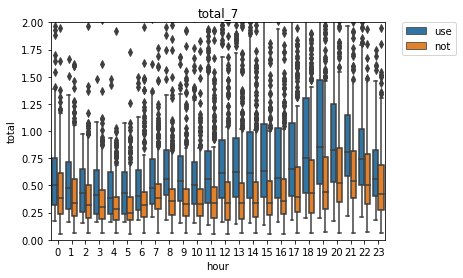

In [72]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_7')
plt.show()

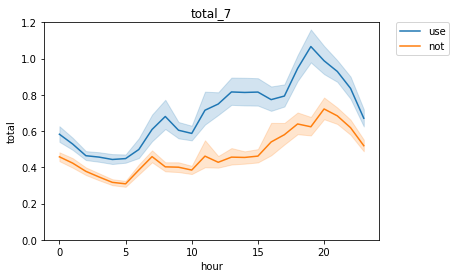

In [73]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_7')
plt.show()

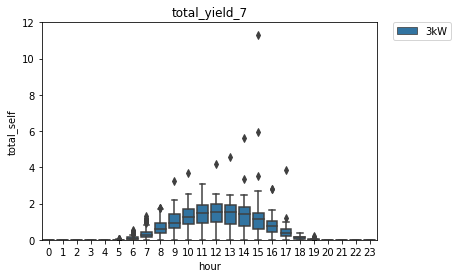

In [74]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_7')
plt.show()

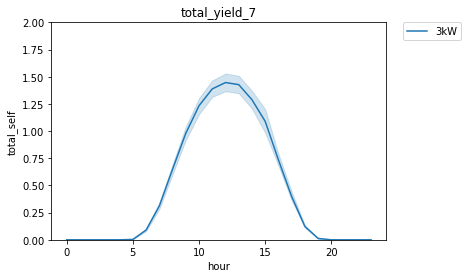

In [75]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_7')
plt.show()

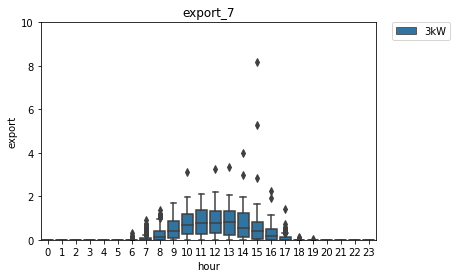

In [76]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_7')
plt.show()

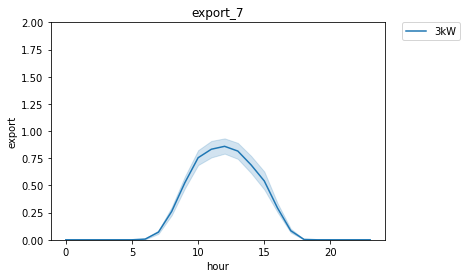

In [77]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_7')
plt.show()

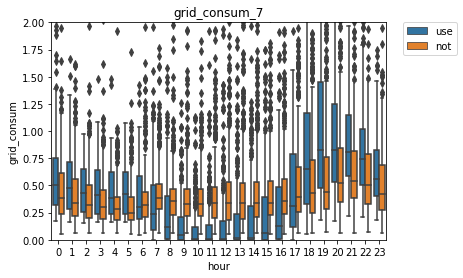

In [78]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_7')
plt.show()

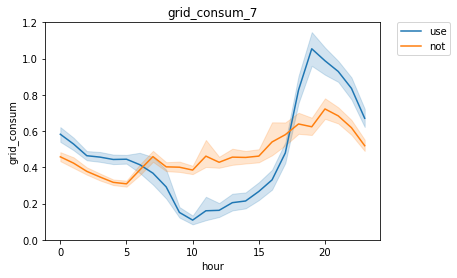

In [79]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_7, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_7')
plt.show()

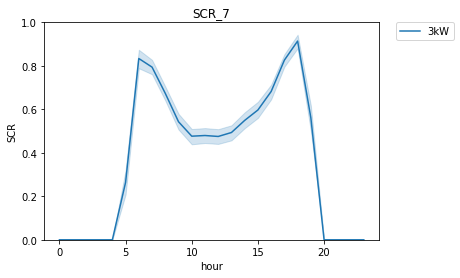

In [80]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_7')
plt.show()

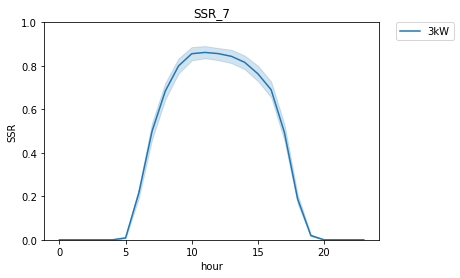

In [81]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_7, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_7')
plt.show()

<hr>

### 2021.08

In [82]:
df_all_hour_21_8 = df_all_hour[df_all_hour.ym == '2021/8']

In [83]:
# 총 전력 소비량
df_all_hour_21_8.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.456194  0.534713  0.079956  0.219971  0.359985  0.560059   
     1   539.0  0.398076  0.269208  0.070007  0.200043  0.320068  0.530029   
     2   533.0  0.356849  0.224887  0.059998  0.189941  0.309937  0.479980   
     3   532.0  0.329267  0.206660  0.059998  0.170044  0.280029  0.420044   
     4   534.0  0.317208  0.210917  0.059998  0.169983  0.269958  0.400024   
     5   535.0  0.306766  0.270120  0.049988  0.160034  0.250000  0.390015   
     6   533.0  0.341407  0.263417  0.049988  0.190063  0.289917  0.419922   
     7   533.0  0.430338  0.617187  0.059998  0.230042  0.330078  0.459961   
     8   538.0  0.405279  0.361871  0.049988  0.219971  0.330078  0.479980   
     9   532.0  0.376613  0.299670  0.040039  0.209961  0.335022  0.459961   
     10  536.0  0.412109  0.834104  0.050018  0.217499  0.329956  0.469971   
     11  541.0  0.414378  0.415371  0.049988  0.180054  0.320068  0.479980   
     12  532.0  0.429400  0.413429  0.039978  0.187469  0.320068  0.492493   
     13  536.0  0.461087  0.814662  0.039978  0.190002  0.339966  0.510010   
     14  533.0  0.465305  0.847706  0.039978  0.199951  0.329956  0.469971   
     15  535.0  0.426170  0.400213  0.049988  0.209961  0.330017  0.484985   
     16  537.0  0.468026  0.581578  0.039978  0.229980  0.350098  0.529907   
     17  532.0  0.490733  0.495837  0.059998  0.219971  0.344971  0.579956   
     18  529.0  0.548806  0.615660  0.049988  0.230042  0.380005  0.609985   
     19  536.0  0.606013  0.525972  0.059998  0.260010  0.450073  0.750000   
     20  526.0  0.665035  0.595762  0.069946  0.329956  0.479980  0.760010   
     21  533.0  0.676943  0.798995  0.070007  0.339996  0.500000  0.760010   
     22  531.0  0.550510  0.444134  0.070007  0.280029  0.449951  0.670105   
     23  530.0  0.474530  0.358716  0.079956  0.239990  0.389999  0.609985   
use  0   276.0  0.584544  0.339149  0.160034  0.339966  0.489990  0.722565   
     1   276.0  0.561588  0.352674  0.169983  0.329956  0.470032  0.692535   
     2   275.0  0.498588  0.257904  0.160034  0.304993  0.450073  0.650024   
     3   276.0  0.467690  0.248134  0.159973  0.277435  0.420044  0.612366   
     4   274.0  0.443310  0.205366  0.179993  0.250000  0.404968  0.590088   
     5   272.0  0.466699  0.269661  0.170044  0.250000  0.411682  0.610016   
     6   273.0  0.481937  0.246364  0.150024  0.269958  0.429932  0.639893   
     7   268.0  0.561986  0.330580  0.190063  0.320068  0.469971  0.712433   
     8   272.0  0.690967  0.474615  0.160034  0.377411  0.549866  0.890137   
     9   272.0  0.625442  0.387580  0.150024  0.359985  0.534973  0.762543   
     10  273.0  0.594986  0.393410  0.150024  0.310181  0.499878  0.760010   
     11  269.0  0.639540  0.413850  0.160034  0.340088  0.530029  0.839722   
     12  266.0  0.732235  0.525328  0.144958  0.369904  0.580017  0.900024   
     13  269.0  0.733262  0.488110  0.160034  0.399780  0.589966  0.950073   
     14  270.0  0.700160  0.528892  0.159912  0.369995  0.570007  0.849945   
     15  270.0  0.727550  0.910518  0.139893  0.350098  0.550049  0.892426   
     16  273.0  0.746994  0.593139  0.149963  0.400024  0.540039  0.910034   
     17  272.0  0.838068  0.572646  0.180054  0.449921  0.664948  1.062653   
     18  272.0  0.909287  0.547517  0.219910  0.480072  0.714966  1.250000   
     19  276.0  0.924114  0.559302  0.179993  0.537445  0.789917  1.222473   
     20  276.0  0.875985  0.498329  0.250000  0.539917  0.739990  1.082581   
     21  276.0  0.836738  0.433982  0.169983  0.537445  0.729980  1.054993   
     22  273.0  0.777760  0.422954  0.180054  0.479980  0.660156  0.989990   
     23  277.0  0.684662  0.408323  0.169983  0.420044  0.590088  0.810059   

               max  
type 시간             
not  0   10.520020  
     1    2.330078  
     2    2.070068  
   

In [84]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   272.0  0.001661  0.023777  0.0  0.000000  0.000000  0.000000   
         6   273.0  0.039600  0.051323  0.0  0.000000  0.030029  0.059814   
         7   268.0  0.228549  0.188676  0.0  0.089966  0.199951  0.332520   
         8   272.0  0.512233  0.377332  0.0  0.199951  0.455017  0.752502   
         9   272.0  0.817805  0.546793  0.0  0.350067  0.770020  1.262878   
         10  273.0  1.027181  0.626878  0.0  0.500000  0.960083  1.540039   
         11  269.0  1.144867  0.653863  0.0  0.609985  1.109985  1.680054   
         12  266.0  1.198401  0.667110  0.0  0.630005  1.130005  1.757507   
         13  269.0  1.167658  0.672006  0.0  0.609863  1.150024  1.699951   
         14  270.0  1.025802  0.615801  0.0  0.530029  1.015015  1.529907   
         15  270.0  0.855270  0.620983  0.0  0.399933  0.784912  1.250000   
         16  273.0  0.594407  0.620977  0.0  0.260010  0.520020  0.829956   
         17  272.0  0.310138  0.581110  0.0  0.109985  0.229980  0.380005   
         18  272.0  0.065149  0.077369  0.0  0.010010  0.040039  0.090088   
         19  276.0  0.002609  0.012319  0.0  0.000000  0.000000  0.000000   
         20  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.391602  
         6   0.391602  
         7   1.030029  
         8   1.719971  
         9   2.750000  
         10  2.389893  
         11  2.469971  
         12  2.390015  
         13  3.589966  
         14  2.929932  
         15  6.550049  
         16  8.569946  
         17  9.150024  
         18  0.819946  
         19  0.130005  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [85]:
# 총 전력 수출량
df_all_hour_21_8_use = df_all_hour_21_8[df_all_hour_21_8.type == 'use']
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   273.0  0.001392  0.006323  0.0  0.000000  0.000000  0.000000   
         7   268.0  0.042870  0.089616  0.0  0.000000  0.000000  0.052521   
         8   272.0  0.186286  0.262118  0.0  0.000000  0.039978  0.282501   
         9   272.0  0.421400  0.462283  0.0  0.010010  0.200073  0.802551   
         10  273.0  0.597655  0.558646  0.0  0.059937  0.429932  1.070068   
         11  269.0  0.670133  0.591719  0.0  0.130005  0.510010  1.190063   
         12  266.0  0.682415  0.600329  0.0  0.140015  0.529968  1.214981   
         13  269.0  0.644242  0.585057  0.0  0.119995  0.539978  1.099976   
         14  270.0  0.553076  0.520940  0.0  0.059937  0.394989  0.937469   
         15  270.0  0.402874  0.429625  0.0  0.020020  0.229980  0.690033   
         16  273.0  0.204689  0.323243  0.0  0.000000  0.079956  0.320068   
         17  272.0  0.065334  0.382531  0.0  0.000000  0.000000  0.032501   
         18  272.0  0.002133  0.026262  0.0  0.000000  0.000000  0.000000   
         19  276.0  0.000069  0.000810  0.0  0.000000  0.000000  0.000000   
         20  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.599976  
         8   1.250000  
         9   2.060059  
         10  1.899902  
         11  2.059937  
         12  2.109985  
         13  2.709961  
         14  1.939941  
         15  1.650024  
         16  3.589966  
         17  6.169922  
         18  0.429932  
         19  0.010010  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [86]:
# 총 그리드 소비량
df_all_hour_21_8.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   531.0  0.456194  0.534713  0.079956  0.219971  0.359985  0.560059   
     1   539.0  0.398076  0.269208  0.070007  0.200043  0.320068  0.530029   
     2   533.0  0.356849  0.224887  0.059998  0.189941  0.309937  0.479980   
     3   532.0  0.329267  0.206660  0.059998  0.170044  0.280029  0.420044   
     4   534.0  0.317208  0.210917  0.059998  0.169983  0.269958  0.400024   
     5   535.0  0.306766  0.270120  0.049988  0.160034  0.250000  0.390015   
     6   533.0  0.341407  0.263417  0.049988  0.190063  0.289917  0.419922   
     7   533.0  0.430338  0.617187  0.059998  0.230042  0.330078  0.459961   
     8   538.0  0.405279  0.361871  0.049988  0.219971  0.330078  0.479980   
     9   532.0  0.376613  0.299670  0.040039  0.209961  0.335022  0.459961   
     10  536.0  0.412109  0.834104  0.050018  0.217499  0.329956  0.469971   
     11  541.0  0.414378  0.415371  0.049988  0.180054  0.320068  0.479980   
     12  532.0  0.429400  0.413429  0.039978  0.187469  0.320068  0.492493   
     13  536.0  0.461087  0.814662  0.039978  0.190002  0.339966  0.510010   
     14  533.0  0.465305  0.847706  0.039978  0.199951  0.329956  0.469971   
     15  535.0  0.426170  0.400213  0.049988  0.209961  0.330017  0.484985   
     16  537.0  0.468026  0.581578  0.039978  0.229980  0.350098  0.529907   
     17  532.0  0.490733  0.495837  0.059998  0.219971  0.344971  0.579956   
     18  529.0  0.548806  0.615660  0.049988  0.230042  0.380005  0.609985   
     19  536.0  0.606013  0.525972  0.059998  0.260010  0.450073  0.750000   
     20  526.0  0.665035  0.595762  0.069946  0.329956  0.479980  0.760010   
     21  533.0  0.676943  0.798995  0.070007  0.339996  0.500000  0.760010   
     22  531.0  0.550510  0.444134  0.070007  0.280029  0.449951  0.670105   
     23  530.0  0.474530  0.358716  0.079956  0.239990  0.389999  0.609985   
use  0   276.0  0.584544  0.339149  0.160034  0.339966  0.489990  0.722565   
     1   276.0  0.561588  0.352674  0.169983  0.329956  0.470032  0.692535   
     2   275.0  0.498588  0.257904  0.160034  0.304993  0.450073  0.650024   
     3   276.0  0.467690  0.248134  0.159973  0.277435  0.420044  0.612366   
     4   274.0  0.443310  0.205366  0.179993  0.250000  0.404968  0.590088   
     5   272.0  0.465038  0.267563  0.170044  0.250000  0.411682  0.610016   
     6   273.0  0.443730  0.250548  0.079956  0.239990  0.380005  0.609863   
     7   268.0  0.376307  0.345134  0.000000  0.109985  0.279999  0.542526   
     8   272.0  0.365019  0.458297  0.000000  0.030029  0.220093  0.532501   
     9   272.0  0.229036  0.334475  0.000000  0.000000  0.079895  0.309967   
     10  273.0  0.165460  0.285805  0.000000  0.000000  0.020020  0.209961   
     11  269.0  0.164805  0.305574  0.000000  0.000000  0.020020  0.209961   
     12  266.0  0.216249  0.377643  0.000000  0.000000  0.030029  0.290039   
     13  269.0  0.209845  0.321823  0.000000  0.000000  0.050049  0.289978   
     14  270.0  0.227434  0.374306  0.000000  0.000000  0.050049  0.320053   
     15  270.0  0.275154  0.569618  0.000000  0.000000  0.110046  0.347504   
     16  273.0  0.357276  0.406869  0.000000  0.040039  0.199951  0.540039   
     17  272.0  0.593263  0.526895  0.000000  0.189941  0.489990  0.880005   
     18  272.0  0.846270  0.549455  0.110046  0.418701  0.679932  1.182434   
     19  276.0  0.921574  0.558994  0.179993  0.537445  0.789917  1.214966   
     20  276.0  0.875985  0.498329  0.250000  0.539917  0.739990  1.082581   
     21  276.0  0.836738  0.433982  0.169983  0.537445  0.729980  1.054993   
     22  273.0  0.777760  0.422954  0.180054  0.479980  0.660156  0.989990   
     23  277.0  0.684662  0.408323  0.169983  0.420044  0.590088  0.810059   

               max  
type 시간             
not  0   10.520020  
     1    2.330078  
     2    2.070068  
   

In [87]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   272.0  0.025735  0.158636  0.0  0.000000  0.000000  0.000000  1.0
         6   273.0  0.704295  0.448568  0.0  0.000000  1.000000  1.000000  1.0
         7   268.0  0.805999  0.296185  0.0  0.719837  0.955291  1.000000  1.0
         8   272.0  0.741389  0.278424  0.0  0.532236  0.847913  1.000000  1.0
         9   272.0  0.611794  0.313369  0.0  0.318245  0.632004  0.936412  1.0
         10  273.0  0.528664  0.312419  0.0  0.261318  0.468718  0.830147  1.0
         11  269.0  0.517569  0.296574  0.0  0.257433  0.482976  0.767224  1.0
         12  266.0  0.523016  0.297571  0.0  0.262184  0.489193  0.778015  1.0
         13  269.0  0.542289  0.294769  0.0  0.287480  0.540925  0.786872  1.0
         14  270.0  0.568181  0.305735  0.0  0.305451  0.566400  0.865028  1.0
         15  270.0  0.631334  0.307923  0.0  0.370518  0.682948  0.933067  1.0
         16  273.0  0.735418  0.272154  0.0  0.535745  0.813021  1.000000  1.0
         17  272.0  0.859896  0.251249  0.0  0.848904  0.994376  1.000000  1.0
         18  272.0  0.825958  0.375041  0.0  1.000000  1.000000  1.000000  1.0
         19  276.0  0.116017  0.319924  0.0  0.000000  0.000000  0.000000  1.0
         20  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [88]:
# SSR(자가공급률)
df_all_hour_21_8_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   272.0  0.001753  0.023338  0.0  0.000000  0.000000  0.000000   
         6   273.0  0.097095  0.120480  0.0  0.000000  0.057856  0.141051   
         7   268.0  0.411618  0.300177  0.0  0.155877  0.368193  0.667902   
         8   272.0  0.584434  0.330121  0.0  0.288381  0.612705  0.915797   
         9   272.0  0.722637  0.313611  0.0  0.516099  0.863049  1.000000   
         10  273.0  0.796741  0.288238  0.0  0.683548  0.954338  1.000000   
         11  269.0  0.815321  0.270640  0.0  0.741020  0.953489  1.000000   
         12  266.0  0.801565  0.266375  0.0  0.663803  0.950107  1.000000   
         13  269.0  0.790015  0.265586  0.0  0.659657  0.910034  1.000000   
         14  270.0  0.760984  0.292583  0.0  0.583238  0.899905  1.000000   
         15  270.0  0.717884  0.294873  0.0  0.543979  0.794607  1.000000   
         16  273.0  0.611312  0.309553  0.0  0.372940  0.688675  0.893766   
         17  272.0  0.370070  0.270661  0.0  0.139177  0.335819  0.562876   
         18  272.0  0.095399  0.107678  0.0  0.014150  0.063814  0.146615   
         19  276.0  0.003001  0.012802  0.0  0.000000  0.000000  0.000000   
         20  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.619186  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.684227  
         19  0.124992  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

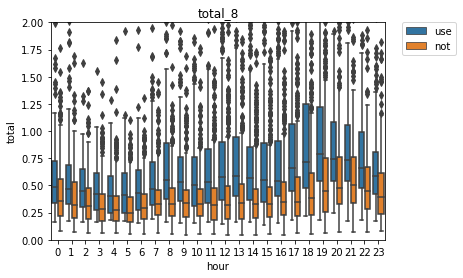

In [89]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_8')
plt.show()

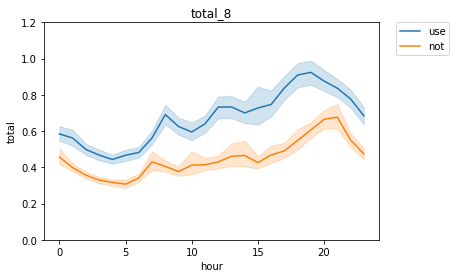

In [90]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_8')
plt.show()

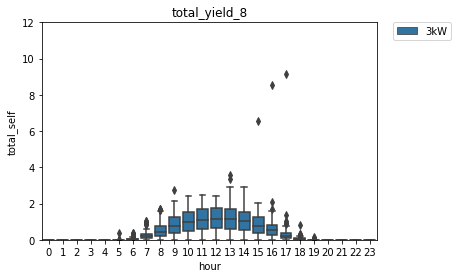

In [91]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_8')
plt.show()

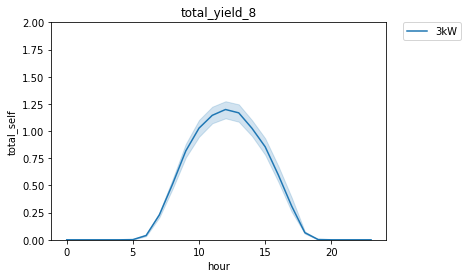

In [92]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_8')
plt.show()

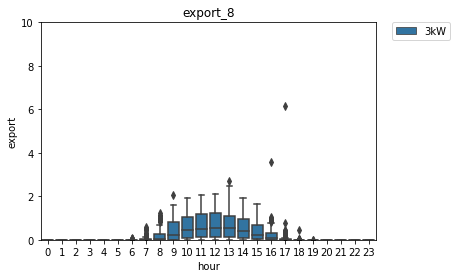

In [93]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_8')
plt.show()

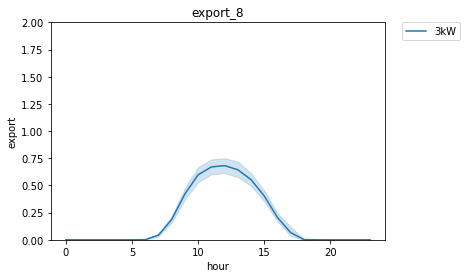

In [94]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_8')
plt.show()

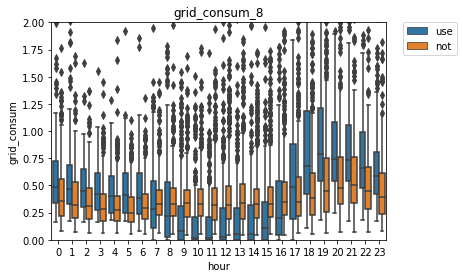

In [95]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_8')
plt.show()

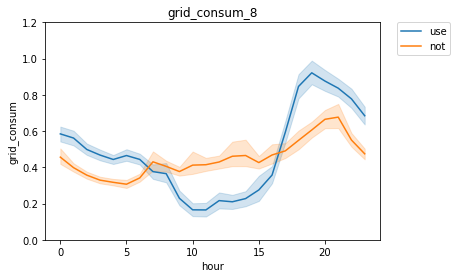

In [96]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_8, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_8')
plt.show()

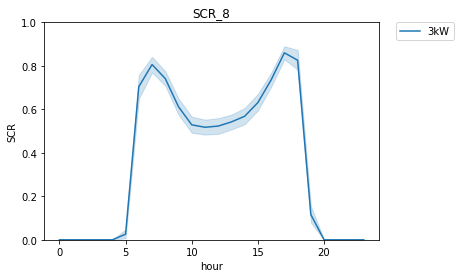

In [97]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_8')
plt.show()

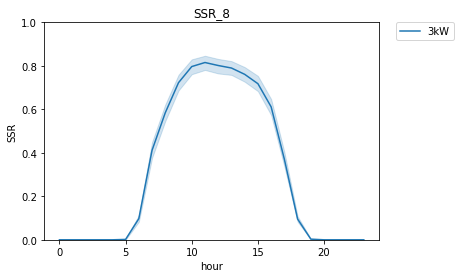

In [98]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_8, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_8')
plt.show()

<hr>

### 2021.09

In [99]:
df_all_hour_21_9 = df_all_hour[df_all_hour.ym == '2021/9']

In [100]:
# 총 전력 소비량
df_all_hour_21_9.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   527.0  0.394874  0.594487  0.080017  0.205017  0.300049  0.424988   
     1   530.0  0.341004  0.260027  0.059998  0.190063  0.280029  0.379883   
     2   530.0  0.314795  0.211493  0.059998  0.179932  0.264954  0.359985   
     3   532.0  0.302749  0.202000  0.049988  0.170044  0.260010  0.339966   
     4   529.0  0.290318  0.186799  0.040039  0.170044  0.250000  0.340088   
     5   533.0  0.285387  0.183867  0.049927  0.170044  0.239990  0.340088   
     6   527.0  0.323333  0.235050  0.059998  0.190063  0.279907  0.379883   
     7   527.0  0.401255  0.367659  0.049988  0.239990  0.320068  0.449951   
     8   529.0  0.379507  0.280244  0.049988  0.209961  0.320068  0.449951   
     9   527.0  0.363877  0.475795  0.050049  0.199951  0.309937  0.410034   
     10  526.0  0.332468  0.244740  0.039917  0.189941  0.279907  0.399994   
     11  525.0  0.324115  0.247972  0.039917  0.170166  0.270020  0.379883   
     12  521.0  0.358964  0.296013  0.039917  0.170044  0.280029  0.439941   
     13  521.0  0.339751  0.261017  0.040039  0.170044  0.270020  0.410034   
     14  520.0  0.367583  0.334734  0.049927  0.189941  0.289917  0.410034   
     15  515.0  0.375755  0.400038  0.059998  0.180054  0.290039  0.400024   
     16  523.0  0.375772  0.297390  0.059998  0.195068  0.299927  0.435059   
     17  521.0  0.398847  0.571819  0.049927  0.189941  0.310059  0.429932   
     18  520.0  0.442621  0.361484  0.059998  0.209961  0.340088  0.549957   
     19  522.0  0.546071  0.542525  0.069946  0.272491  0.390015  0.629974   
     20  523.0  0.511070  0.354012  0.070007  0.300049  0.419922  0.614990   
     21  524.0  0.521622  0.373971  0.080017  0.320068  0.419922  0.579956   
     22  529.0  0.491568  0.459161  0.049988  0.290039  0.380005  0.539917   
     23  526.0  0.398747  0.268327  0.079956  0.220093  0.329895  0.460144   
use  0   265.0  0.522191  0.269776  0.160034  0.290039  0.459961  0.719971   
     1   266.0  0.482991  0.267854  0.139954  0.270020  0.430054  0.650116   
     2   267.0  0.455152  0.223805  0.140015  0.270020  0.400024  0.619873   
     3   262.0  0.434212  0.247916  0.140015  0.250000  0.369995  0.587402   
     4   265.0  0.412609  0.206342  0.140015  0.239990  0.349976  0.560059   
     5   263.0  0.421399  0.215864  0.150024  0.239990  0.360107  0.560059   
     6   264.0  0.495095  0.369652  0.179993  0.260010  0.409912  0.632568   
     7   266.0  0.593892  0.411591  0.160034  0.320221  0.449921  0.760010   
     8   263.0  0.590044  0.306380  0.179932  0.340088  0.500122  0.779846   
     9   265.0  0.546647  0.336658  0.119995  0.279907  0.439819  0.740112   
     10  264.0  0.488458  0.272775  0.119995  0.277557  0.415100  0.649780   
     11  264.0  0.502915  0.341086  0.120117  0.270020  0.410034  0.630035   
     12  264.0  0.573296  0.430428  0.119873  0.307495  0.479858  0.700150   
     13  263.0  0.541435  0.304838  0.129883  0.289978  0.519775  0.680023   
     14  266.0  0.540127  0.388819  0.130127  0.279968  0.459839  0.679901   
     15  267.0  0.524298  0.333852  0.130066  0.280090  0.460022  0.649902   
     16  267.0  0.522062  0.311097  0.130005  0.289917  0.449951  0.655090   
     17  264.0  0.640097  0.745147  0.149902  0.340057  0.529907  0.752563   
     18  263.0  0.686754  0.380619  0.199951  0.405029  0.619995  0.890015   
     19  262.0  0.728235  0.363789  0.229980  0.442841  0.650024  0.927643   
     20  261.0  0.699770  0.365254  0.200012  0.449951  0.589966  0.889893   
     21  263.0  0.696583  0.355255  0.200012  0.440063  0.619995  0.879883   
     22  265.0  0.671478  0.349191  0.170044  0.419922  0.590088  0.880127   
     23  266.0  0.594981  0.311044  0.140015  0.339966  0.539948  0.807556   

               max  
type 시간             
not  0   12.570068  
     1    3.030029  
     2    1.689941  
   

In [101]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   263.0  0.000038  0.000617  0.000000  0.000000  0.000000   
         6   264.0  0.017159  0.031109  0.000000  0.000000  0.010010   
         7   266.0  0.194188  0.180215  0.000000  0.079956  0.160034   
         8   263.0  0.536905  0.400055  0.000000  0.235046  0.469971   
         9   265.0  0.888832  0.588533  0.000000  0.399902  0.780029   
         10  264.0  1.131616  0.645344  0.010010  0.619873  1.120056   
         11  264.0  1.283945  0.727898  0.019897  0.644958  1.330078   
         12  264.0  1.291738  0.738914  0.020020  0.677429  1.294922   
         13  263.0  1.244749  0.732892  0.010010  0.629944  1.189941   
         14  266.0  1.124796  0.706047  0.000000  0.569977  1.000000   
         15  267.0  0.817977  0.522377  0.020020  0.390076  0.719971   
         16  267.0  0.528466  0.387212  0.000000  0.204956  0.440063   
         17  264.0  0.213219  0.778590  0.000000  0.059906  0.139893   
         18  263.0  0.009466  0.020724  0.000000  0.000000  0.000000   
         19  262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  261.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.010010  
         6   0.020020   0.270020  
         7   0.260010   1.129883  
         8   0.760010   1.879883  
         9   1.349854   2.510010  
         10  1.600098   3.020020  
         11  1.909912   2.720093  
         12  1.940186   2.560059  
         13  1.869934   4.959961  
         14  1.677490   4.479980  
         15  1.265015   2.040039  
         16  0.830017   2.619873  
         17  0.239990  12.609985  
         18  0.010010   0.260010  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [102]:
# 총 전력 수출량
df_all_hour_21_9_use = df_all_hour_21_9[df_all_hour_21_9.type == 'use']
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   262.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   263.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   264.0  0.000719  0.005567  0.0  0.000000  0.000000  0.000000   
         7   266.0  0.033253  0.094211  0.0  0.000000  0.000000  0.030029   
         8   263.0  0.217072  0.297308  0.0  0.000000  0.089966  0.325012   
         9   265.0  0.513849  0.514788  0.0  0.049988  0.359985  0.890015   
         10  264.0  0.738621  0.599851  0.0  0.179932  0.675049  1.152527   
         11  264.0  0.881981  0.700070  0.0  0.180054  0.859985  1.442566   
         12  264.0  0.854550  0.719553  0.0  0.167450  0.709961  1.512512   
         13  263.0  0.816170  0.703441  0.0  0.164978  0.709961  1.380005   
         14  266.0  0.706931  0.664012  0.0  0.180008  0.489990  1.197556   
         15  267.0  0.450763  0.472844  0.0  0.030029  0.270020  0.839996   
         16  267.0  0.229706  0.313413  0.0  0.000000  0.069946  0.364990   
         17  264.0  0.044395  0.297378  0.0  0.000000  0.000000  0.020020   
         18  263.0  0.000152  0.002469  0.0  0.000000  0.000000  0.000000   
         19  262.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  261.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  263.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.750000  
         8   1.419922  
         9   1.949951  
         10  2.289917  
         11  2.310059  
         12  2.250000  
         13  4.299927  
         14  3.829956  
         15  1.810059  
         16  2.270020  
         17  4.760010  
         18  0.040039  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [103]:
# 총 그리드 소비량
df_all_hour_21_9.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   527.0  0.394874  0.594487  0.080017  0.205017  0.300049  0.424988   
     1   530.0  0.341004  0.260027  0.059998  0.190063  0.280029  0.379883   
     2   530.0  0.314795  0.211493  0.059998  0.179932  0.264954  0.359985   
     3   532.0  0.302749  0.202000  0.049988  0.170044  0.260010  0.339966   
     4   529.0  0.290318  0.186799  0.040039  0.170044  0.250000  0.340088   
     5   533.0  0.285387  0.183867  0.049927  0.170044  0.239990  0.340088   
     6   527.0  0.323333  0.235050  0.059998  0.190063  0.279907  0.379883   
     7   527.0  0.401255  0.367659  0.049988  0.239990  0.320068  0.449951   
     8   529.0  0.379507  0.280244  0.049988  0.209961  0.320068  0.449951   
     9   527.0  0.363877  0.475795  0.050049  0.199951  0.309937  0.410034   
     10  526.0  0.332468  0.244740  0.039917  0.189941  0.279907  0.399994   
     11  525.0  0.324115  0.247972  0.039917  0.170166  0.270020  0.379883   
     12  521.0  0.358964  0.296013  0.039917  0.170044  0.280029  0.439941   
     13  521.0  0.339751  0.261017  0.040039  0.170044  0.270020  0.410034   
     14  520.0  0.367583  0.334734  0.049927  0.189941  0.289917  0.410034   
     15  515.0  0.375755  0.400038  0.059998  0.180054  0.290039  0.400024   
     16  523.0  0.375772  0.297390  0.059998  0.195068  0.299927  0.435059   
     17  521.0  0.398847  0.571819  0.049927  0.189941  0.310059  0.429932   
     18  520.0  0.442621  0.361484  0.059998  0.209961  0.340088  0.549957   
     19  522.0  0.546071  0.542525  0.069946  0.272491  0.390015  0.629974   
     20  523.0  0.511070  0.354012  0.070007  0.300049  0.419922  0.614990   
     21  524.0  0.521622  0.373971  0.080017  0.320068  0.419922  0.579956   
     22  529.0  0.491568  0.459161  0.049988  0.290039  0.380005  0.539917   
     23  526.0  0.398747  0.268327  0.079956  0.220093  0.329895  0.460144   
use  0   265.0  0.522191  0.269776  0.160034  0.290039  0.459961  0.719971   
     1   266.0  0.482991  0.267854  0.139954  0.270020  0.430054  0.650116   
     2   267.0  0.455152  0.223805  0.140015  0.270020  0.400024  0.619873   
     3   262.0  0.434212  0.247916  0.140015  0.250000  0.369995  0.587402   
     4   265.0  0.412609  0.206342  0.140015  0.239990  0.349976  0.560059   
     5   263.0  0.421361  0.215796  0.150024  0.239990  0.360107  0.560059   
     6   264.0  0.478655  0.369476  0.160034  0.240036  0.389954  0.630035   
     7   266.0  0.432957  0.422560  0.000000  0.142517  0.289917  0.607422   
     8   263.0  0.270211  0.317177  0.000000  0.030029  0.150024  0.430115   
     9   265.0  0.171664  0.272201  0.000000  0.000000  0.020020  0.239990   
     10  264.0  0.095462  0.180629  0.000000  0.000000  0.010010  0.080078   
     11  264.0  0.100952  0.223120  0.000000  0.000000  0.000000  0.079865   
     12  264.0  0.136108  0.273463  0.000000  0.000000  0.010010  0.149933   
     13  263.0  0.112856  0.225803  0.000000  0.000000  0.010010  0.104980   
     14  266.0  0.122262  0.250837  0.000000  0.000000  0.020020  0.119995   
     15  267.0  0.157084  0.268033  0.000000  0.000000  0.040039  0.189972   
     16  267.0  0.223301  0.270142  0.000000  0.020020  0.129883  0.330017   
     17  264.0  0.471273  0.402976  0.010010  0.170013  0.390015  0.649902   
     18  263.0  0.677440  0.382327  0.199951  0.390015  0.599976  0.885010   
     19  262.0  0.728235  0.363789  0.229980  0.442841  0.650024  0.927643   
     20  261.0  0.699770  0.365254  0.200012  0.449951  0.589966  0.889893   
     21  263.0  0.696583  0.355255  0.200012  0.440063  0.619995  0.879883   
     22  265.0  0.671478  0.349191  0.170044  0.419922  0.590088  0.880127   
     23  266.0  0.594981  0.311044  0.140015  0.339966  0.539948  0.807556   

               max  
type 시간             
not  0   12.570068  
     1    3.030029  
     2    1.689941  
   

In [104]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   263.0  0.003802  0.061663  0.000000  0.000000  0.000000   
         6   264.0  0.590734  0.489365  0.000000  0.000000  1.000000   
         7   266.0  0.814240  0.304529  0.000000  0.775669  0.957383   
         8   263.0  0.713358  0.280333  0.000000  0.501966  0.776809   
         9   265.0  0.569029  0.309006  0.000000  0.278873  0.541709   
         10  264.0  0.476637  0.296785  0.077368  0.217982  0.399345   
         11  264.0  0.453427  0.310228  0.059912  0.166761  0.359325   
         12  264.0  0.477752  0.310044  0.078136  0.207326  0.382797   
         13  263.0  0.483586  0.305155  0.075484  0.200435  0.381312   
         14  266.0  0.502624  0.299721  0.000000  0.233824  0.458254   
         15  267.0  0.602059  0.308393  0.112733  0.333233  0.614231   
         16  267.0  0.716176  0.285862  0.000000  0.455017  0.818165   
         17  264.0  0.872480  0.244419  0.000000  0.855440  1.000000   
         18  263.0  0.391049  0.488407  0.000000  0.000000  0.000000   
         19  262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  261.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.892764  1.0  
         10  0.697214  1.0  
         11  0.706768  1.0  
         12  0.743992  1.0  
         13  0.756780  1.0  
         14  0.740771  1.0  
         15  0.911872  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [105]:
# SSR(자가공급률)
df_all_hour_21_9_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   263.0  0.000047  0.000762  0.000000  0.000000  0.000000   
         6   264.0  0.042009  0.065577  0.000000  0.000000  0.023282   
         7   266.0  0.360915  0.272333  0.000000  0.116451  0.333559   
         8   263.0  0.628295  0.322731  0.000000  0.351528  0.691334   
         9   265.0  0.773459  0.299477  0.000000  0.624847  0.944690   
         10  264.0  0.856743  0.244230  0.012061  0.833206  0.978701   
         11  264.0  0.865885  0.240465  0.030331  0.846649  1.000000   
         12  264.0  0.849787  0.237828  0.024921  0.790105  0.981458   
         13  263.0  0.856801  0.229472  0.012206  0.834730  0.972203   
         14  266.0  0.846871  0.233277  0.000000  0.800967  0.955997   
         15  267.0  0.779283  0.274681  0.046993  0.640890  0.904942   
         16  267.0  0.656609  0.301345  0.000000  0.406626  0.719795   
         17  264.0  0.307092  0.257446  0.000000  0.089195  0.222523   
         18  263.0  0.018543  0.033885  0.000000  0.000000  0.000000   
         19  262.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  261.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  263.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.012357  
         6   0.051330  0.500000  
         7   0.581492  1.000000  
         8   0.908833  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.941232  1.000000  
         17  0.502603  0.961502  
         18  0.026731  0.209511  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

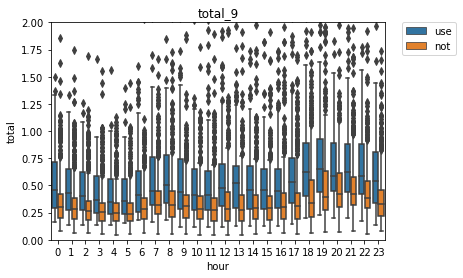

In [106]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_9')
plt.show()

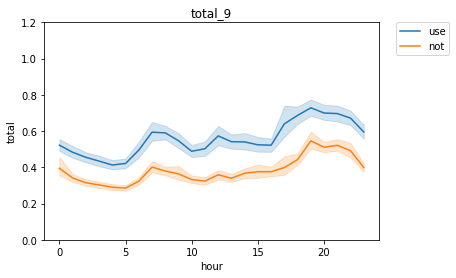

In [107]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_9')
plt.show()

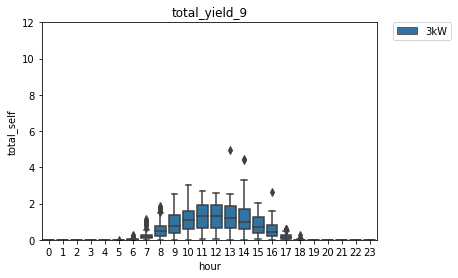

In [108]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_9')
plt.show()

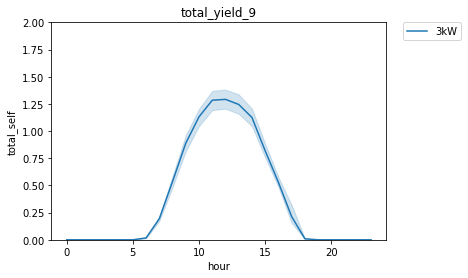

In [109]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_9')
plt.show()

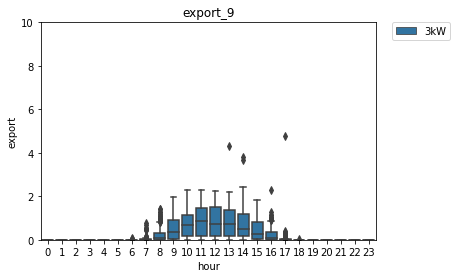

In [110]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_9')
plt.show()

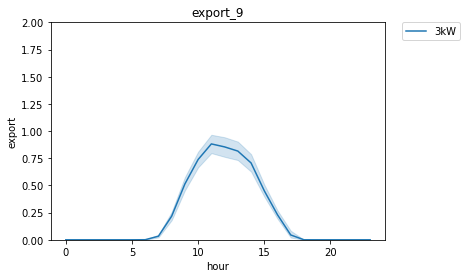

In [111]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_9')
plt.show()

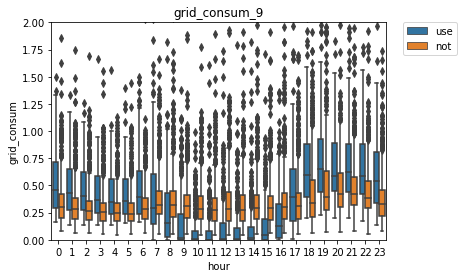

In [112]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_9')
plt.show()

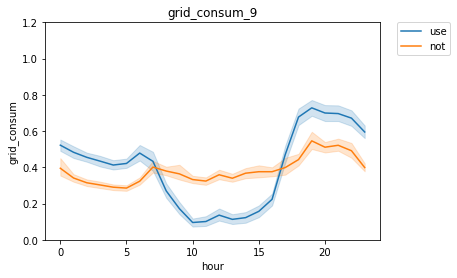

In [113]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_9, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_9')
plt.show()

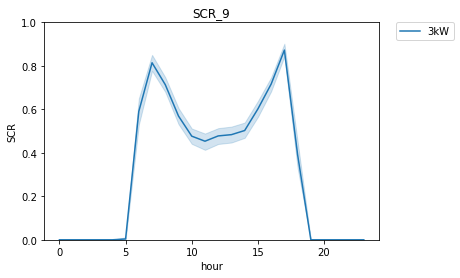

In [114]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_9')
plt.show()

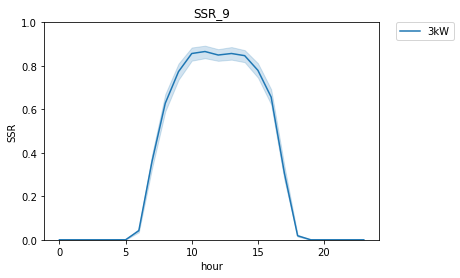

In [115]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_9, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_9')
plt.show()

<hr>

### 2021.10

In [116]:
df_all_hour_21_10 = df_all_hour[df_all_hour.ym == '2021/10']

In [117]:
# 총 전력 소비량
df_all_hour_21_10.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   517.0  0.348377  0.231403  0.029968  0.209961  0.299927  0.410156   
     1   518.0  0.325258  0.237474  0.049988  0.199951  0.280029  0.359985   
     2   517.0  0.305040  0.195725  0.040039  0.190063  0.279785  0.350098   
     3   521.0  0.315369  0.292390  0.039978  0.189941  0.260010  0.349854   
     4   516.0  0.284422  0.199560  0.030029  0.170044  0.250000  0.329987   
     5   517.0  0.306423  0.435893  0.039978  0.160034  0.239990  0.339844   
     6   522.0  0.328623  0.371522  0.029968  0.189941  0.260010  0.377411   
     7   518.0  0.414454  0.726666  0.039978  0.229980  0.320068  0.449951   
     8   525.0  0.326203  0.227225  0.039917  0.190063  0.280029  0.399902   
     9   522.0  0.302784  0.277754  0.029968  0.169952  0.260010  0.359985   
     10  526.0  0.277011  0.178727  0.039917  0.160034  0.239990  0.329956   
     11  511.0  0.289978  0.420730  0.030029  0.140015  0.230103  0.329956   
     12  520.0  0.290595  0.219116  0.029968  0.150024  0.240051  0.339966   
     13  518.0  0.301215  0.430174  0.039978  0.150024  0.229980  0.340088   
     14  515.0  0.300812  0.283764  0.039978  0.159973  0.250000  0.339905   
     15  516.0  0.312056  0.307160  0.039978  0.160034  0.260010  0.350098   
     16  512.0  0.349137  0.476819  0.039917  0.177460  0.269775  0.390137   
     17  514.0  0.362630  0.300295  0.029968  0.179962  0.290039  0.430054   
     18  515.0  0.441687  0.383740  0.039978  0.219971  0.340088  0.515015   
     19  514.0  0.492629  0.470123  0.029968  0.250000  0.359985  0.559906   
     20  514.0  0.475059  0.339521  0.059998  0.299927  0.400024  0.550049   
     21  514.0  0.495077  0.317608  0.039978  0.309937  0.420044  0.597412   
     22  516.0  0.431047  0.258599  0.039978  0.280029  0.370117  0.520020   
     23  515.0  0.378935  0.240986  0.050049  0.230042  0.329956  0.465088   
use  0   276.0  0.551703  0.294168  0.149902  0.300049  0.484985  0.780029   
     1   271.0  0.521267  0.271873  0.159973  0.280029  0.459961  0.739990   
     2   272.0  0.491198  0.311494  0.140015  0.289978  0.445068  0.639954   
     3   270.0  0.469154  0.252770  0.130005  0.260010  0.410034  0.607483   
     4   271.0  0.458723  0.279028  0.140015  0.255005  0.410034  0.604980   
     5   272.0  0.455956  0.241495  0.130005  0.260010  0.409973  0.590088   
     6   270.0  0.486905  0.258376  0.140015  0.270020  0.440063  0.639984   
     7   271.0  0.630480  0.477265  0.139893  0.320068  0.489868  0.770020   
     8   275.0  0.634224  0.345937  0.169922  0.369995  0.549927  0.829956   
     9   276.0  0.535162  0.337622  0.099976  0.300049  0.470093  0.692627   
     10  274.0  0.485648  0.304017  0.079956  0.242523  0.429932  0.637543   
     11  270.0  0.507541  0.391961  0.109863  0.249908  0.400146  0.645020   
     12  269.0  0.563328  0.404164  0.109985  0.280151  0.449951  0.760010   
     13  270.0  0.536539  0.335411  0.080078  0.279907  0.469971  0.680023   
     14  274.0  0.495021  0.323409  0.080200  0.252686  0.420044  0.609909   
     15  271.0  0.483380  0.325983  0.119873  0.262604  0.419678  0.620117   
     16  272.0  0.498775  0.283317  0.119751  0.280243  0.439819  0.630035   
     17  274.0  0.602217  0.359686  0.149780  0.330032  0.510040  0.760101   
     18  274.0  0.709779  0.363021  0.189941  0.430054  0.640015  0.897461   
     19  273.0  0.709870  0.374677  0.219971  0.410034  0.629883  0.899902   
     20  274.0  0.691224  0.373892  0.210022  0.420044  0.615051  0.877441   
     21  268.0  0.716048  0.415009  0.200012  0.400024  0.589966  0.969971   
     22  274.0  0.729704  0.536168  0.169983  0.399902  0.565002  0.959961   
     23  275.0  0.631632  0.380752  0.150024  0.340057  0.540039  0.880066   

               max  
type 시간             
not  0    2.340088  
     1    2.670166  
     2    1.969971  
   

In [118]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   270.0  0.002297  0.005842  0.000000  0.000000  0.000000   
         7   271.0  0.145130  0.120204  0.000000  0.070068  0.119873   
         8   275.0  0.554293  0.308041  0.000000  0.294922  0.529785   
         9   276.0  1.002796  0.530173  0.040039  0.567474  1.010010   
         10  274.0  1.329172  0.628260  0.120117  0.819946  1.435059   
         11  270.0  1.490505  0.692623  0.060059  0.927521  1.659912   
         12  269.0  1.554376  0.777192  0.089844  0.959961  1.750000   
         13  270.0  1.432761  0.778373  0.060059  0.832581  1.489990   
         14  274.0  1.228834  0.889663  0.069946  0.662415  1.270020   
         15  271.0  0.840515  0.519875  0.010010  0.385071  0.820068   
         16  272.0  0.374166  0.293210  0.000000  0.160095  0.290039   
         17  274.0  0.078021  0.296601  0.000000  0.010010  0.030029   
         18  274.0  0.000110  0.001350  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.000000  
         6   0.000000   0.040039  
         7   0.190125   0.880127  
         8   0.770020   1.419922  
         9   1.442444   2.179932  
         10  1.897461   2.659912  
         11  2.097595   2.969971  
         12  2.150146   4.650146  
         13  2.030029   6.669922  
         14  1.729980  10.650146  
         15  1.265015   3.140137  
         16  0.560059   1.960205  
         17  0.060059   4.459961  
         18  0.000000   0.020020  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [119]:
# 총 전력 수출량
df_all_hour_21_10_use = df_all_hour_21_10[df_all_hour_21_10.type == 'use']
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   271.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   270.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   271.0  0.015979  0.044124  0.0  0.000000  0.000000  0.010010   
         8   275.0  0.211818  0.228021  0.0  0.000000  0.140137  0.360046   
         9   276.0  0.606112  0.496790  0.0  0.127502  0.550049  0.994995   
         10  274.0  0.919380  0.623009  0.0  0.290039  1.010010  1.447479   
         11  270.0  1.074743  0.682826  0.0  0.442444  1.210022  1.620117   
         12  269.0  1.093201  0.727310  0.0  0.430054  1.189941  1.689941   
         13  270.0  0.989650  0.731893  0.0  0.292526  1.074951  1.577484   
         14  274.0  0.832060  0.804751  0.0  0.172516  0.834991  1.300049   
         15  271.0  0.494905  0.457042  0.0  0.049988  0.429932  0.859985   
         16  272.0  0.149010  0.220276  0.0  0.000000  0.030029  0.250000   
         17  274.0  0.026497  0.228688  0.0  0.000000  0.000000  0.000000   
         18  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.370117  
         8   0.920044  
         9   1.709961  
         10  2.419922  
         11  2.260010  
         12  3.500000  
         13  5.699951  
         14  9.149902  
         15  2.410034  
         16  1.400024  
         17  3.609985  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [120]:
# 총 그리드 소비량
df_all_hour_21_10.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   517.0  0.348377  0.231403  0.029968  0.209961  0.299927  0.410156   
     1   518.0  0.325258  0.237474  0.049988  0.199951  0.280029  0.359985   
     2   517.0  0.305040  0.195725  0.040039  0.190063  0.279785  0.350098   
     3   521.0  0.315369  0.292390  0.039978  0.189941  0.260010  0.349854   
     4   516.0  0.284422  0.199560  0.030029  0.170044  0.250000  0.329987   
     5   517.0  0.306423  0.435893  0.039978  0.160034  0.239990  0.339844   
     6   522.0  0.328623  0.371522  0.029968  0.189941  0.260010  0.377411   
     7   518.0  0.414454  0.726666  0.039978  0.229980  0.320068  0.449951   
     8   525.0  0.326203  0.227225  0.039917  0.190063  0.280029  0.399902   
     9   522.0  0.302784  0.277754  0.029968  0.169952  0.260010  0.359985   
     10  526.0  0.277011  0.178727  0.039917  0.160034  0.239990  0.329956   
     11  511.0  0.289978  0.420730  0.030029  0.140015  0.230103  0.329956   
     12  520.0  0.290595  0.219116  0.029968  0.150024  0.240051  0.339966   
     13  518.0  0.301215  0.430174  0.039978  0.150024  0.229980  0.340088   
     14  515.0  0.300812  0.283764  0.039978  0.159973  0.250000  0.339905   
     15  516.0  0.312056  0.307160  0.039978  0.160034  0.260010  0.350098   
     16  512.0  0.349137  0.476819  0.039917  0.177460  0.269775  0.390137   
     17  514.0  0.362630  0.300295  0.029968  0.179962  0.290039  0.430054   
     18  515.0  0.441687  0.383740  0.039978  0.219971  0.340088  0.515015   
     19  514.0  0.492629  0.470123  0.029968  0.250000  0.359985  0.559906   
     20  514.0  0.475059  0.339521  0.059998  0.299927  0.400024  0.550049   
     21  514.0  0.495077  0.317608  0.039978  0.309937  0.420044  0.597412   
     22  516.0  0.431047  0.258599  0.039978  0.280029  0.370117  0.520020   
     23  515.0  0.378935  0.240986  0.050049  0.230042  0.329956  0.465088   
use  0   276.0  0.551703  0.294168  0.149902  0.300049  0.484985  0.780029   
     1   271.0  0.521267  0.271873  0.159973  0.280029  0.459961  0.739990   
     2   272.0  0.491198  0.311494  0.140015  0.289978  0.445068  0.639954   
     3   270.0  0.469154  0.252770  0.130005  0.260010  0.410034  0.607483   
     4   271.0  0.458723  0.279028  0.140015  0.255005  0.410034  0.604980   
     5   272.0  0.455956  0.241495  0.130005  0.260010  0.409973  0.590088   
     6   270.0  0.484609  0.258713  0.140015  0.262482  0.435059  0.637451   
     7   271.0  0.501329  0.487300  0.050049  0.195007  0.329956  0.659912   
     8   275.0  0.291748  0.321222  0.000000  0.030029  0.179932  0.455078   
     9   276.0  0.138477  0.261432  0.000000  0.000000  0.020020  0.162415   
     10  274.0  0.075856  0.181917  0.000000  0.000000  0.000000  0.060059   
     11  270.0  0.091778  0.282540  0.000000  0.000000  0.000000  0.040039   
     12  269.0  0.102153  0.248371  0.000000  0.000000  0.000000  0.060059   
     13  270.0  0.093429  0.193300  0.000000  0.000000  0.000000  0.080078   
     14  274.0  0.098247  0.230833  0.000000  0.000000  0.009949  0.070038   
     15  271.0  0.137770  0.247873  0.000000  0.000000  0.029907  0.180054   
     16  272.0  0.273619  0.288445  0.000000  0.049988  0.199951  0.399933   
     17  274.0  0.550694  0.369013  0.059998  0.260010  0.459961  0.739990   
     18  274.0  0.709669  0.362930  0.189941  0.430054  0.640015  0.897461   
     19  273.0  0.709870  0.374677  0.219971  0.410034  0.629883  0.899902   
     20  274.0  0.691224  0.373892  0.210022  0.420044  0.615051  0.877441   
     21  268.0  0.716048  0.415009  0.200012  0.400024  0.589966  0.969971   
     22  274.0  0.729704  0.536168  0.169983  0.399902  0.565002  0.959961   
     23  275.0  0.631632  0.380752  0.150024  0.340057  0.540039  0.880066   

               max  
type 시간             
not  0    2.340088  
     1    2.670166  
     2    1.969971  
   

In [121]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   270.0  0.170370  0.376656  0.000000  0.000000  0.000000   
         7   271.0  0.891508  0.227904  0.000000  0.875000  1.000000   
         8   275.0  0.707608  0.261838  0.000000  0.475534  0.740506   
         9   276.0  0.516055  0.301979  0.057790  0.237998  0.448698   
         10  274.0  0.409384  0.282578  0.040179  0.169716  0.328336   
         11  270.0  0.376942  0.285427  0.052629  0.144813  0.268218   
         12  269.0  0.394442  0.280901  0.059016  0.161596  0.310853   
         13  270.0  0.419948  0.290263  0.045759  0.178923  0.327713   
         14  274.0  0.455102  0.302350  0.047171  0.199098  0.362113   
         15  271.0  0.554877  0.306172  0.085789  0.284542  0.519249   
         16  272.0  0.747147  0.276172  0.000000  0.530719  0.865225   
         17  274.0  0.830259  0.343824  0.000000  0.910056  1.000000   
         18  274.0  0.007299  0.085279  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  1.0  
         7   1.000000  1.0  
         8   0.991219  1.0  
         9   0.791347  1.0  
         10  0.603387  1.0  
         11  0.530922  1.0  
         12  0.571500  1.0  
         13  0.619103  1.0  
         14  0.716047  1.0  
         15  0.846877  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [122]:
# SSR(자가공급률)
df_all_hour_21_10_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   270.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   270.0  0.005845  0.015827  0.000000  0.000000  0.000000   
         7   271.0  0.277892  0.207001  0.000000  0.115271  0.219443   
         8   275.0  0.634518  0.289720  0.000000  0.415841  0.648631   
         9   276.0  0.829549  0.244541  0.046016  0.742266  0.958312   
         10  274.0  0.904477  0.186460  0.129134  0.896174  1.000000   
         11  270.0  0.903852  0.198311  0.037775  0.929467  1.000000   
         12  269.0  0.893007  0.198871  0.075591  0.899951  1.000000   
         13  270.0  0.882031  0.210623  0.155809  0.860742  1.000000   
         14  274.0  0.868269  0.224267  0.058781  0.834152  0.991027   
         15  271.0  0.793964  0.268940  0.022079  0.632639  0.931761   
         16  272.0  0.550811  0.308957  0.000000  0.287842  0.565603   
         17  274.0  0.120270  0.159178  0.000000  0.016751  0.048632   
         18  274.0  0.000134  0.001589  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.100122  
         7   0.423417  0.814564  
         8   0.913608  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.829681  1.000000  
         17  0.165510  0.881484  
         18  0.000000  0.021293  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

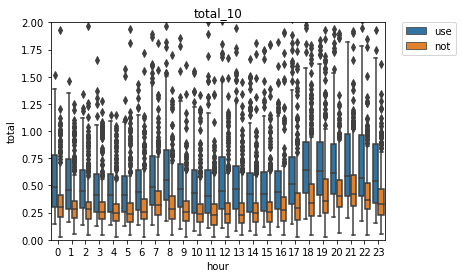

In [123]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_10')
plt.show()

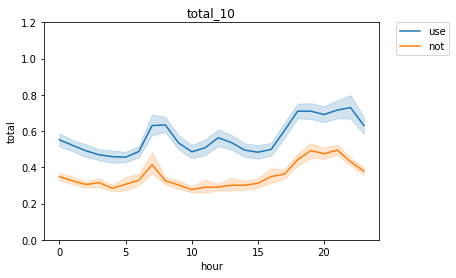

In [124]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_10')
plt.show()

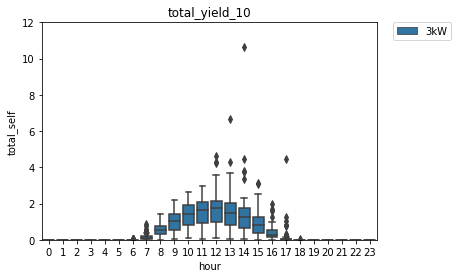

In [125]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_10')
plt.show()

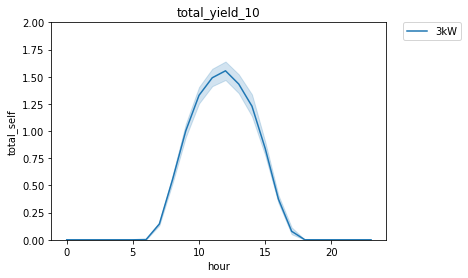

In [126]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_10')
plt.show()

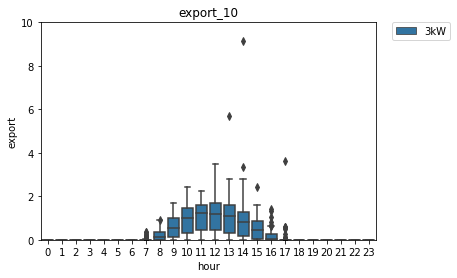

In [127]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_10')
plt.show()

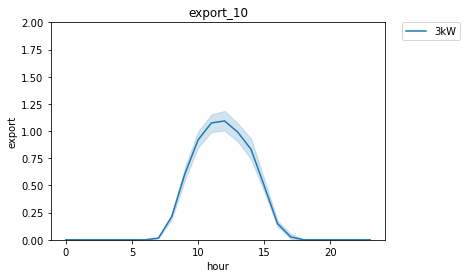

In [128]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_10')
plt.show()

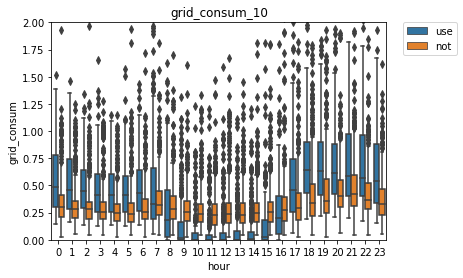

In [129]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_10')
plt.show()

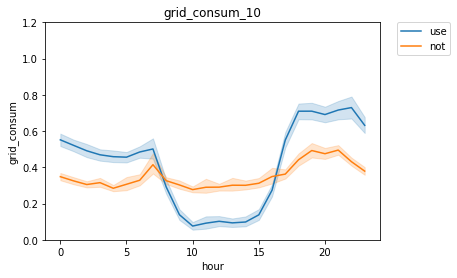

In [130]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_10, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_10')
plt.show()

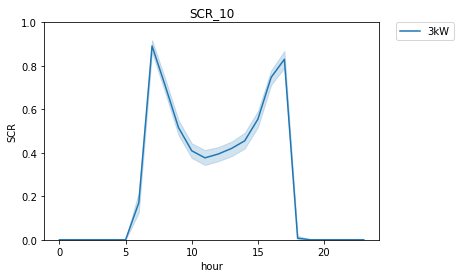

In [131]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_10')
plt.show()

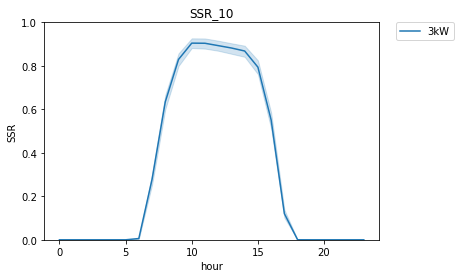

In [132]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_10, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_10')
plt.show()

<hr>

### 2021.11

In [133]:
df_all_hour_21_11 = df_all_hour[df_all_hour.ym == '2021/11']

In [134]:
# 총 전력 소비량
df_all_hour_21_11.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   521.0  0.368153  0.212402  0.049988  0.229980  0.320068  0.440186   
     1   521.0  0.347519  0.202099  0.039978  0.219971  0.300049  0.400146   
     2   518.0  0.332352  0.187283  0.030029  0.219971  0.299957  0.380005   
     3   517.0  0.322590  0.194081  0.049988  0.200195  0.280029  0.380005   
     4   518.0  0.318475  0.193069  0.039978  0.190018  0.280029  0.379974   
     5   513.0  0.315847  0.204180  0.030029  0.180054  0.260010  0.380005   
     6   511.0  0.340661  0.208888  0.029968  0.209961  0.290039  0.419922   
     7   510.0  0.396004  0.228281  0.020020  0.239990  0.360107  0.479980   
     8   515.0  0.382909  0.578590  0.019958  0.219971  0.310059  0.439941   
     9   511.0  0.309373  0.205184  0.019958  0.180115  0.279785  0.380127   
     10  513.0  0.304679  0.506135  0.029968  0.179932  0.250000  0.339966   
     11  508.0  0.290274  0.204470  0.030029  0.169922  0.240051  0.342529   
     12  510.0  0.319337  0.316182  0.020020  0.169922  0.239990  0.360107   
     13  511.0  0.318988  0.513260  0.020020  0.160156  0.250000  0.360107   
     14  512.0  0.297304  0.298319  0.019958  0.159912  0.239990  0.349854   
     15  516.0  0.344126  0.792024  0.019958  0.167480  0.250000  0.359985   
     16  517.0  0.328862  0.327481  0.020020  0.189941  0.270020  0.379883   
     17  521.0  0.409667  0.394094  0.029968  0.209961  0.320068  0.479980   
     18  515.0  0.515362  0.501621  0.030029  0.260010  0.389893  0.579956   
     19  518.0  0.544128  0.521597  0.019958  0.289917  0.399902  0.580078   
     20  510.0  0.506887  0.319321  0.049927  0.319946  0.439941  0.589935   
     21  520.0  0.509545  0.412358  0.039978  0.330002  0.429932  0.580078   
     22  518.0  0.475684  0.571500  0.020020  0.300049  0.389893  0.550049   
     23  519.0  0.403357  0.233518  0.030029  0.250000  0.350098  0.489990   
use  0   264.0  0.618902  0.302306  0.150024  0.387451  0.570068  0.822693   
     1   265.0  0.561487  0.287310  0.150024  0.330078  0.530029  0.750000   
     2   267.0  0.518388  0.251008  0.149902  0.319946  0.479980  0.670166   
     3   265.0  0.491652  0.224786  0.149902  0.320068  0.469971  0.610107   
     4   265.0  0.497999  0.229600  0.150024  0.319946  0.469971  0.619873   
     5   266.0  0.501202  0.241321  0.139893  0.310059  0.480042  0.620056   
     6   265.0  0.559826  0.368321  0.140015  0.300049  0.489990  0.659912   
     7   262.0  0.686978  0.501429  0.150024  0.382568  0.550049  0.835052   
     8   262.0  0.700720  0.361583  0.120117  0.432526  0.649841  0.890137   
     9   268.0  0.563267  0.329421  0.109863  0.290009  0.509949  0.750000   
     10  269.0  0.495480  0.317157  0.099854  0.230103  0.450073  0.669922   
     11  265.0  0.503315  0.377480  0.079956  0.229858  0.449951  0.650024   
     12  263.0  0.532468  0.348033  0.109985  0.249939  0.460083  0.714905   
     13  265.0  0.515086  0.329278  0.090088  0.280029  0.469971  0.669922   
     14  265.0  0.501066  0.291083  0.100098  0.280029  0.449951  0.659912   
     15  266.0  0.500819  0.296283  0.089966  0.250031  0.469849  0.650085   
     16  269.0  0.573029  0.629693  0.109985  0.300171  0.500000  0.719971   
     17  266.0  0.692171  0.387663  0.109985  0.392487  0.614990  0.917542   
     18  264.0  0.852084  0.426156  0.239990  0.570007  0.754944  1.030029   
     19  265.0  0.838363  0.439255  0.250000  0.539917  0.720093  1.079834   
     20  267.0  0.807838  0.491409  0.239990  0.494995  0.669922  1.032593   
     21  265.0  0.780322  0.386344  0.230103  0.509888  0.669922  1.050293   
     22  265.0  0.747525  0.372875  0.189941  0.469971  0.679932  0.979980   
     23  263.0  0.683760  0.353588  0.150024  0.434967  0.614990  0.910156   

               max  
type 시간             
not  0    1.609863  
     1    1.149902  
     2    1.179932  
   

In [135]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   262.0  0.045883  0.043866  0.000000  0.010010  0.039795   
         8   262.0  0.381782  0.260656  0.000000  0.172516  0.370056   
         9   268.0  0.888717  0.499335  0.000000  0.507507  0.905151   
         10  269.0  1.214936  0.606654  0.000000  0.799805  1.329834   
         11  265.0  1.348865  0.668738  0.030029  0.829956  1.520020   
         12  263.0  1.384228  0.694334  0.010010  0.819946  1.609863   
         13  265.0  1.249143  0.663144  0.020020  0.680176  1.409912   
         14  265.0  0.995909  0.580904  0.000000  0.500000  1.040039   
         15  266.0  0.588337  0.381153  0.000000  0.269836  0.539917   
         16  269.0  0.193438  0.468596  0.000000  0.070068  0.119995   
         17  266.0  0.003334  0.007245  0.000000  0.000000  0.000000   
         18  264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  263.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.070068  0.270020  
         8   0.529724  1.340088  
         9   1.292480  1.850098  
         10  1.700195  2.179932  
         11  1.929932  2.380127  
         12  1.989990  3.689941  
         13  1.860107  3.179932  
         14  1.479980  3.270020  
         15  0.847595  2.869873  
         16  0.229980  7.390137  
         17  0.000000  0.050049  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [136]:
# 총 전력 수출량
df_all_hour_21_11_use = df_all_hour_21_11[df_all_hour_21_11.type == 'use']
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   264.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   262.0  0.000840  0.004800  0.0  0.000000  0.000000  0.000000   
         8   262.0  0.094039  0.128060  0.0  0.000000  0.034912  0.150024   
         9   268.0  0.504476  0.415422  0.0  0.080063  0.470093  0.835022   
         10  269.0  0.830185  0.550049  0.0  0.320007  0.909912  1.290039   
         11  265.0  0.956075  0.627342  0.0  0.399963  1.030029  1.519897   
         12  263.0  0.970687  0.648135  0.0  0.364990  1.010010  1.510010   
         13  265.0  0.848320  0.607497  0.0  0.239990  0.929932  1.419922   
         14  265.0  0.623284  0.507064  0.0  0.119995  0.569946  1.079956   
         15  266.0  0.297597  0.334968  0.0  0.010010  0.180054  0.497498   
         16  269.0  0.058661  0.191671  0.0  0.000000  0.000000  0.060059   
         17  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         18  264.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  267.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  263.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.059937  
         8   0.719971  
         9   1.489990  
         10  1.930054  
         11  2.030029  
         12  2.589966  
         13  1.989990  
         14  2.309998  
         15  2.159912  
         16  2.790039  
         17  0.000000  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [137]:
# 총 그리드 소비량
df_all_hour_21_11.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   521.0  0.368153  0.212402  0.049988  0.229980  0.320068  0.440186   
     1   521.0  0.347519  0.202099  0.039978  0.219971  0.300049  0.400146   
     2   518.0  0.332352  0.187283  0.030029  0.219971  0.299957  0.380005   
     3   517.0  0.322590  0.194081  0.049988  0.200195  0.280029  0.380005   
     4   518.0  0.318475  0.193069  0.039978  0.190018  0.280029  0.379974   
     5   513.0  0.315847  0.204180  0.030029  0.180054  0.260010  0.380005   
     6   511.0  0.340661  0.208888  0.029968  0.209961  0.290039  0.419922   
     7   510.0  0.396004  0.228281  0.020020  0.239990  0.360107  0.479980   
     8   515.0  0.382909  0.578590  0.019958  0.219971  0.310059  0.439941   
     9   511.0  0.309373  0.205184  0.019958  0.180115  0.279785  0.380127   
     10  513.0  0.304679  0.506135  0.029968  0.179932  0.250000  0.339966   
     11  508.0  0.290274  0.204470  0.030029  0.169922  0.240051  0.342529   
     12  510.0  0.319337  0.316182  0.020020  0.169922  0.239990  0.360107   
     13  511.0  0.318988  0.513260  0.020020  0.160156  0.250000  0.360107   
     14  512.0  0.297304  0.298319  0.019958  0.159912  0.239990  0.349854   
     15  516.0  0.344126  0.792024  0.019958  0.167480  0.250000  0.359985   
     16  517.0  0.328862  0.327481  0.020020  0.189941  0.270020  0.379883   
     17  521.0  0.409667  0.394094  0.029968  0.209961  0.320068  0.479980   
     18  515.0  0.515362  0.501621  0.030029  0.260010  0.389893  0.579956   
     19  518.0  0.544128  0.521597  0.019958  0.289917  0.399902  0.580078   
     20  510.0  0.506887  0.319321  0.049927  0.319946  0.439941  0.589935   
     21  520.0  0.509545  0.412358  0.039978  0.330002  0.429932  0.580078   
     22  518.0  0.475684  0.571500  0.020020  0.300049  0.389893  0.550049   
     23  519.0  0.403357  0.233518  0.030029  0.250000  0.350098  0.489990   
use  0   264.0  0.618902  0.302306  0.150024  0.387451  0.570068  0.822693   
     1   265.0  0.561487  0.287310  0.150024  0.330078  0.530029  0.750000   
     2   267.0  0.518388  0.251008  0.149902  0.319946  0.479980  0.670166   
     3   265.0  0.491652  0.224786  0.149902  0.320068  0.469971  0.610107   
     4   265.0  0.497999  0.229600  0.150024  0.319946  0.469971  0.619873   
     5   266.0  0.501202  0.241321  0.139893  0.310059  0.480042  0.620056   
     6   265.0  0.559826  0.368321  0.140015  0.300049  0.489990  0.659912   
     7   262.0  0.641936  0.503689  0.089966  0.349884  0.510010  0.777344   
     8   262.0  0.412977  0.377953  0.000000  0.122467  0.289978  0.599945   
     9   268.0  0.179026  0.284691  0.000000  0.000000  0.029968  0.252502   
     10  269.0  0.110729  0.236876  0.000000  0.000000  0.000000  0.099609   
     11  265.0  0.110526  0.255780  0.000000  0.000000  0.000000  0.069946   
     12  263.0  0.118927  0.239818  0.000000  0.000000  0.000000  0.094910   
     13  265.0  0.114263  0.224698  0.000000  0.000000  0.000000  0.109863   
     14  265.0  0.128440  0.232417  0.000000  0.000000  0.010010  0.160156   
     15  266.0  0.210079  0.263771  0.000000  0.010010  0.119934  0.320068   
     16  269.0  0.438251  0.427136  0.000000  0.139893  0.380127  0.620117   
     17  266.0  0.688838  0.389546  0.109985  0.392487  0.614990  0.910034   
     18  264.0  0.852084  0.426156  0.239990  0.570007  0.754944  1.030029   
     19  265.0  0.838363  0.439255  0.250000  0.539917  0.720093  1.079834   
     20  267.0  0.807838  0.491409  0.239990  0.494995  0.669922  1.032593   
     21  265.0  0.780322  0.386344  0.230103  0.509888  0.669922  1.050293   
     22  265.0  0.747525  0.372875  0.189941  0.469971  0.679932  0.979980   
     23  263.0  0.683760  0.353588  0.150024  0.434967  0.614990  0.910156   

               max  
type 시간             
not  0    1.609863  
     1    1.149902  
     2    1.179932  
   

In [138]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   262.0  0.800149  0.391900  0.000000  1.000000  1.000000   
         8   262.0  0.773441  0.260419  0.000000  0.618870  0.868186   
         9   268.0  0.519441  0.301281  0.000000  0.257236  0.479432   
         10  269.0  0.424669  0.295347  0.000000  0.178369  0.343403   
         11  265.0  0.396562  0.283545  0.052951  0.159146  0.315992   
         12  263.0  0.406760  0.287041  0.060822  0.171727  0.335911   
         13  265.0  0.439703  0.294482  0.048694  0.190725  0.361163   
         14  265.0  0.497764  0.290941  0.000000  0.245279  0.447312   
         15  266.0  0.624610  0.303421  0.000000  0.357388  0.657866   
         16  269.0  0.816422  0.276938  0.000000  0.666667  1.000000   
         17  266.0  0.233083  0.423591  0.000000  0.000000  0.000000   
         18  264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  263.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.780602  1.0  
         10  0.595714  1.0  
         11  0.539721  1.0  
         12  0.553061  1.0  
         13  0.620210  1.0  
         14  0.725832  1.0  
         15  0.922234  1.0  
         16  1.000000  1.0  
         17  0.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [139]:
# SSR(자가공급률)
df_all_hour_21_11_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   262.0  0.086064  0.087042  0.000000  0.015673  0.062556   
         8   262.0  0.486450  0.292845  0.000000  0.275717  0.462079   
         9   268.0  0.768174  0.313841  0.000000  0.589458  0.945430   
         10  269.0  0.847553  0.279535  0.000000  0.865878  1.000000   
         11  265.0  0.861646  0.252214  0.050041  0.852066  1.000000   
         12  263.0  0.856656  0.250269  0.014104  0.830880  1.000000   
         13  265.0  0.847143  0.251263  0.032813  0.796158  1.000000   
         14  265.0  0.813937  0.279835  0.000000  0.700183  0.977793   
         15  266.0  0.682254  0.299020  0.000000  0.437723  0.755343   
         16  269.0  0.319572  0.271521  0.000000  0.108635  0.219727   
         17  266.0  0.009437  0.027305  0.000000  0.000000  0.000000   
         18  264.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  263.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.127101  0.488504  
         8   0.749080  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  0.956476  1.000000  
         16  0.549893  1.000000  
         17  0.000000  0.217507  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

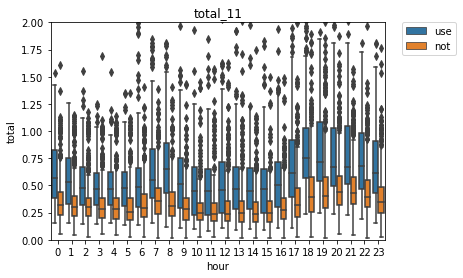

In [140]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_11')
plt.show()

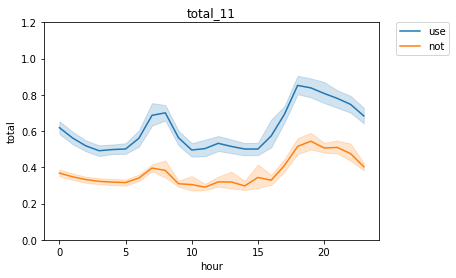

In [141]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_11')
plt.show()

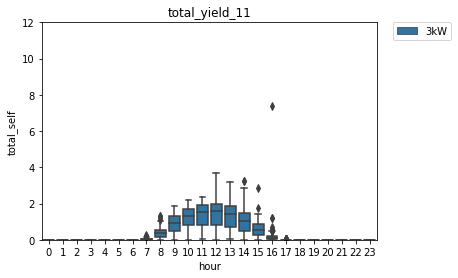

In [142]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_11')
plt.show()

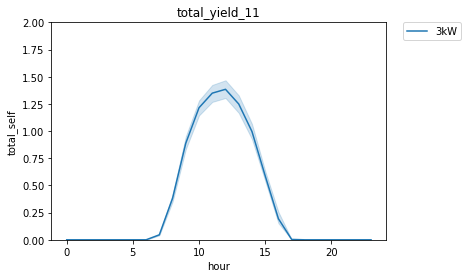

In [143]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_11')
plt.show()

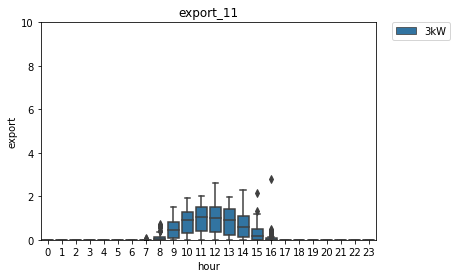

In [144]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_11')
plt.show()

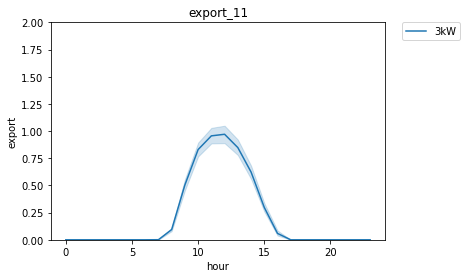

In [145]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_11')
plt.show()

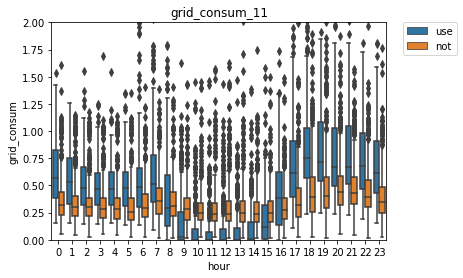

In [146]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_11')
plt.show()

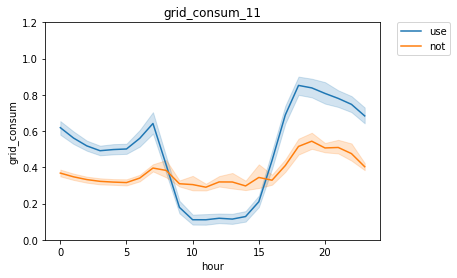

In [147]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_11, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_11')
plt.show()

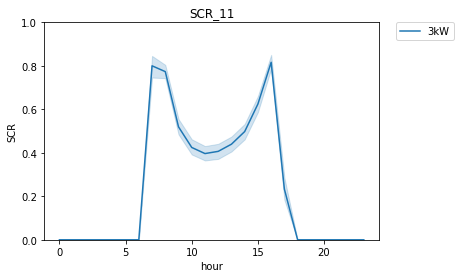

In [148]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_11')
plt.show()

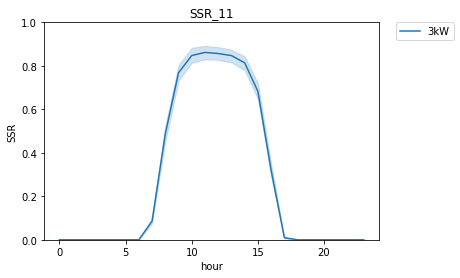

In [149]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_11, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_11')
plt.show()

<hr>

### 2021.12

In [150]:
df_all_hour_21_12 = df_all_hour[df_all_hour.ym == '2021/12']

In [151]:
# 총 전력 소비량
df_all_hour_21_12.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   530.0  0.412253  0.393007  0.019897  0.232574  0.349854  0.479980   
     1   531.0  0.378027  0.369279  0.019897  0.219971  0.330078  0.430176   
     2   532.0  0.366806  0.264585  0.040039  0.210175  0.320068  0.419922   
     3   533.0  0.352639  0.200097  0.020020  0.219971  0.320068  0.419922   
     4   533.0  0.351119  0.208502  0.020020  0.210083  0.310059  0.419922   
     5   526.0  0.368707  0.509531  0.049927  0.209961  0.310059  0.420166   
     6   530.0  0.381646  0.318711  0.020020  0.220001  0.329956  0.449951   
     7   527.0  0.419853  0.258902  0.010010  0.270020  0.380127  0.500000   
     8   528.0  0.390013  0.261106  0.019958  0.229980  0.340088  0.472656   
     9   530.0  0.379147  0.683173  0.030029  0.190063  0.310059  0.429932   
     10  532.0  0.344867  0.462706  0.010010  0.179932  0.270020  0.399902   
     11  536.0  0.348845  0.590538  0.020020  0.160126  0.250000  0.379883   
     12  531.0  0.329716  0.243823  0.020020  0.170105  0.270020  0.409973   
     13  527.0  0.333705  0.342651  0.019958  0.169922  0.260010  0.394958   
     14  533.0  0.333620  0.327721  0.019958  0.160156  0.260010  0.389893   
     15  534.0  0.369814  0.897141  0.020020  0.179932  0.270020  0.387268   
     16  537.0  0.418188  0.624577  0.019958  0.189941  0.300049  0.459961   
     17  533.0  0.467784  0.416001  0.029968  0.229980  0.350098  0.570068   
     18  526.0  0.553155  0.494843  0.020020  0.270020  0.409912  0.644897   
     19  534.0  0.587162  0.839483  0.030029  0.310013  0.439941  0.620117   
     20  526.0  0.546519  0.647752  0.020020  0.320068  0.459961  0.627441   
     21  524.0  0.537870  0.455026  0.049927  0.339966  0.460022  0.609894   
     22  530.0  0.497167  0.408332  0.020020  0.309937  0.439941  0.600098   
     23  531.0  0.429640  0.284516  0.020020  0.270020  0.370117  0.500000   
use  0   274.0  0.618339  0.295998  0.150024  0.380005  0.609985  0.800049   
     1   273.0  0.584244  0.433958  0.150024  0.349976  0.550049  0.750000   
     2   275.0  0.532715  0.242964  0.140015  0.334961  0.489990  0.699951   
     3   274.0  0.508682  0.226103  0.169922  0.330078  0.479980  0.660156   
     4   274.0  0.517811  0.238177  0.140015  0.330078  0.484863  0.669922   
     5   275.0  0.512993  0.250344  0.119995  0.310059  0.469971  0.665161   
     6   274.0  0.581477  0.383044  0.099976  0.290039  0.500000  0.735046   
     7   274.0  0.737795  0.742795  0.159912  0.370026  0.579956  0.957458   
     8   274.0  0.776939  0.421367  0.159912  0.479980  0.710083  0.997498   
     9   275.0  0.703480  0.467653  0.090088  0.400146  0.650146  0.934998   
     10  274.0  0.616327  0.818525  0.079834  0.299866  0.509827  0.710297   
     11  273.0  0.568696  0.358338  0.090088  0.290039  0.519531  0.759766   
     12  275.0  0.609407  0.428996  0.080078  0.325012  0.549927  0.775085   
     13  273.0  0.553261  0.336623  0.079834  0.319824  0.499878  0.699951   
     14  269.0  0.551789  0.329416  0.080078  0.310059  0.510132  0.700073   
     15  275.0  0.519572  0.308817  0.090088  0.280090  0.490112  0.669922   
     16  275.0  0.584263  0.371159  0.089844  0.320740  0.560059  0.724976   
     17  273.0  0.770703  0.409147  0.179932  0.450073  0.709961  0.990234   
     18  273.0  0.872331  0.427444  0.200073  0.559937  0.779785  1.100098   
     19  273.0  0.851357  0.414288  0.219971  0.500000  0.800049  1.100098   
     20  272.0  0.837649  0.421348  0.210083  0.537537  0.750000  1.109924   
     21  269.0  0.810620  0.401425  0.200073  0.520020  0.750000  1.029785   
     22  273.0  0.748150  0.340928  0.200195  0.500000  0.719971  0.959961   
     23  273.0  0.688548  0.319317  0.160034  0.430176  0.669922  0.889893   

               max  
type 시간             
not  0    5.169922  
     1    7.229980  
     2    3.040039  
   

In [152]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   274.0  0.004961  0.008480  0.0  0.000000  0.000000  0.010010   
         8   274.0  0.207008  0.175903  0.0  0.070068  0.169983  0.280029   
         9   275.0  0.703155  0.483178  0.0  0.289978  0.639893  1.090088   
         10  274.0  1.089666  0.625386  0.0  0.560059  1.109863  1.617371   
         11  273.0  1.354231  0.670390  0.0  0.780029  1.520020  1.939941   
         12  275.0  1.405584  0.706191  0.0  0.760010  1.580078  2.030029   
         13  273.0  1.270297  0.673667  0.0  0.659912  1.409912  1.860107   
         14  269.0  1.041730  0.715989  0.0  0.459961  0.989990  1.580078   
         15  275.0  0.634031  0.487128  0.0  0.229980  0.560059  0.920044   
         16  275.0  0.129291  0.140392  0.0  0.040039  0.080078  0.145020   
         17  273.0  0.009310  0.107622  0.0  0.000000  0.000000  0.000000   
         18  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.050049  
         8   0.780029  
         9   1.780029  
         10  2.979980  
         11  2.699951  
         12  4.080078  
         13  2.309814  
         14  7.429932  
         15  3.100098  
         16  0.880127  
         17  1.711426  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [153]:
# 총 전력 수출량
df_all_hour_21_12_use = df_all_hour_21_12[df_all_hour_21_12.type == 'use']
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         8   274.0  0.025440  0.050070  0.0  0.000000  0.000000  0.030029   
         9   275.0  0.300073  0.315868  0.0  0.019928  0.189941  0.505005   
         10  274.0  0.645893  0.489659  0.0  0.202454  0.614990  1.077545   
         11  273.0  0.890441  0.589052  0.0  0.339966  0.969971  1.379883   
         12  275.0  0.923528  0.637697  0.0  0.300018  0.989990  1.449951   
         13  273.0  0.829190  0.603911  0.0  0.260010  0.800049  1.340088   
         14  269.0  0.634999  0.638441  0.0  0.119873  0.500000  1.090088   
         15  275.0  0.330055  0.390295  0.0  0.014954  0.189941  0.559998   
         16  275.0  0.037069  0.082483  0.0  0.000000  0.000000  0.020020   
         17  273.0  0.000587  0.009693  0.0  0.000000  0.000000  0.000000   
         18  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.000000  
         8   0.359985  
         9   1.310059  
         10  1.770020  
         11  2.170166  
         12  2.910034  
         13  2.199951  
         14  6.680176  
         15  2.229980  
         16  0.479980  
         17  0.160156  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [154]:
# 총 그리드 소비량
df_all_hour_21_12.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   530.0  0.412253  0.393007  0.019897  0.232574  0.349854  0.479980   
     1   531.0  0.378027  0.369279  0.019897  0.219971  0.330078  0.430176   
     2   532.0  0.366806  0.264585  0.040039  0.210175  0.320068  0.419922   
     3   533.0  0.352639  0.200097  0.020020  0.219971  0.320068  0.419922   
     4   533.0  0.351119  0.208502  0.020020  0.210083  0.310059  0.419922   
     5   526.0  0.368707  0.509531  0.049927  0.209961  0.310059  0.420166   
     6   530.0  0.381646  0.318711  0.020020  0.220001  0.329956  0.449951   
     7   527.0  0.419853  0.258902  0.010010  0.270020  0.380127  0.500000   
     8   528.0  0.390013  0.261106  0.019958  0.229980  0.340088  0.472656   
     9   530.0  0.379147  0.683173  0.030029  0.190063  0.310059  0.429932   
     10  532.0  0.344867  0.462706  0.010010  0.179932  0.270020  0.399902   
     11  536.0  0.348845  0.590538  0.020020  0.160126  0.250000  0.379883   
     12  531.0  0.329716  0.243823  0.020020  0.170105  0.270020  0.409973   
     13  527.0  0.333705  0.342651  0.019958  0.169922  0.260010  0.394958   
     14  533.0  0.333620  0.327721  0.019958  0.160156  0.260010  0.389893   
     15  534.0  0.369814  0.897141  0.020020  0.179932  0.270020  0.387268   
     16  537.0  0.418188  0.624577  0.019958  0.189941  0.300049  0.459961   
     17  533.0  0.467784  0.416001  0.029968  0.229980  0.350098  0.570068   
     18  526.0  0.553155  0.494843  0.020020  0.270020  0.409912  0.644897   
     19  534.0  0.587162  0.839483  0.030029  0.310013  0.439941  0.620117   
     20  526.0  0.546519  0.647752  0.020020  0.320068  0.459961  0.627441   
     21  524.0  0.537870  0.455026  0.049927  0.339966  0.460022  0.609894   
     22  530.0  0.497167  0.408332  0.020020  0.309937  0.439941  0.600098   
     23  531.0  0.429640  0.284516  0.020020  0.270020  0.370117  0.500000   
use  0   274.0  0.618339  0.295998  0.150024  0.380005  0.609985  0.800049   
     1   273.0  0.584244  0.433958  0.150024  0.349976  0.550049  0.750000   
     2   275.0  0.532715  0.242964  0.140015  0.334961  0.489990  0.699951   
     3   274.0  0.508682  0.226103  0.169922  0.330078  0.479980  0.660156   
     4   274.0  0.517811  0.238177  0.140015  0.330078  0.484863  0.669922   
     5   275.0  0.512993  0.250344  0.119995  0.310059  0.469971  0.665161   
     6   274.0  0.581477  0.383044  0.099976  0.290039  0.500000  0.735046   
     7   274.0  0.732834  0.742657  0.159912  0.369873  0.564941  0.947449   
     8   274.0  0.595371  0.430577  0.040039  0.262695  0.500000  0.814819   
     9   275.0  0.300398  0.448174  0.000000  0.020020  0.130127  0.469849   
     10  274.0  0.172554  0.691319  0.000000  0.000000  0.010132  0.147461   
     11  273.0  0.104907  0.218871  0.000000  0.000000  0.000000  0.109863   
     12  275.0  0.127350  0.274170  0.000000  0.000000  0.000000  0.110107   
     13  273.0  0.112154  0.209197  0.000000  0.000000  0.010010  0.140015   
     14  269.0  0.145058  0.251014  0.000000  0.000000  0.030029  0.180054   
     15  275.0  0.215597  0.282264  0.000000  0.020020  0.109863  0.329834   
     16  275.0  0.492042  0.374411  0.000000  0.189941  0.459961  0.655151   
     17  273.0  0.761980  0.394725  0.179932  0.449707  0.699951  0.989990   
     18  273.0  0.872331  0.427444  0.200073  0.559937  0.779785  1.100098   
     19  273.0  0.851357  0.414288  0.219971  0.500000  0.800049  1.100098   
     20  272.0  0.837649  0.421348  0.210083  0.537537  0.750000  1.109924   
     21  269.0  0.810620  0.401425  0.200073  0.520020  0.750000  1.029785   
     22  273.0  0.748150  0.340928  0.200195  0.500000  0.719971  0.959961   
     23  273.0  0.688548  0.319317  0.160034  0.430176  0.669922  0.889893   

               max  
type 시간             
not  0    5.169922  
     1    7.229980  
     2    3.040039  
   

In [155]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         6   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         7   274.0  0.346715  0.476795  0.0  0.000000  0.000000  1.000000  1.0
         8   274.0  0.841949  0.279653  0.0  0.799878  1.000000  1.000000  1.0
         9   275.0  0.656430  0.278620  0.0  0.432523  0.675167  0.921905  1.0
         10  274.0  0.492949  0.283734  0.0  0.268722  0.428836  0.705957  1.0
         11  273.0  0.429506  0.282057  0.0  0.199950  0.361870  0.571503  1.0
         12  275.0  0.436301  0.284011  0.0  0.214352  0.361558  0.613440  1.0
         13  273.0  0.453128  0.280929  0.0  0.220745  0.397697  0.634671  1.0
         14  269.0  0.518362  0.290989  0.0  0.275099  0.486324  0.737695  1.0
         15  275.0  0.637130  0.302851  0.0  0.346161  0.707551  0.933969  1.0
         16  275.0  0.818861  0.294023  0.0  0.720388  1.000000  1.000000  1.0
         17  273.0  0.105030  0.305835  0.0  0.000000  0.000000  0.000000  1.0
         18  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         19  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         20  272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [156]:
# SSR(자가공급률)
df_all_hour_21_12_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   274.0  0.008991  0.014998  0.0  0.000000  0.000000  0.016898   
         8   274.0  0.288191  0.226616  0.0  0.091658  0.237293  0.457909   
         9   275.0  0.655530  0.324836  0.0  0.391821  0.757922  0.948791   
         10  274.0  0.817224  0.263109  0.0  0.698757  0.968700  1.000000   
         11  273.0  0.871941  0.227782  0.0  0.853142  1.000000  1.000000   
         12  275.0  0.861946  0.228129  0.0  0.820000  1.000000  1.000000   
         13  273.0  0.851659  0.227073  0.0  0.768797  0.981123  1.000000   
         14  269.0  0.803671  0.257646  0.0  0.666608  0.924954  1.000000   
         15  275.0  0.669929  0.309209  0.0  0.422641  0.786493  0.935749   
         16  275.0  0.243829  0.245762  0.0  0.062548  0.130961  0.409678   
         17  273.0  0.006438  0.046462  0.0  0.000000  0.000000  0.000000   
         18  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.083418  
         8   0.925859  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  0.657845  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

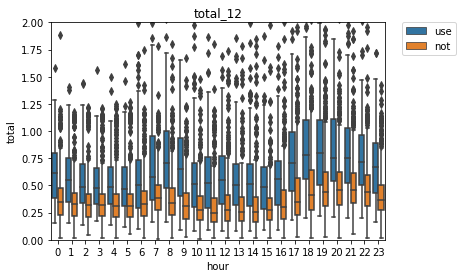

In [157]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_12')
plt.show()

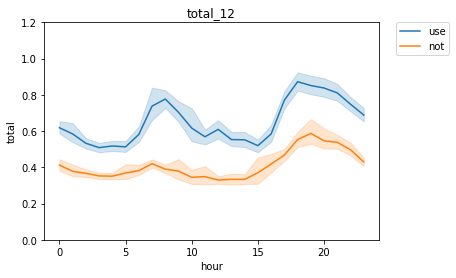

In [158]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_12')
plt.show()

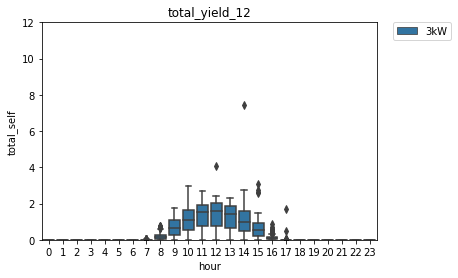

In [159]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_12')
plt.show()

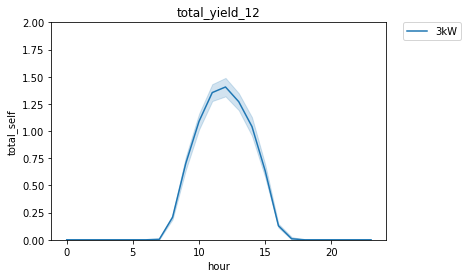

In [160]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_12')
plt.show()

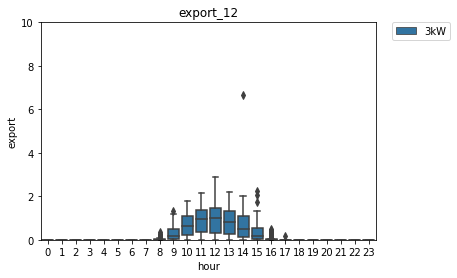

In [161]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_12')
plt.show()

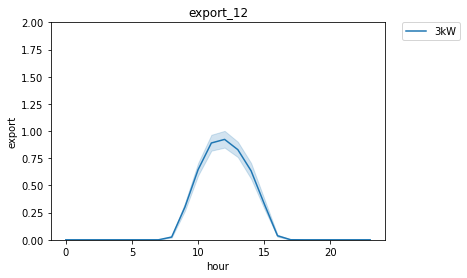

In [162]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_12')
plt.show()

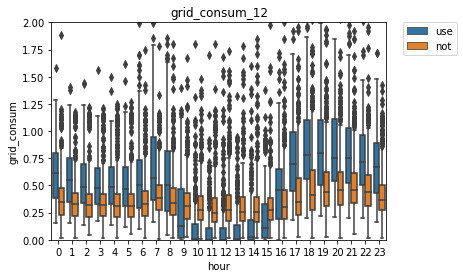

In [163]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_12')
plt.show()

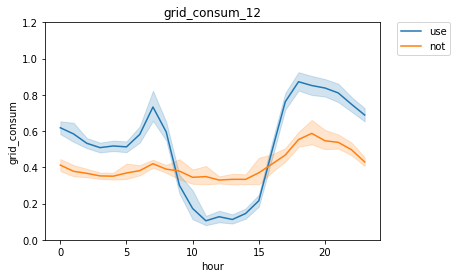

In [164]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_21_12, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_12')
plt.show()

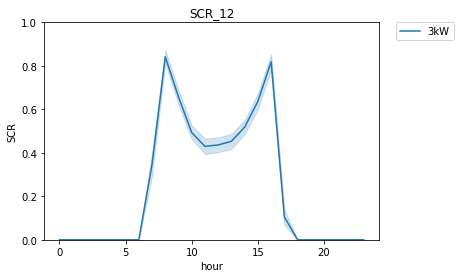

In [165]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_12')
plt.show()

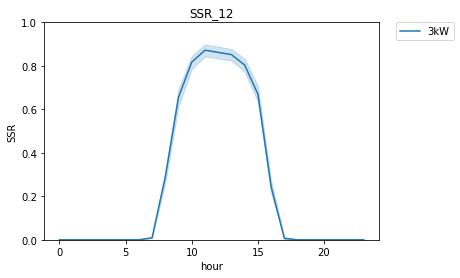

In [166]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_21_12, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_12')
plt.show()

<hr>

### 2022.01

In [167]:
df_all_hour_22_1 = df_all_hour[df_all_hour.ym == '2022/1']

In [168]:
# 총 전력 소비량
df_all_hour_22_1.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   541.0  0.415053  0.259797  0.070068  0.239990  0.360107  0.480103   
     1   540.0  0.380259  0.234227  0.059937  0.220093  0.340088  0.449951   
     2   540.0  0.370964  0.279586  0.059937  0.219971  0.319824  0.419922   
     3   541.0  0.354659  0.216959  0.030029  0.209961  0.319946  0.429932   
     4   538.0  0.349891  0.214953  0.050049  0.209961  0.319824  0.409912   
     5   533.0  0.343145  0.223945  0.040039  0.189941  0.300049  0.409912   
     6   538.0  0.391513  0.412422  0.039917  0.209961  0.330078  0.449951   
     7   538.0  0.454796  0.269974  0.029907  0.282501  0.409912  0.550049   
     8   539.0  0.433970  0.314340  0.020020  0.250000  0.349976  0.510010   
     9   537.0  0.418398  0.598011  0.020020  0.209961  0.310059  0.460205   
     10  540.0  0.421314  0.805443  0.010010  0.190155  0.300049  0.459961   
     11  538.0  0.356708  0.292104  0.020020  0.179932  0.280029  0.430115   
     12  539.0  0.383585  0.568757  0.010010  0.170044  0.280029  0.464966   
     13  537.0  0.358364  0.282015  0.010010  0.180176  0.280029  0.439941   
     14  536.0  0.404815  0.681575  0.019897  0.180176  0.289917  0.422791   
     15  537.0  0.364319  0.323676  0.020020  0.189941  0.290039  0.420166   
     16  538.0  0.418793  0.627197  0.040039  0.199951  0.319824  0.450134   
     17  541.0  0.490890  0.541262  0.020020  0.239990  0.370117  0.550049   
     18  530.0  0.555281  0.476119  0.019897  0.280029  0.430176  0.659912   
     19  536.0  0.580229  0.512320  0.059937  0.310059  0.449951  0.629883   
     20  536.0  0.564359  0.440797  0.099976  0.330078  0.480103  0.630188   
     21  533.0  0.571806  0.665963  0.070068  0.349976  0.479980  0.649902   
     22  539.0  0.516664  0.325917  0.060059  0.309937  0.449951  0.619873   
     23  540.0  0.476421  0.786611  0.099976  0.260010  0.380127  0.530029   
use  0   276.0  0.686667  0.271471  0.189941  0.459961  0.665039  0.869873   
     1   277.0  0.617117  0.222046  0.189941  0.420166  0.609863  0.799805   
     2   276.0  0.603808  0.225027  0.229980  0.410126  0.589844  0.772461   
     3   277.0  0.583268  0.226423  0.209961  0.400024  0.540039  0.759766   
     4   276.0  0.591559  0.360500  0.139893  0.409912  0.540039  0.742676   
     5   277.0  0.577824  0.258190  0.140015  0.369995  0.530029  0.770020   
     6   272.0  0.622169  0.292367  0.189941  0.417480  0.560059  0.810059   
     7   272.0  0.747449  0.415400  0.199951  0.449951  0.679810  0.959961   
     8   272.0  0.847006  0.408966  0.159790  0.509979  0.774902  1.145081   
     9   272.0  0.763954  0.425931  0.089844  0.499969  0.729858  0.950012   
     10  268.0  0.685819  0.453441  0.090088  0.370117  0.615112  0.870026   
     11  272.0  0.689998  0.557550  0.100098  0.367599  0.605103  0.879700   
     12  268.0  0.716355  0.453071  0.079834  0.377686  0.620117  0.962738   
     13  269.0  0.674702  0.413160  0.090088  0.399902  0.590210  0.889648   
     14  269.0  0.647112  0.359484  0.094727  0.409912  0.614746  0.840088   
     15  271.0  0.676067  0.401982  0.070068  0.405029  0.619873  0.880005   
     16  273.0  0.710653  0.838639  0.094971  0.410034  0.619873  0.889648   
     17  271.0  0.823838  0.447988  0.119873  0.540039  0.739990  1.000000   
     18  274.0  0.992160  0.467121  0.209961  0.640045  0.930176  1.209961   
     19  274.0  0.977408  0.428376  0.140137  0.649963  0.950073  1.247498   
     20  274.0  0.923701  0.470883  0.149902  0.620117  0.895203  1.117432   
     21  271.0  0.907477  0.335524  0.260010  0.640076  0.899902  1.119873   
     22  272.0  0.839949  0.298411  0.219971  0.637390  0.835083  1.030029   
     23  274.0  0.787219  0.450473  0.239990  0.532532  0.739990  0.949707   

               max  
type 시간             
not  0    2.029785  
     1    1.959961  
     2    4.349609  
   

In [169]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   272.0  0.001619  0.003693  0.000000  0.000000  0.000000   
         8   272.0  0.167636  0.138087  0.000000  0.069824  0.139893   
         9   272.0  0.681843  0.417070  0.000000  0.330017  0.665039   
         10  268.0  1.131188  0.547168  0.000000  0.737488  1.214966   
         11  272.0  1.456074  0.677107  0.010010  0.927612  1.625000   
         12  268.0  1.557547  0.654319  0.000000  1.060059  1.719971   
         13  269.0  1.530853  0.703072  0.020020  0.960205  1.750000   
         14  269.0  1.279679  0.644672  0.010010  0.729980  1.419922   
         15  271.0  0.895649  0.595256  0.009766  0.415039  0.859863   
         16  273.0  0.323483  0.523612  0.000000  0.100098  0.219971   
         17  271.0  0.017264  0.027470  0.000000  0.000000  0.010010   
         18  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.000000  0.010010  
         8   0.220032  0.719971  
         9   0.950012  1.649902  
         10  1.550049  2.120117  
         11  2.000000  4.760010  
         12  2.129944  2.439941  
         13  2.089844  4.209961  
         14  1.800049  3.949951  
         15  1.310059  5.250000  
         16  0.420166  7.850098  
         17  0.020020  0.169922  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [170]:
# 총 전력 수출량
df_all_hour_22_1_use = df_all_hour_22_1[df_all_hour_22_1.type == 'use']
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         8   272.0  0.012537  0.035160  0.0  0.000000  0.000000  0.000000   
         9   272.0  0.239672  0.260007  0.0  0.029922  0.150024  0.382629   
         10  268.0  0.598697  0.443720  0.0  0.230164  0.530029  0.952545   
         11  272.0  0.882503  0.587627  0.0  0.357574  0.929932  1.349976   
         12  268.0  0.962680  0.612876  0.0  0.387436  1.030029  1.459961   
         13  269.0  0.958439  0.629295  0.0  0.390015  1.000000  1.440186   
         14  269.0  0.754880  0.571577  0.0  0.209961  0.790039  1.189941   
         15  271.0  0.443751  0.455064  0.0  0.070038  0.300049  0.729980   
         16  273.0  0.101886  0.216936  0.0  0.000000  0.010010  0.100098   
         17  271.0  0.000869  0.004652  0.0  0.000000  0.000000  0.000000   
         18  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  271.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  272.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.000000  
         8   0.250000  
         9   1.160156  
         10  1.589844  
         11  2.720215  
         12  2.139893  
         13  3.310059  
         14  3.329834  
         15  3.199951  
         16  2.170044  
         17  0.050049  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [171]:
# 총 그리드 소비량
df_all_hour_22_1.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   541.0  0.415053  0.259797  0.070068  0.239990  0.360107  0.480103   
     1   540.0  0.380259  0.234227  0.059937  0.220093  0.340088  0.449951   
     2   540.0  0.370964  0.279586  0.059937  0.219971  0.319824  0.419922   
     3   541.0  0.354659  0.216959  0.030029  0.209961  0.319946  0.429932   
     4   538.0  0.349891  0.214953  0.050049  0.209961  0.319824  0.409912   
     5   533.0  0.343145  0.223945  0.040039  0.189941  0.300049  0.409912   
     6   538.0  0.391513  0.412422  0.039917  0.209961  0.330078  0.449951   
     7   538.0  0.454796  0.269974  0.029907  0.282501  0.409912  0.550049   
     8   539.0  0.433970  0.314340  0.020020  0.250000  0.349976  0.510010   
     9   537.0  0.418398  0.598011  0.020020  0.209961  0.310059  0.460205   
     10  540.0  0.421314  0.805443  0.010010  0.190155  0.300049  0.459961   
     11  538.0  0.356708  0.292104  0.020020  0.179932  0.280029  0.430115   
     12  539.0  0.383585  0.568757  0.010010  0.170044  0.280029  0.464966   
     13  537.0  0.358364  0.282015  0.010010  0.180176  0.280029  0.439941   
     14  536.0  0.404815  0.681575  0.019897  0.180176  0.289917  0.422791   
     15  537.0  0.364319  0.323676  0.020020  0.189941  0.290039  0.420166   
     16  538.0  0.418793  0.627197  0.040039  0.199951  0.319824  0.450134   
     17  541.0  0.490890  0.541262  0.020020  0.239990  0.370117  0.550049   
     18  530.0  0.555281  0.476119  0.019897  0.280029  0.430176  0.659912   
     19  536.0  0.580229  0.512320  0.059937  0.310059  0.449951  0.629883   
     20  536.0  0.564359  0.440797  0.099976  0.330078  0.480103  0.630188   
     21  533.0  0.571806  0.665963  0.070068  0.349976  0.479980  0.649902   
     22  539.0  0.516664  0.325917  0.060059  0.309937  0.449951  0.619873   
     23  540.0  0.476421  0.786611  0.099976  0.260010  0.380127  0.530029   
use  0   276.0  0.686667  0.271471  0.189941  0.459961  0.665039  0.869873   
     1   277.0  0.617117  0.222046  0.189941  0.420166  0.609863  0.799805   
     2   276.0  0.603808  0.225027  0.229980  0.410126  0.589844  0.772461   
     3   277.0  0.583268  0.226423  0.209961  0.400024  0.540039  0.759766   
     4   276.0  0.591559  0.360500  0.139893  0.409912  0.540039  0.742676   
     5   277.0  0.577824  0.258190  0.140015  0.369995  0.530029  0.770020   
     6   272.0  0.622169  0.292367  0.189941  0.417480  0.560059  0.810059   
     7   272.0  0.745829  0.415622  0.199951  0.447449  0.674927  0.959961   
     8   272.0  0.691908  0.414199  0.059814  0.350067  0.614868  0.982574   
     9   272.0  0.321783  0.380643  0.000000  0.060059  0.170105  0.512512   
     10  268.0  0.153329  0.296753  0.000000  0.000000  0.020020  0.149902   
     11  272.0  0.116426  0.265904  0.000000  0.000000  0.000000  0.102600   
     12  268.0  0.121488  0.238150  0.000000  0.000000  0.000000  0.109863   
     13  269.0  0.102288  0.211415  0.000000  0.000000  0.000000  0.090088   
     14  269.0  0.122312  0.233914  0.000000  0.000000  0.009766  0.120117   
     15  271.0  0.224169  0.328082  0.000000  0.000000  0.049805  0.334839   
     16  273.0  0.489056  0.571959  0.000000  0.149902  0.430176  0.669922   
     17  271.0  0.807444  0.452669  0.090088  0.520020  0.739746  1.000000   
     18  274.0  0.992160  0.467121  0.209961  0.640045  0.930176  1.209961   
     19  274.0  0.977408  0.428376  0.140137  0.649963  0.950073  1.247498   
     20  274.0  0.923701  0.470883  0.149902  0.620117  0.895203  1.117432   
     21  271.0  0.907477  0.335524  0.260010  0.640076  0.899902  1.119873   
     22  272.0  0.839949  0.298411  0.219971  0.637390  0.835083  1.030029   
     23  274.0  0.787219  0.450473  0.239990  0.532532  0.739990  0.949707   

               max  
type 시간             
not  0    2.029785  
     1    1.959961  
     2    4.349609  
   

In [172]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   272.0  0.161765  0.368914  0.000000  0.000000  0.000000   
         8   272.0  0.899833  0.243102  0.000000  0.937405  1.000000   
         9   272.0  0.711698  0.238566  0.000000  0.554790  0.749915   
         10  268.0  0.533539  0.261970  0.000000  0.332397  0.511481   
         11  272.0  0.465836  0.267347  0.058880  0.245628  0.420042   
         12  268.0  0.447583  0.262621  0.000000  0.226102  0.405728   
         13  269.0  0.447175  0.255847  0.048172  0.261046  0.407370   
         14  269.0  0.504732  0.270094  0.055723  0.280697  0.457428   
         15  271.0  0.619471  0.273362  0.054740  0.401264  0.618338   
         16  273.0  0.817331  0.244523  0.000000  0.697331  0.937405   
         17  271.0  0.574700  0.485784  0.000000  0.000000  1.000000   
         18  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   0.000000  1.0  
         8   1.000000  1.0  
         9   0.913444  1.0  
         10  0.723866  1.0  
         11  0.652946  1.0  
         12  0.631808  1.0  
         13  0.606042  1.0  
         14  0.692287  1.0  
         15  0.861367  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [173]:
# SSR(자가공급률)
df_all_hour_22_1_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   272.0  0.003022  0.007785  0.000000  0.000000  0.000000   
         8   272.0  0.219151  0.170121  0.000000  0.083414  0.187222   
         9   272.0  0.648648  0.287592  0.000000  0.430615  0.712232   
         10  268.0  0.841499  0.243394  0.000000  0.783082  0.953978   
         11  272.0  0.882377  0.210802  0.016680  0.849269  1.000000   
         12  268.0  0.883980  0.207725  0.000000  0.865884  1.000000   
         13  269.0  0.892409  0.196605  0.021299  0.875139  1.000000   
         14  269.0  0.859346  0.233308  0.012059  0.842567  0.984736   
         15  271.0  0.744872  0.294885  0.013527  0.526624  0.895260   
         16  273.0  0.396518  0.299842  0.000000  0.140103  0.314266   
         17  271.0  0.030699  0.055579  0.000000  0.000000  0.011248   
         18  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  271.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  272.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.000000  0.043524  
         8   0.304157  0.793597  
         9   0.888024  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.617953  1.000000  
         17  0.036487  0.375229  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

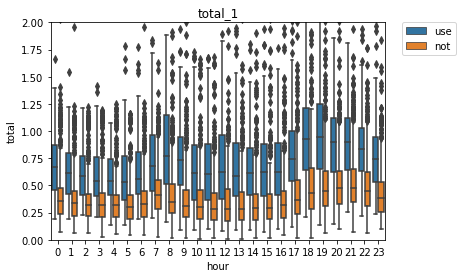

In [174]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_1')
plt.show()

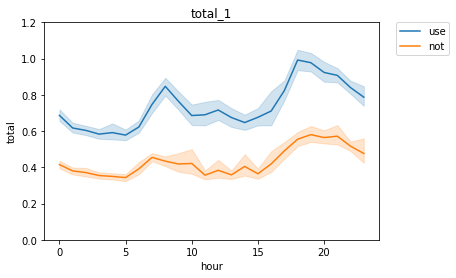

In [175]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_1')
plt.show()

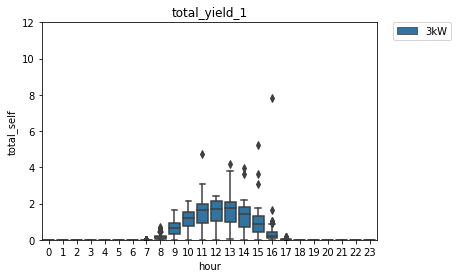

In [176]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_1')
plt.show()

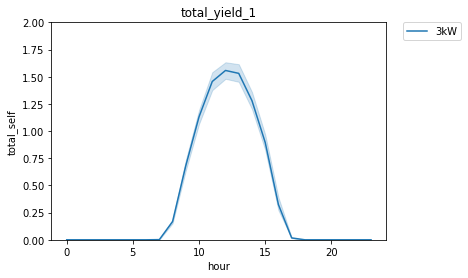

In [177]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_1')
plt.show()

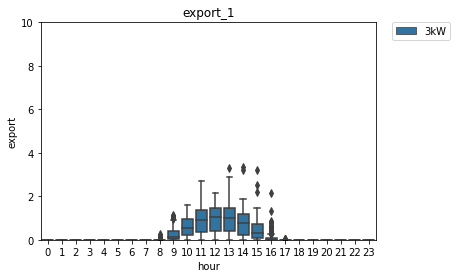

In [178]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_1')
plt.show()

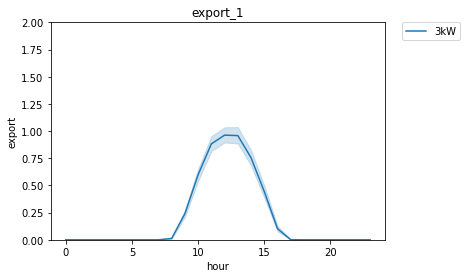

In [179]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_1')
plt.show()

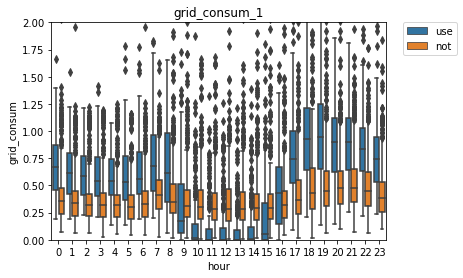

In [180]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_1')
plt.show()

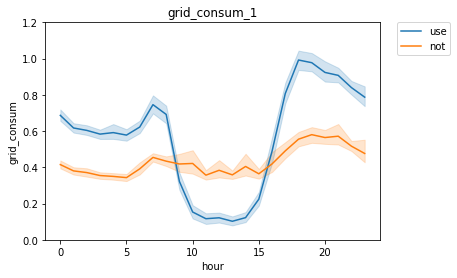

In [181]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_1, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_1')
plt.show()

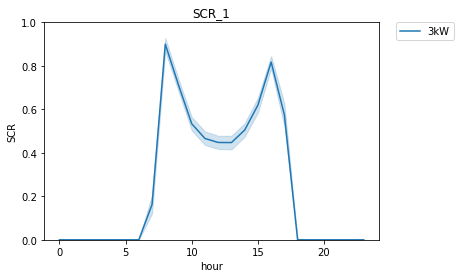

In [182]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_1')
plt.show()

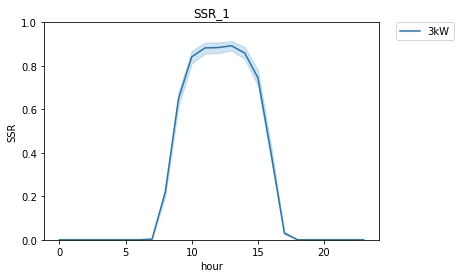

In [183]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_1, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_1')
plt.show()

<hr>

### 2022.02

In [184]:
df_all_hour_22_2 = df_all_hour[df_all_hour.ym == '2022/2']

In [185]:
# 총 전력 소비량
df_all_hour_22_2.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   490.0  0.409492  0.222510  0.099854  0.250000  0.370117  0.479980   
     1   491.0  0.382240  0.225807  0.070068  0.229980  0.339844  0.445068   
     2   490.0  0.366854  0.223065  0.079834  0.220123  0.320068  0.429932   
     3   492.0  0.367200  0.245970  0.039917  0.219971  0.320312  0.429932   
     4   494.0  0.377420  0.433317  0.089966  0.212646  0.310059  0.430176   
     5   491.0  0.366193  0.242044  0.029907  0.200012  0.319824  0.440186   
     6   493.0  0.389777  0.258982  0.020020  0.219971  0.339844  0.469971   
     7   493.0  0.493326  0.623652  0.020020  0.280029  0.410156  0.550049   
     8   491.0  0.484600  0.841782  0.060059  0.250000  0.359863  0.500000   
     9   494.0  0.425995  0.418667  0.020020  0.229980  0.329834  0.489990   
     10  497.0  0.428692  0.662550  0.049927  0.209961  0.309814  0.439941   
     11  497.0  0.393969  0.389973  0.020020  0.190063  0.300049  0.450195   
     12  492.0  0.388524  0.330314  0.020020  0.189941  0.300049  0.452637   
     13  494.0  0.383872  0.329570  0.049927  0.189941  0.290039  0.450195   
     14  490.0  0.378254  0.330973  0.049927  0.199951  0.300049  0.449951   
     15  493.0  0.371586  0.308480  0.030029  0.200195  0.310059  0.439941   
     16  492.0  0.395096  0.358878  0.039917  0.200165  0.320068  0.469971   
     17  489.0  0.474275  0.471643  0.019897  0.220093  0.350098  0.530029   
     18  486.0  0.566856  0.552693  0.020020  0.262451  0.410156  0.600098   
     19  488.0  0.653771  0.790148  0.099976  0.320068  0.459961  0.692627   
     20  492.0  0.616706  0.492129  0.099976  0.349976  0.479980  0.672607   
     21  489.0  0.604294  0.463099  0.109863  0.360107  0.489990  0.649902   
     22  494.0  0.534187  0.409047  0.099976  0.320068  0.459961  0.617432   
     23  495.0  0.462149  0.260331  0.089966  0.280029  0.410156  0.539917   
use  0   246.0  0.644063  0.241161  0.140015  0.439941  0.620117  0.850098   
     1   248.0  0.591223  0.230353  0.169922  0.397552  0.550049  0.790039   
     2   249.0  0.556621  0.225826  0.169922  0.380127  0.520020  0.729980   
     3   248.0  0.529158  0.200081  0.170166  0.380096  0.494995  0.645020   
     4   250.0  0.541862  0.205120  0.149902  0.382477  0.500000  0.680023   
     5   249.0  0.535313  0.218388  0.179932  0.379883  0.489990  0.649902   
     6   245.0  0.551841  0.223708  0.170044  0.399902  0.509766  0.729980   
     7   243.0  0.707540  0.790525  0.200195  0.429932  0.549805  0.855103   
     8   249.0  0.790212  0.380073  0.180176  0.490234  0.719727  1.050049   
     9   246.0  0.782725  0.519187  0.090088  0.470001  0.740051  0.999954   
     10  246.0  0.673924  0.415384  0.109863  0.369873  0.639893  0.879852   
     11  243.0  0.617920  0.363899  0.090088  0.310059  0.579834  0.825165   
     12  247.0  0.584284  0.316000  0.090088  0.349854  0.549805  0.779968   
     13  246.0  0.606806  0.325151  0.100342  0.372742  0.560059  0.810150   
     14  247.0  0.588585  0.371634  0.109863  0.379761  0.529846  0.730194   
     15  249.0  0.566909  0.286028  0.070068  0.359863  0.520020  0.759766   
     16  249.0  0.610114  0.382007  0.099854  0.350342  0.530396  0.769897   
     17  250.0  0.724760  0.398631  0.169922  0.462585  0.640137  0.927490   
     18  248.0  0.860678  0.367846  0.199951  0.580078  0.810059  1.080078   
     19  248.0  0.910082  0.381968  0.280029  0.610046  0.854980  1.192505   
     20  250.0  0.829466  0.353140  0.270020  0.560059  0.785034  1.037109   
     21  248.0  0.809738  0.327224  0.229980  0.568634  0.777466  1.040039   
     22  250.0  0.771034  0.321925  0.228027  0.532471  0.705078  0.997498   
     23  247.0  0.704926  0.258051  0.189941  0.520020  0.679932  0.910034   

               max  
type 시간             
not  0    1.170410  
     1    2.080078  
     2    2.120117  
   

In [186]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   243.0  0.028899  0.042793  0.000000  0.000000  0.020020   
         8   249.0  0.333043  0.231541  0.000000  0.169922  0.280029   
         9   246.0  0.891512  0.457826  0.000000  0.550110  0.879883   
         10  246.0  1.355136  0.590851  0.010010  0.939941  1.404907   
         11  243.0  1.649713  0.672696  0.000000  1.150024  1.760010   
         12  247.0  1.768907  0.694257  0.020020  1.205078  1.930176   
         13  246.0  1.685299  0.656035  0.019775  1.130127  1.919922   
         14  247.0  1.492751  0.752898  0.010010  0.924927  1.630127   
         15  249.0  1.103969  0.809023  0.000000  0.629883  1.089844   
         16  249.0  0.541610  0.375530  0.000000  0.250000  0.449951   
         17  250.0  0.138687  0.494086  0.000000  0.040039  0.079834   
         18  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  247.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.000000  
         6   0.000000   0.000000  
         7   0.030029   0.290039  
         8   0.419922   1.119873  
         9   1.225098   1.940186  
         10  1.820068   3.520020  
         11  2.144897   4.779785  
         12  2.299927   4.949951  
         13  2.219971   3.820068  
         14  1.984985   8.030029  
         15  1.510010  10.969971  
         16  0.810059   2.940186  
         17  0.137268   7.679932  
         18  0.000000   0.000000  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [187]:
# 총 전력 수출량
df_all_hour_22_2_use = df_all_hour_22_2[df_all_hour_22_2.type == 'use']
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   246.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   248.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   249.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   248.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   250.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   249.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   245.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   243.0  0.001440  0.009040  0.0  0.000000  0.000000  0.000000   
         8   249.0  0.057177  0.109160  0.0  0.000000  0.010010  0.050049   
         9   246.0  0.389353  0.361389  0.0  0.082520  0.284973  0.630127   
         10  246.0  0.804796  0.549900  0.0  0.352509  0.752441  1.200134   
         11  243.0  1.114793  0.652732  0.0  0.644958  1.169922  1.559937   
         12  247.0  1.243932  0.672857  0.0  0.689972  1.360107  1.724976   
         13  246.0  1.139953  0.632547  0.0  0.592514  1.214966  1.657410   
         14  247.0  0.963262  0.625192  0.0  0.404968  1.020020  1.420044   
         15  249.0  0.640727  0.732066  0.0  0.169922  0.569824  1.000000   
         16  249.0  0.219198  0.295895  0.0  0.009888  0.089844  0.340088   
         17  250.0  0.039472  0.328766  0.0  0.000000  0.000000  0.000000   
         18  248.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  248.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  250.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  248.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  250.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  247.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.089844  
         8   0.620117  
         9   1.369873  
         10  3.010010  
         11  4.130127  
         12  4.089844  
         13  3.559814  
         14  4.294922  
         15  9.610107  
         16  2.250000  
         17  5.099976  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [188]:
# 총 그리드 소비량
df_all_hour_22_2.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   490.0  0.409492  0.222510  0.099854  0.250000  0.370117  0.479980   
     1   491.0  0.382240  0.225807  0.070068  0.229980  0.339844  0.445068   
     2   490.0  0.366854  0.223065  0.079834  0.220123  0.320068  0.429932   
     3   492.0  0.367200  0.245970  0.039917  0.219971  0.320312  0.429932   
     4   494.0  0.377420  0.433317  0.089966  0.212646  0.310059  0.430176   
     5   491.0  0.366193  0.242044  0.029907  0.200012  0.319824  0.440186   
     6   493.0  0.389777  0.258982  0.020020  0.219971  0.339844  0.469971   
     7   493.0  0.493326  0.623652  0.020020  0.280029  0.410156  0.550049   
     8   491.0  0.484600  0.841782  0.060059  0.250000  0.359863  0.500000   
     9   494.0  0.425995  0.418667  0.020020  0.229980  0.329834  0.489990   
     10  497.0  0.428692  0.662550  0.049927  0.209961  0.309814  0.439941   
     11  497.0  0.393969  0.389973  0.020020  0.190063  0.300049  0.450195   
     12  492.0  0.388524  0.330314  0.020020  0.189941  0.300049  0.452637   
     13  494.0  0.383872  0.329570  0.049927  0.189941  0.290039  0.450195   
     14  490.0  0.378254  0.330973  0.049927  0.199951  0.300049  0.449951   
     15  493.0  0.371586  0.308480  0.030029  0.200195  0.310059  0.439941   
     16  492.0  0.395096  0.358878  0.039917  0.200165  0.320068  0.469971   
     17  489.0  0.474275  0.471643  0.019897  0.220093  0.350098  0.530029   
     18  486.0  0.566856  0.552693  0.020020  0.262451  0.410156  0.600098   
     19  488.0  0.653771  0.790148  0.099976  0.320068  0.459961  0.692627   
     20  492.0  0.616706  0.492129  0.099976  0.349976  0.479980  0.672607   
     21  489.0  0.604294  0.463099  0.109863  0.360107  0.489990  0.649902   
     22  494.0  0.534187  0.409047  0.099976  0.320068  0.459961  0.617432   
     23  495.0  0.462149  0.260331  0.089966  0.280029  0.410156  0.539917   
use  0   246.0  0.644063  0.241161  0.140015  0.439941  0.620117  0.850098   
     1   248.0  0.591223  0.230353  0.169922  0.397552  0.550049  0.790039   
     2   249.0  0.556621  0.225826  0.169922  0.380127  0.520020  0.729980   
     3   248.0  0.529158  0.200081  0.170166  0.380096  0.494995  0.645020   
     4   250.0  0.541862  0.205120  0.149902  0.382477  0.500000  0.680023   
     5   249.0  0.535313  0.218388  0.179932  0.379883  0.489990  0.649902   
     6   245.0  0.551841  0.223708  0.170044  0.399902  0.509766  0.729980   
     7   243.0  0.680081  0.792687  0.149902  0.390137  0.510254  0.830078   
     8   249.0  0.514345  0.408834  0.000000  0.199951  0.409912  0.770020   
     9   246.0  0.280565  0.471792  0.000000  0.020020  0.119751  0.375000   
     10  246.0  0.123584  0.247382  0.000000  0.000000  0.010010  0.120056   
     11  243.0  0.083000  0.195976  0.000000  0.000000  0.000000  0.050293   
     12  247.0  0.059309  0.153383  0.000000  0.000000  0.000000  0.040039   
     13  246.0  0.061460  0.137523  0.000000  0.000000  0.000000  0.057617   
     14  247.0  0.059096  0.131308  0.000000  0.000000  0.000000  0.044922   
     15  249.0  0.103667  0.174806  0.000000  0.000000  0.020020  0.140137   
     16  249.0  0.287702  0.371192  0.000000  0.030029  0.179688  0.410156   
     17  250.0  0.625546  0.389769  0.030029  0.340088  0.580017  0.820068   
     18  248.0  0.860678  0.367846  0.199951  0.580078  0.810059  1.080078   
     19  248.0  0.910082  0.381968  0.280029  0.610046  0.854980  1.192505   
     20  250.0  0.829466  0.353140  0.270020  0.560059  0.785034  1.037109   
     21  248.0  0.809738  0.327224  0.229980  0.568634  0.777466  1.040039   
     22  250.0  0.771034  0.321925  0.228027  0.532471  0.705078  0.997498   
     23  247.0  0.704926  0.258051  0.189941  0.520020  0.679932  0.910034   

               max  
type 시간             
not  0    1.170410  
     1    2.080078  
     2    2.120117  
   

In [189]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   243.0  0.716988  0.445456  0.000000  0.000000  1.000000   
         8   249.0  0.852484  0.231697  0.000000  0.789338  0.953436   
         9   246.0  0.634717  0.268385  0.000000  0.414507  0.661204   
         10  246.0  0.473862  0.262804  0.052570  0.247358  0.445119   
         11  243.0  0.381221  0.241564  0.000000  0.194234  0.349190   
         12  247.0  0.352477  0.221377  0.057746  0.174440  0.314530   
         13  246.0  0.379559  0.228278  0.054932  0.204493  0.350602   
         14  247.0  0.416379  0.232260  0.060040  0.236531  0.380486   
         15  249.0  0.513867  0.257232  0.000000  0.297590  0.496729   
         16  249.0  0.721757  0.274924  0.000000  0.515637  0.790909   
         17  250.0  0.888126  0.246717  0.000000  0.913838  1.000000   
         18  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  247.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  0.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.870482  1.0  
         10  0.644871  1.0  
         11  0.495545  1.0  
         12  0.448784  1.0  
         13  0.489303  1.0  
         14  0.553920  1.0  
         15  0.701166  1.0  
         16  0.975581  1.0  
         17  1.000000  1.0  
         18  0.000000  0.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [190]:
# SSR(자가공급률)
df_all_hour_22_2_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   246.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   249.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   245.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         7   243.0  0.049889  0.070716  0.000000  0.000000  0.030348   
         8   249.0  0.423245  0.264316  0.000000  0.229703  0.381998   
         9   246.0  0.738513  0.275511  0.000000  0.595915  0.847048   
         10  246.0  0.873829  0.218038  0.010998  0.848738  0.985199   
         11  243.0  0.915239  0.186573  0.000000  0.931995  1.000000   
         12  247.0  0.931553  0.150286  0.033940  0.939852  1.000000   
         13  246.0  0.926649  0.149486  0.036635  0.931774  1.000000   
         14  247.0  0.923006  0.147603  0.008936  0.904590  1.000000   
         15  249.0  0.853967  0.201445  0.000000  0.764495  0.954857   
         16  249.0  0.630517  0.297613  0.000000  0.361577  0.658333   
         17  250.0  0.178047  0.186916  0.000000  0.052123  0.113312   
         18  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         19  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  248.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  250.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  247.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.000000  
         7   0.061369  0.452787  
         8   0.620733  1.000000  
         9   0.965683  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.916497  1.000000  
         17  0.220094  0.872671  
         18  0.000000  0.000000  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

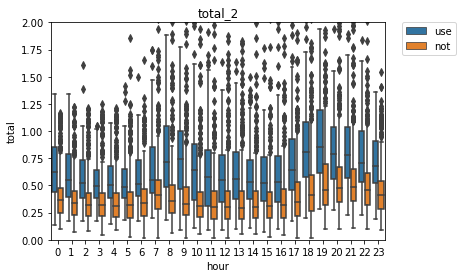

In [201]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_2')
plt.show()

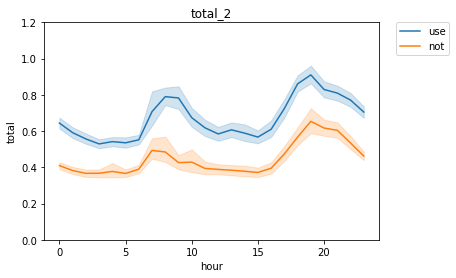

In [202]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_2')
plt.show()

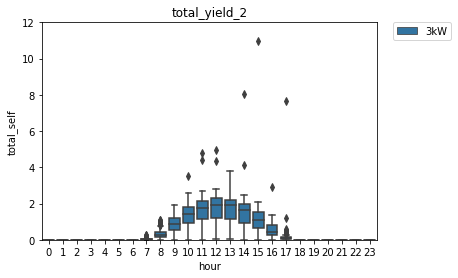

In [203]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_2')
plt.show()

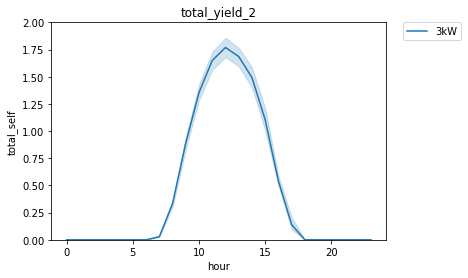

In [204]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_2')
plt.show()

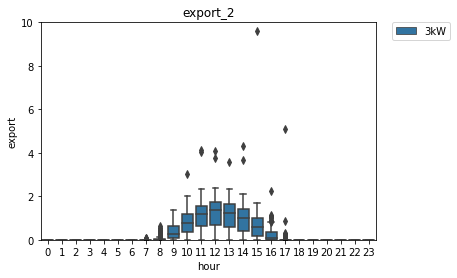

In [205]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_2')
plt.show()

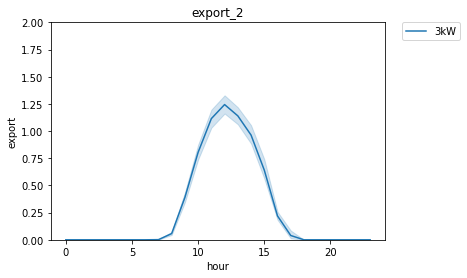

In [206]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_2')
plt.show()

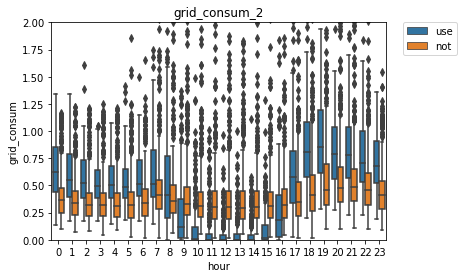

In [207]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_2')
plt.show()

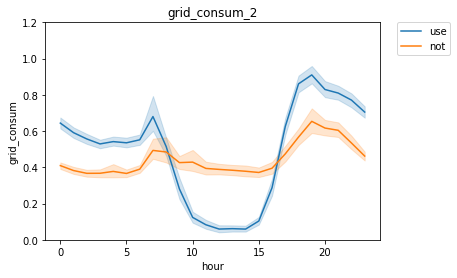

In [208]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_2, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_2')
plt.show()

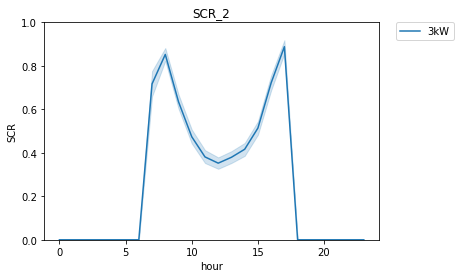

In [209]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_2')
plt.show()

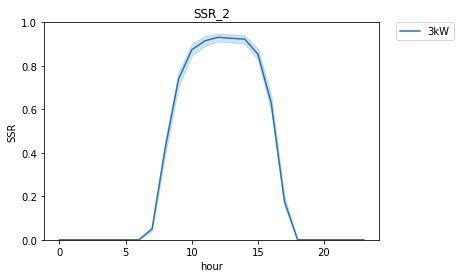

In [210]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_2, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_2')
plt.show()

<hr>

### 2022.03

In [211]:
df_all_hour_22_3 = df_all_hour[df_all_hour.ym == '2022/3']

In [212]:
# 총 전력 소비량
df_all_hour_22_3.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   511.0  0.378879  0.373469  0.079834  0.209961  0.330078  0.439941   
     1   513.0  0.341659  0.230773  0.059937  0.199951  0.300049  0.399902   
     2   513.0  0.338154  0.301088  0.059937  0.199951  0.290039  0.390137   
     3   516.0  0.325527  0.225087  0.020020  0.189941  0.280029  0.389893   
     4   517.0  0.323115  0.219471  0.069946  0.180054  0.280029  0.380127   
     5   513.0  0.331498  0.266168  0.040039  0.180176  0.290039  0.399902   
     6   515.0  0.392923  0.659524  0.020020  0.209961  0.310059  0.445068   
     7   518.0  0.407259  0.223520  0.010010  0.270020  0.369934  0.500000   
     8   522.0  0.357239  0.239117  0.010010  0.209961  0.300049  0.429932   
     9   522.0  0.340614  0.634182  0.020020  0.179993  0.270020  0.390076   
     10  523.0  0.303511  0.210856  0.020020  0.169922  0.260010  0.385010   
     11  522.0  0.292305  0.201728  0.020020  0.149902  0.250000  0.380127   
     12  519.0  0.321580  0.467295  0.029907  0.160156  0.259766  0.380005   
     13  522.0  0.297309  0.209378  0.039917  0.159912  0.250000  0.379883   
     14  517.0  0.305244  0.264350  0.020020  0.159912  0.250000  0.369873   
     15  518.0  0.309163  0.317877  0.019897  0.160065  0.260010  0.350098   
     16  516.0  0.325378  0.288263  0.020020  0.179932  0.270020  0.370117   
     17  512.0  0.389927  0.408853  0.020020  0.199951  0.280029  0.450195   
     18  512.0  0.459915  0.411807  0.020020  0.229980  0.350098  0.550049   
     19  513.0  0.580802  1.240528  0.040039  0.280029  0.410034  0.570068   
     20  512.0  0.545724  0.444678  0.040039  0.310059  0.449951  0.580078   
     21  511.0  0.527417  0.453881  0.109985  0.334961  0.449951  0.595093   
     22  515.0  0.476295  0.309810  0.080078  0.290039  0.429932  0.569946   
     23  512.0  0.407517  0.262229  0.050049  0.239990  0.370117  0.489990   
use  0   276.0  0.581196  0.354172  0.149902  0.349854  0.529785  0.750000   
     1   274.0  0.533896  0.264946  0.140137  0.329987  0.490112  0.697266   
     2   277.0  0.500003  0.228971  0.139893  0.329956  0.469971  0.620117   
     3   275.0  0.477280  0.202764  0.140137  0.314941  0.450195  0.599854   
     4   273.0  0.480254  0.210768  0.140015  0.310059  0.459961  0.590332   
     5   277.0  0.469415  0.210317  0.149902  0.300049  0.439941  0.590332   
     6   273.0  0.508771  0.273313  0.140137  0.299805  0.479492  0.629883   
     7   275.0  0.673091  0.415844  0.149902  0.384827  0.560059  0.830078   
     8   274.0  0.707266  0.364707  0.140137  0.429932  0.639893  0.882263   
     9   274.0  0.582839  0.320406  0.080078  0.342529  0.550049  0.769958   
     10  272.0  0.492391  0.280748  0.079834  0.260010  0.444946  0.649933   
     11  273.0  0.473712  0.285777  0.070068  0.250000  0.439941  0.649780   
     12  274.0  0.548610  0.612938  0.119873  0.270020  0.459717  0.680023   
     13  274.0  0.486091  0.272899  0.060059  0.279785  0.439575  0.630081   
     14  276.0  0.471766  0.252565  0.120117  0.270020  0.420166  0.592468   
     15  272.0  0.476444  0.264624  0.089844  0.277405  0.410095  0.599915   
     16  271.0  0.512755  0.277199  0.090088  0.309814  0.460205  0.640076   
     17  274.0  0.589630  0.309565  0.109985  0.359985  0.519775  0.737549   
     18  274.0  0.767500  0.326305  0.150146  0.512634  0.719727  0.959961   
     19  274.0  0.799340  0.360838  0.169922  0.500000  0.744995  1.027344   
     20  275.0  0.773155  0.363536  0.159912  0.500000  0.680176  1.009888   
     21  275.0  0.733053  0.359784  0.160156  0.484985  0.659912  0.950195   
     22  273.0  0.721085  0.365134  0.199951  0.459961  0.629883  0.930176   
     23  275.0  0.641446  0.331144  0.159912  0.380005  0.579834  0.870117   

               max  
type 시간             
not  0    6.800049  
     1    2.089844  
     2    5.060059  
   

In [213]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   273.0  0.003730  0.011524  0.000000  0.000000  0.000000   
         7   275.0  0.116414  0.131260  0.000000  0.020020  0.080078   
         8   274.0  0.447290  0.343504  0.000000  0.172546  0.409912   
         9   274.0  0.869587  0.579254  0.000000  0.380188  0.824829   
         10  272.0  1.192158  0.721344  0.000000  0.540039  1.149902   
         11  273.0  1.432549  0.871378  0.000000  0.639893  1.469971   
         12  274.0  1.528623  0.830862  0.010010  0.775024  1.704956   
         13  274.0  1.438829  0.815898  0.009766  0.669922  1.550049   
         14  276.0  1.298152  0.760932  0.000000  0.587585  1.414917   
         15  272.0  0.994466  0.615362  0.000000  0.459961  0.964844   
         16  271.0  0.626851  0.461985  0.000000  0.229980  0.540039   
         17  274.0  0.198666  0.158143  0.000000  0.071350  0.169922   
         18  274.0  0.010621  0.015110  0.000000  0.000000  0.009766   
         19  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.109863  
         7   0.159912  0.890137  
         8   0.610229  1.700195  
         9   1.327576  2.240234  
         10  1.832642  2.700195  
         11  2.120117  6.339844  
         12  2.257324  3.689941  
         13  2.209961  2.754883  
         14  1.979980  3.699951  
         15  1.562561  2.350098  
         16  0.974854  3.290039  
         17  0.279785  0.810059  
         18  0.010254  0.089844  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [214]:
# 총 전력 수출량
df_all_hour_22_3_use = df_all_hour_22_3[df_all_hour_22_3.type == 'use']
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   276.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   273.0  0.000037  0.000606  0.0  0.000000  0.000000  0.000000   
         7   275.0  0.010437  0.042094  0.0  0.000000  0.000000  0.000000   
         8   274.0  0.134752  0.209507  0.0  0.000000  0.030029  0.207458   
         9   274.0  0.480829  0.493443  0.0  0.040039  0.294922  0.817383   
         10  272.0  0.807076  0.662256  0.0  0.177490  0.704956  1.380127   
         11  273.0  1.039965  0.815080  0.0  0.280029  0.979980  1.699951   
         12  274.0  1.110134  0.803665  0.0  0.342529  1.190002  1.807556   
         13  274.0  1.038173  0.769021  0.0  0.309967  1.019897  1.710144   
         14  276.0  0.910437  0.718156  0.0  0.179932  0.884949  1.545044   
         15  272.0  0.630154  0.576955  0.0  0.077484  0.460083  1.072571   
         16  271.0  0.315496  0.389191  0.0  0.010010  0.150146  0.530029   
         17  274.0  0.042631  0.082893  0.0  0.000000  0.000000  0.040039   
         18  274.0  0.000110  0.001044  0.0  0.000000  0.000000  0.000000   
         19  274.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.010010  
         7   0.409912  
         8   1.189941  
         9   1.880127  
         10  2.229980  
         11  4.829834  
         12  3.020020  
         13  2.550049  
         14  3.060059  
         15  2.130127  
         16  2.330078  
         17  0.429932  
         18  0.010010  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [215]:
# 총 그리드 소비량
df_all_hour_22_3.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   511.0  0.378879  0.373469  0.079834  0.209961  0.330078  0.439941   
     1   513.0  0.341659  0.230773  0.059937  0.199951  0.300049  0.399902   
     2   513.0  0.338154  0.301088  0.059937  0.199951  0.290039  0.390137   
     3   516.0  0.325527  0.225087  0.020020  0.189941  0.280029  0.389893   
     4   517.0  0.323115  0.219471  0.069946  0.180054  0.280029  0.380127   
     5   513.0  0.331498  0.266168  0.040039  0.180176  0.290039  0.399902   
     6   515.0  0.392923  0.659524  0.020020  0.209961  0.310059  0.445068   
     7   518.0  0.407259  0.223520  0.010010  0.270020  0.369934  0.500000   
     8   522.0  0.357239  0.239117  0.010010  0.209961  0.300049  0.429932   
     9   522.0  0.340614  0.634182  0.020020  0.179993  0.270020  0.390076   
     10  523.0  0.303511  0.210856  0.020020  0.169922  0.260010  0.385010   
     11  522.0  0.292305  0.201728  0.020020  0.149902  0.250000  0.380127   
     12  519.0  0.321580  0.467295  0.029907  0.160156  0.259766  0.380005   
     13  522.0  0.297309  0.209378  0.039917  0.159912  0.250000  0.379883   
     14  517.0  0.305244  0.264350  0.020020  0.159912  0.250000  0.369873   
     15  518.0  0.309163  0.317877  0.019897  0.160065  0.260010  0.350098   
     16  516.0  0.325378  0.288263  0.020020  0.179932  0.270020  0.370117   
     17  512.0  0.389927  0.408853  0.020020  0.199951  0.280029  0.450195   
     18  512.0  0.459915  0.411807  0.020020  0.229980  0.350098  0.550049   
     19  513.0  0.580802  1.240528  0.040039  0.280029  0.410034  0.570068   
     20  512.0  0.545724  0.444678  0.040039  0.310059  0.449951  0.580078   
     21  511.0  0.527417  0.453881  0.109985  0.334961  0.449951  0.595093   
     22  515.0  0.476295  0.309810  0.080078  0.290039  0.429932  0.569946   
     23  512.0  0.407517  0.262229  0.050049  0.239990  0.370117  0.489990   
use  0   276.0  0.581196  0.354172  0.149902  0.349854  0.529785  0.750000   
     1   274.0  0.533896  0.264946  0.140137  0.329987  0.490112  0.697266   
     2   277.0  0.500003  0.228971  0.139893  0.329956  0.469971  0.620117   
     3   275.0  0.477280  0.202764  0.140137  0.314941  0.450195  0.599854   
     4   273.0  0.480254  0.210768  0.140015  0.310059  0.459961  0.590332   
     5   277.0  0.469415  0.210317  0.149902  0.300049  0.439941  0.590332   
     6   273.0  0.505078  0.273376  0.140137  0.290039  0.469971  0.620117   
     7   275.0  0.567113  0.427806  0.040039  0.270020  0.440186  0.739868   
     8   274.0  0.394729  0.388445  0.000000  0.080078  0.290039  0.575073   
     9   274.0  0.194080  0.288651  0.000000  0.000000  0.049805  0.280273   
     10  272.0  0.107310  0.219446  0.000000  0.000000  0.004883  0.102539   
     11  273.0  0.081128  0.179674  0.000000  0.000000  0.000000  0.060059   
     12  274.0  0.130120  0.512774  0.000000  0.000000  0.000000  0.080078   
     13  274.0  0.085435  0.197248  0.000000  0.000000  0.000000  0.059814   
     14  276.0  0.084050  0.170096  0.000000  0.000000  0.000000  0.069824   
     15  272.0  0.112132  0.199841  0.000000  0.000000  0.010010  0.142578   
     16  271.0  0.201400  0.263319  0.000000  0.010010  0.080078  0.319824   
     17  274.0  0.433595  0.322315  0.000000  0.182434  0.370117  0.640015   
     18  274.0  0.756988  0.329884  0.150146  0.500000  0.700195  0.954956   
     19  274.0  0.799340  0.360838  0.169922  0.500000  0.744995  1.027344   
     20  275.0  0.773155  0.363536  0.159912  0.500000  0.680176  1.009888   
     21  275.0  0.733053  0.359784  0.160156  0.484985  0.659912  0.950195   
     22  273.0  0.721085  0.365134  0.199951  0.459961  0.629883  0.930176   
     23  275.0  0.641446  0.331144  0.159912  0.380005  0.579834  0.870117   

               max  
type 시간             
not  0    6.800049  
     1    2.089844  
     2    5.060059  
   

In [216]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   273.0  0.186479  0.389818  0.000000  0.000000  0.000000   
         7   275.0  0.815060  0.356258  0.000000  0.870725  1.000000   
         8   274.0  0.755605  0.279220  0.000000  0.579223  0.852586   
         9   274.0  0.582309  0.314559  0.000000  0.291574  0.572416   
         10  272.0  0.457240  0.307107  0.000000  0.186013  0.387398   
         11  273.0  0.405126  0.299106  0.000000  0.153231  0.316924   
         12  274.0  0.406739  0.300961  0.049387  0.152169  0.315297   
         13  274.0  0.420258  0.300302  0.030180  0.165351  0.342090   
         14  276.0  0.441617  0.304775  0.000000  0.181838  0.361193   
         15  272.0  0.526229  0.310424  0.000000  0.235129  0.488301   
         16  271.0  0.663089  0.302860  0.000000  0.392263  0.717209   
         17  274.0  0.818558  0.285095  0.000000  0.738065  1.000000   
         18  274.0  0.518411  0.498387  0.000000  0.000000  1.000000   
         19  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  0.0  
         6   0.000000  1.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.904039  1.0  
         10  0.662031  1.0  
         11  0.585175  1.0  
         12  0.575390  1.0  
         13  0.596840  1.0  
         14  0.667831  1.0  
         15  0.793500  1.0  
         16  0.975268  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [217]:
# SSR(자가공급률)
df_all_hour_22_3_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   276.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   277.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         6   273.0  0.008288  0.023907  0.000000  0.000000  0.000000   
         7   275.0  0.199901  0.198990  0.000000  0.032298  0.150183   
         8   274.0  0.522068  0.324691  0.000000  0.253076  0.536398   
         9   274.0  0.744024  0.315905  0.000000  0.565356  0.890044   
         10  272.0  0.845295  0.268713  0.000000  0.851294  0.995898   
         11  273.0  0.879477  0.235133  0.000000  0.886483  1.000000   
         12  274.0  0.867942  0.243475  0.008861  0.847230  1.000000   
         13  274.0  0.870301  0.245899  0.011778  0.890788  1.000000   
         14  276.0  0.860257  0.252693  0.000000  0.840486  1.000000   
         15  272.0  0.816562  0.271893  0.000000  0.732158  0.971455   
         16  271.0  0.688268  0.327947  0.000000  0.402335  0.820027   
         17  274.0  0.340499  0.264894  0.000000  0.111407  0.280899   
         18  274.0  0.018122  0.028085  0.000000  0.000000  0.008767   
         19  274.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  273.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  275.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.000000  
         6   0.000000  0.204218  
         7   0.307295  0.833164  
         8   0.828154  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.981360  1.000000  
         17  0.526892  1.000000  
         18  0.025709  0.171862  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

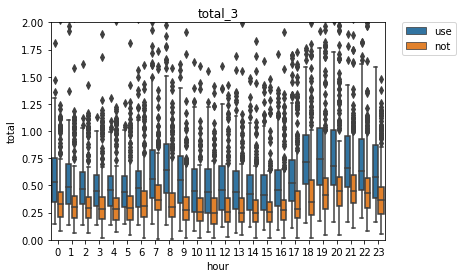

In [218]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_3')
plt.show()

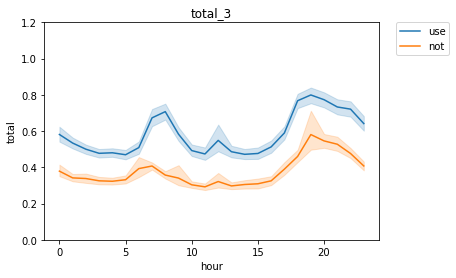

In [219]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_3')
plt.show()

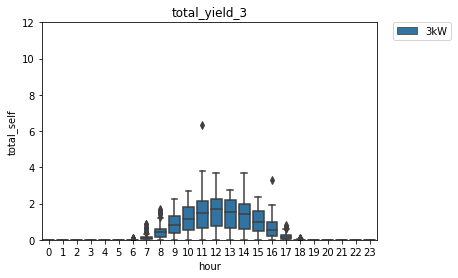

In [220]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_3')
plt.show()

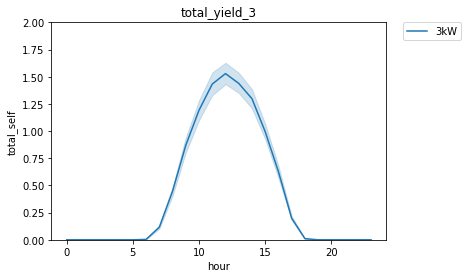

In [221]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_3')
plt.show()

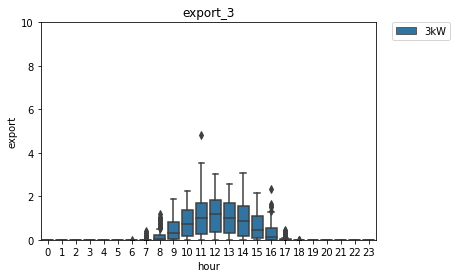

In [222]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_3')
plt.show()

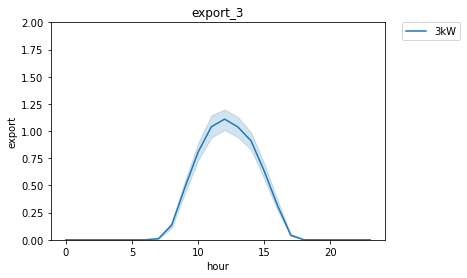

In [223]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_3')
plt.show()

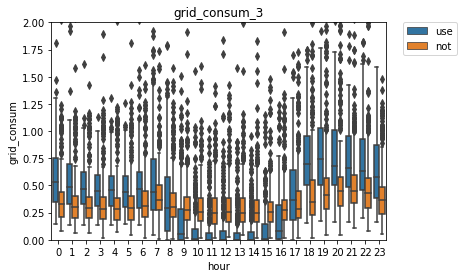

In [224]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_3')
plt.show()

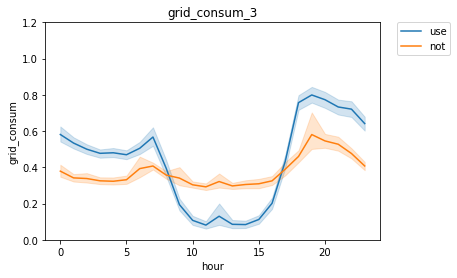

In [225]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_3, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_3')
plt.show()

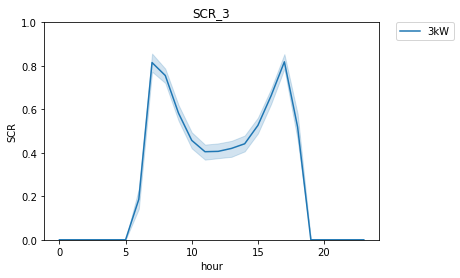

In [226]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_3')
plt.show()

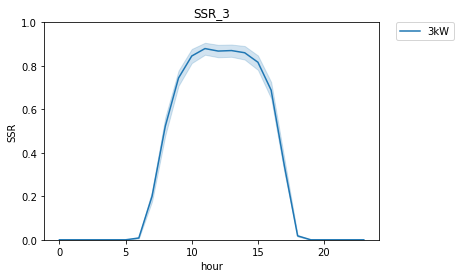

In [227]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_3, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_3')
plt.show()

<hr>

### 2022.04

In [228]:
df_all_hour_22_4 = df_all_hour[df_all_hour.ym == '2022/4']

In [229]:
# 총 전력 소비량
df_all_hour_22_4.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   486.0  0.328102  0.215158  0.040039  0.189941  0.279785  0.399902   
     1   492.0  0.354345  0.550788  0.049927  0.189941  0.260010  0.369629   
     2   492.0  0.303512  0.206978  0.050049  0.180176  0.260010  0.359863   
     3   488.0  0.295957  0.214842  0.030029  0.179932  0.250000  0.349670   
     4   492.0  0.298408  0.229734  0.039917  0.179932  0.250000  0.342529   
     5   491.0  0.307269  0.297143  0.040039  0.175049  0.250000  0.350098   
     6   489.0  0.345353  0.207400  0.020020  0.219971  0.290039  0.410156   
     7   488.0  0.388524  0.283686  0.029907  0.240173  0.340088  0.459961   
     8   492.0  0.338577  0.364880  0.039917  0.180176  0.280029  0.380127   
     9   491.0  0.315992  0.652136  0.020020  0.160156  0.250000  0.349854   
     10  487.0  0.298667  0.555172  0.039795  0.159912  0.239990  0.330078   
     11  492.0  0.282955  0.362856  0.029907  0.140137  0.225098  0.319824   
     12  490.0  0.268272  0.189406  0.049927  0.140137  0.229980  0.320068   
     13  491.0  0.268798  0.212438  0.050049  0.149902  0.229980  0.309692   
     14  493.0  0.262755  0.184696  0.049805  0.159912  0.229980  0.300049   
     15  493.0  0.278808  0.322126  0.049927  0.160156  0.229980  0.310059   
     16  485.0  0.285108  0.221603  0.040039  0.170166  0.240234  0.330078   
     17  490.0  0.329302  0.376195  0.029907  0.179932  0.250000  0.340088   
     18  488.0  0.372799  0.328427  0.040039  0.199951  0.300049  0.419983   
     19  485.0  0.430862  0.358840  0.050049  0.239990  0.340088  0.500000   
     20  489.0  0.488374  0.483556  0.059937  0.280029  0.379883  0.520020   
     21  480.0  0.472336  0.486414  0.050049  0.290039  0.380127  0.510010   
     22  485.0  0.410165  0.241983  0.049927  0.259766  0.359863  0.510010   
     23  485.0  0.360083  0.248676  0.030029  0.209961  0.300049  0.449707   
use  0   266.0  0.532659  0.306382  0.159912  0.330078  0.500000  0.694824   
     1   268.0  0.491068  0.214658  0.159912  0.320068  0.465210  0.642212   
     2   268.0  0.472049  0.214098  0.150146  0.309814  0.430176  0.614868   
     3   269.0  0.472673  0.237894  0.100098  0.299805  0.429932  0.610352   
     4   269.0  0.463418  0.203082  0.139893  0.310059  0.430176  0.589844   
     5   266.0  0.464936  0.223106  0.150024  0.290039  0.435059  0.590027   
     6   267.0  0.532873  0.343221  0.140015  0.310181  0.450195  0.630371   
     7   268.0  0.655571  0.398292  0.109863  0.340088  0.545044  0.862488   
     8   266.0  0.623727  0.341808  0.100098  0.379761  0.580139  0.799744   
     9   266.0  0.526397  0.290010  0.099854  0.282654  0.494629  0.717239   
     10  266.0  0.454690  0.258675  0.070312  0.250244  0.400146  0.617386   
     11  264.0  0.475364  0.332805  0.050537  0.249756  0.410034  0.602539   
     12  266.0  0.493148  0.318164  0.080078  0.250061  0.390259  0.687164   
     13  266.0  0.488229  0.354061  0.089844  0.260010  0.419922  0.610306   
     14  265.0  0.455640  0.276263  0.079834  0.260010  0.400146  0.570068   
     15  266.0  0.453194  0.305273  0.099609  0.250244  0.409790  0.550049   
     16  265.0  0.474311  0.304551  0.110107  0.249756  0.419922  0.619751   
     17  267.0  0.526589  0.335631  0.109863  0.260010  0.469971  0.685059   
     18  267.0  0.646436  0.379638  0.169922  0.359985  0.590088  0.830078   
     19  268.0  0.767211  0.380127  0.169922  0.459961  0.714966  0.992676   
     20  266.0  0.738758  0.391437  0.179932  0.452637  0.674927  0.947266   
     21  267.0  0.667790  0.283929  0.209961  0.449951  0.629883  0.879883   
     22  265.0  0.635938  0.289819  0.150146  0.410156  0.589844  0.810059   
     23  266.0  0.581393  0.273001  0.159912  0.379883  0.544922  0.760132   

               max  
type 시간             
not  0    2.229492  
     1    6.220703  
     2    2.060547  
   

In [230]:
# 총 전력 생산량
pd.set_option('display.max_rows', 500)
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000039  0.000629  0.000000  0.000000  0.000000   
         6   267.0  0.050373  0.060348  0.000000  0.010010  0.030273   
         7   268.0  0.297735  0.232272  0.000000  0.150146  0.255005   
         8   266.0  0.747299  0.435304  0.000000  0.480042  0.639771   
         9   266.0  1.197689  0.592765  0.000000  0.810059  1.165039   
         10  266.0  1.578812  0.668184  0.040039  1.070068  1.669678   
         11  264.0  1.774683  0.706570  0.049805  1.227539  1.939941   
         12  266.0  1.820794  0.755570  0.020020  1.232483  2.059937   
         13  266.0  1.780152  0.797036  0.040039  1.182617  2.050049   
         14  265.0  1.537762  0.658106  0.040039  1.020020  1.820068   
         15  266.0  1.277670  0.758051  0.029785  0.822510  1.339966   
         16  265.0  0.834060  0.409841  0.000000  0.549805  0.839844   
         17  267.0  0.361147  0.210689  0.000000  0.200195  0.349854   
         18  267.0  0.053012  0.048810  0.000000  0.020020  0.050049   
         19  268.0  0.000486  0.004760  0.000000  0.000000  0.000000   
         20  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.010254  
         6   0.060059  0.390137  
         7   0.389648  1.180176  
         8   1.010254  1.909668  
         9   1.640137  2.929688  
         10  2.080078  2.689941  
         11  2.322754  3.430176  
         12  2.419922  3.939941  
         13  2.329956  7.680176  
         14  2.049805  2.579590  
         15  1.660156  9.335205  
         16  1.149902  2.979980  
         17  0.500000  2.000000  
         18  0.080078  0.599854  
         19  0.000000  0.060059  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

In [231]:
# 총 전력 수출량
df_all_hour_22_4_use = df_all_hour_22_4[df_all_hour_22_4.type == 'use']
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   269.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   267.0  0.002848  0.010982  0.0  0.000000  0.000000  0.000000   
         7   268.0  0.068470  0.140923  0.0  0.000000  0.000000  0.070068   
         8   266.0  0.345407  0.377080  0.0  0.020020  0.220093  0.502380   
         9   266.0  0.763349  0.572500  0.0  0.272339  0.755005  1.210144   
         10  266.0  1.167133  0.676146  0.0  0.560059  1.285034  1.757507   
         11  264.0  1.345686  0.708095  0.0  0.784943  1.510010  1.952454   
         12  266.0  1.374980  0.765014  0.0  0.692490  1.570068  2.027344   
         13  266.0  1.347667  0.782351  0.0  0.692627  1.515015  1.920105   
         14  265.0  1.132914  0.661545  0.0  0.549988  1.270020  1.670166   
         15  266.0  0.882145  0.667350  0.0  0.325073  0.905090  1.299896   
         16  265.0  0.472523  0.414409  0.0  0.120117  0.409912  0.719971   
         17  267.0  0.118290  0.153193  0.0  0.000000  0.040039  0.214966   
         18  267.0  0.001574  0.006476  0.0  0.000000  0.000000  0.000000   
         19  268.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.100098  
         7   0.859863  
         8   1.550049  
         9   2.030029  
         10  2.330078  
         11  2.399902  
         12  3.570068  
         13  6.439941  
         14  2.350098  
         15  6.420044  
         16  2.760010  
         17  0.819946  
         18  0.070068  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [232]:
# 총 그리드 소비량
df_all_hour_22_4.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                      
not  0   486.0  0.328102  0.215158  0.040039  0.189941  0.279785  0.399902   
     1   492.0  0.354345  0.550788  0.049927  0.189941  0.260010  0.369629   
     2   492.0  0.303512  0.206978  0.050049  0.180176  0.260010  0.359863   
     3   488.0  0.295957  0.214842  0.030029  0.179932  0.250000  0.349670   
     4   492.0  0.298408  0.229734  0.039917  0.179932  0.250000  0.342529   
     5   491.0  0.307269  0.297143  0.040039  0.175049  0.250000  0.350098   
     6   489.0  0.345353  0.207400  0.020020  0.219971  0.290039  0.410156   
     7   488.0  0.388524  0.283686  0.029907  0.240173  0.340088  0.459961   
     8   492.0  0.338577  0.364880  0.039917  0.180176  0.280029  0.380127   
     9   491.0  0.315992  0.652136  0.020020  0.160156  0.250000  0.349854   
     10  487.0  0.298667  0.555172  0.039795  0.159912  0.239990  0.330078   
     11  492.0  0.282955  0.362856  0.029907  0.140137  0.225098  0.319824   
     12  490.0  0.268272  0.189406  0.049927  0.140137  0.229980  0.320068   
     13  491.0  0.268798  0.212438  0.050049  0.149902  0.229980  0.309692   
     14  493.0  0.262755  0.184696  0.049805  0.159912  0.229980  0.300049   
     15  493.0  0.278808  0.322126  0.049927  0.160156  0.229980  0.310059   
     16  485.0  0.285108  0.221603  0.040039  0.170166  0.240234  0.330078   
     17  490.0  0.329302  0.376195  0.029907  0.179932  0.250000  0.340088   
     18  488.0  0.372799  0.328427  0.040039  0.199951  0.300049  0.419983   
     19  485.0  0.430862  0.358840  0.050049  0.239990  0.340088  0.500000   
     20  489.0  0.488374  0.483556  0.059937  0.280029  0.379883  0.520020   
     21  480.0  0.472336  0.486414  0.050049  0.290039  0.380127  0.510010   
     22  485.0  0.410165  0.241983  0.049927  0.259766  0.359863  0.510010   
     23  485.0  0.360083  0.248676  0.030029  0.209961  0.300049  0.449707   
use  0   266.0  0.532659  0.306382  0.159912  0.330078  0.500000  0.694824   
     1   268.0  0.491068  0.214658  0.159912  0.320068  0.465210  0.642212   
     2   268.0  0.472049  0.214098  0.150146  0.309814  0.430176  0.614868   
     3   269.0  0.472673  0.237894  0.100098  0.299805  0.429932  0.610352   
     4   269.0  0.463418  0.203082  0.139893  0.310059  0.430176  0.589844   
     5   266.0  0.464898  0.223101  0.150024  0.290039  0.435059  0.590027   
     6   267.0  0.485349  0.351522  0.079834  0.260010  0.399902  0.605103   
     7   268.0  0.426306  0.414877  0.000000  0.119965  0.274902  0.679810   
     8   266.0  0.221835  0.325851  0.000000  0.010010  0.099854  0.310059   
     9   266.0  0.092058  0.187754  0.000000  0.000000  0.010010  0.097168   
     10  266.0  0.043011  0.115945  0.000000  0.000000  0.000000  0.010254   
     11  264.0  0.046366  0.133144  0.000000  0.000000  0.000000  0.020020   
     12  266.0  0.047334  0.121045  0.000000  0.000000  0.000000  0.030029   
     13  266.0  0.055743  0.175227  0.000000  0.000000  0.000000  0.010010   
     14  265.0  0.050792  0.132343  0.000000  0.000000  0.000000  0.020020   
     15  266.0  0.057669  0.132230  0.000000  0.000000  0.000000  0.029785   
     16  265.0  0.112774  0.212630  0.000000  0.000000  0.020020  0.129883   
     17  267.0  0.283732  0.321163  0.000000  0.030029  0.190186  0.410156   
     18  267.0  0.594997  0.389427  0.069824  0.314941  0.529785  0.800049   
     19  268.0  0.766726  0.379728  0.169922  0.459961  0.714966  0.992676   
     20  266.0  0.738758  0.391437  0.179932  0.452637  0.674927  0.947266   
     21  267.0  0.667790  0.283929  0.209961  0.449951  0.629883  0.879883   
     22  265.0  0.635938  0.289819  0.150146  0.410156  0.589844  0.810059   
     23  266.0  0.581393  0.273001  0.159912  0.379883  0.544922  0.760132   

               max  
type 시간             
not  0    2.229492  
     1    6.220703  
     2    2.060547  
   

In [233]:
# SCR(자가소비율)
pd.set_option('display.max_rows', 500)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.003759  0.061314  0.000000  0.000000  0.000000   
         6   267.0  0.762160  0.410178  0.000000  0.804213  1.000000   
         7   268.0  0.843274  0.224022  0.000000  0.733427  0.965488   
         8   266.0  0.647784  0.287194  0.000000  0.385237  0.653955   
         9   266.0  0.466234  0.292311  0.000000  0.208002  0.386860   
         10  266.0  0.346738  0.263478  0.033164  0.139966  0.246518   
         11  264.0  0.312885  0.245530  0.021231  0.121359  0.229086   
         12  266.0  0.327308  0.260550  0.040649  0.127141  0.234902   
         13  266.0  0.320398  0.253585  0.037751  0.129502  0.238226   
         14  265.0  0.350106  0.263412  0.040942  0.150510  0.267538   
         15  266.0  0.403363  0.270520  0.062271  0.162099  0.333370   
         16  265.0  0.535132  0.289199  0.000000  0.269767  0.518198   
         17  267.0  0.762870  0.260199  0.000000  0.553463  0.869427   
         18  267.0  0.881385  0.305894  0.000000  1.000000  1.000000   
         19  268.0  0.011194  0.105405  0.000000  0.000000  0.000000   
         20  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.942658  1.0  
         9   0.696228  1.0  
         10  0.484944  1.0  
         11  0.421217  1.0  
         12  0.467177  1.0  
         13  0.438114  1.0  
         14  0.485264  1.0  
         15  0.586047  1.0  
         16  0.767057  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [234]:
# SSR(자가공급률)
df_all_hour_22_4_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   268.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   269.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   266.0  0.000077  0.001256  0.000000  0.000000  0.000000   
         6   267.0  0.116044  0.132070  0.000000  0.015291  0.082768   
         7   268.0  0.464570  0.304930  0.000000  0.187223  0.448744   
         8   266.0  0.729407  0.283593  0.000000  0.561472  0.837724   
         9   266.0  0.873902  0.220569  0.000000  0.836266  0.983711   
         10  266.0  0.933032  0.166812  0.079779  0.972270  1.000000   
         11  264.0  0.937116  0.156436  0.160156  0.971050  1.000000   
         12  266.0  0.929794  0.164147  0.083418  0.947408  1.000000   
         13  266.0  0.930006  0.167685  0.117732  0.973691  1.000000   
         14  265.0  0.924687  0.175922  0.053595  0.963604  1.000000   
         15  266.0  0.912601  0.184748  0.043806  0.943500  1.000000   
         16  265.0  0.841332  0.231523  0.000000  0.740536  0.957380   
         17  267.0  0.580175  0.291202  0.000000  0.340083  0.552632   
         18  267.0  0.120284  0.121827  0.000000  0.029326  0.083774   
         19  268.0  0.000458  0.004727  0.000000  0.000000  0.000000   
         20  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  267.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  265.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  266.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.020488  
         6   0.159427  0.743429  
         7   0.704671  1.000000  
         8   0.968599  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.870216  1.000000  
         18  0.167014  0.607864  
         19  0.000000  0.066730  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

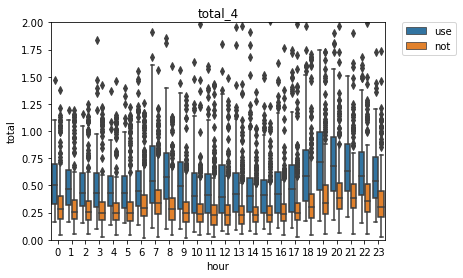

In [235]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_4')
plt.show()

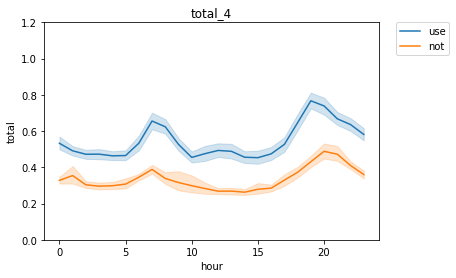

In [236]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_4')
plt.show()

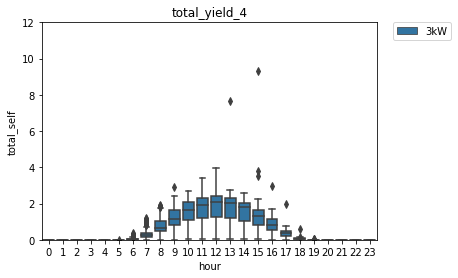

In [237]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_4')
plt.show()

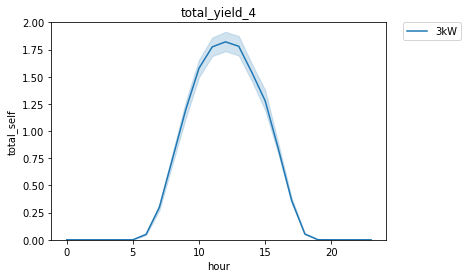

In [238]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_4')
plt.show()

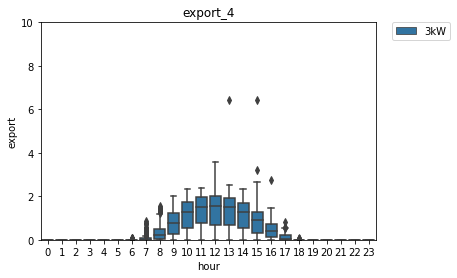

In [239]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_4')
plt.show()

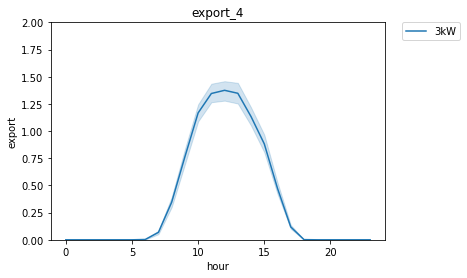

In [240]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_4')
plt.show()

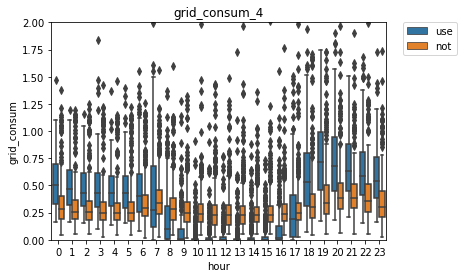

In [241]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_4')
plt.show()

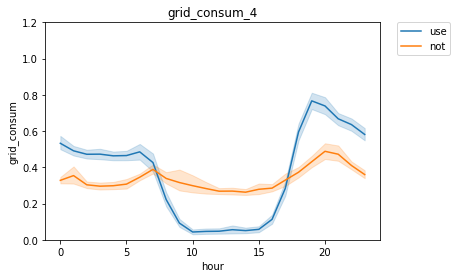

In [242]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_22_4, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_4')
plt.show()

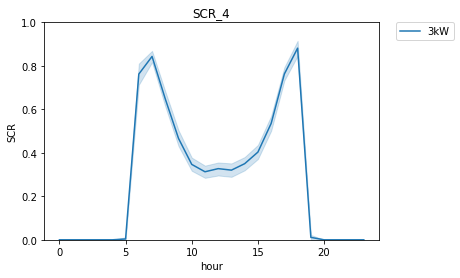

In [243]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_4')
plt.show()

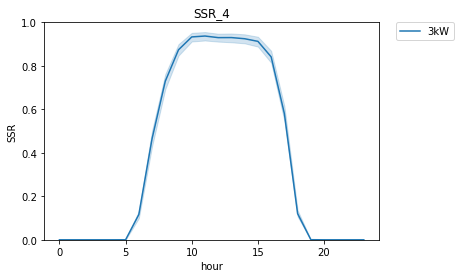

In [244]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_22_4, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_4')
plt.show()

<hr>

## **<계절>**

### 봄(Spring)

In [245]:
df_all_hour_spring = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [246]:
# 총 전력 소비량
pd.set_option('display.max_rows', 500)
df_all_hour_spring.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1503.0  0.350210  0.276857  0.040039  0.200012  0.300049  0.419952   
     1   1508.0  0.337503  0.378115  0.049927  0.190002  0.280029  0.379883   
     2   1509.0  0.313194  0.241680  0.050003  0.189941  0.269989  0.369995   
     3   1512.0  0.302024  0.210244  0.020020  0.179993  0.259766  0.359863   
     4   1520.0  0.301202  0.217620  0.039917  0.179932  0.250000  0.350098   
     5   1511.0  0.315187  0.364981  0.040009  0.179932  0.260010  0.369873   
     6   1514.0  0.354348  0.446386  0.020020  0.209961  0.290039  0.410156   
     7   1513.0  0.398955  0.281876  0.010010  0.259979  0.349976  0.470001   
     8   1524.0  0.346975  0.279728  0.010010  0.200012  0.290039  0.410156   
     9   1516.0  0.325727  0.553378  0.020020  0.179871  0.269653  0.369873   
     10  1519.0  0.311809  0.451241  0.020020  0.169922  0.250000  0.350098   
     11  1511.0  0.295305  0.281778  0.020020  0.150146  0.239990  0.359863   
     12  1513.0  0.314622  0.431726  0.020004  0.160004  0.250000  0.359863   
     13  1513.0  0.289012  0.249164  0.039917  0.160004  0.239990  0.340027   
     14  1515.0  0.288772  0.244951  0.020020  0.160004  0.240021  0.339844   
     15  1512.0  0.301355  0.319185  0.019897  0.169922  0.250000  0.339844   
     16  1498.0  0.314521  0.428743  0.020020  0.179993  0.260010  0.350098   
     17  1501.0  0.359261  0.360373  0.020020  0.190002  0.270020  0.399902   
     18  1499.0  0.413144  0.367371  0.020020  0.210022  0.319824  0.479980   
     19  1501.0  0.485509  0.780036  0.039993  0.259979  0.369873  0.540039   
     20  1502.0  0.503520  0.421611  0.040039  0.290039  0.409912  0.560059   
     21  1499.0  0.510501  0.572974  0.049988  0.309998  0.410156  0.560059   
     22  1508.0  0.440280  0.263483  0.049927  0.279999  0.390137  0.530029   
     23  1508.0  0.388733  0.314743  0.030029  0.219971  0.330078  0.469971   
use  0    818.0  0.543448  0.313452  0.149902  0.320068  0.500000  0.717316   
     1    813.0  0.502581  0.297225  0.140015  0.309998  0.469971  0.659973   
     2    817.0  0.473366  0.225286  0.130005  0.300049  0.439941  0.609985   
     3    819.0  0.464300  0.235847  0.100098  0.289986  0.419983  0.589966   
     4    812.0  0.454364  0.210915  0.130005  0.289886  0.420044  0.580078   
     5    817.0  0.460290  0.223125  0.129944  0.289978  0.419922  0.580017   
     6    813.0  0.509246  0.306294  0.119995  0.290039  0.449951  0.630005   
     7    812.0  0.641647  0.400167  0.109863  0.340088  0.539764  0.830032   
     8    811.0  0.655839  0.461601  0.100037  0.380096  0.599854  0.819901   
     9    811.0  0.539803  0.317931  0.080078  0.299561  0.489990  0.727295   
     10   811.0  0.464409  0.269216  0.070312  0.249756  0.410004  0.620041   
     11   808.0  0.463108  0.295262  0.050537  0.240044  0.400040  0.609985   
     12   813.0  0.504069  0.435843  0.079956  0.250244  0.409912  0.660400   
     13   812.0  0.475964  0.296894  0.060059  0.260010  0.419922  0.619766   
     14   812.0  0.455618  0.258679  0.026428  0.259995  0.409988  0.580078   
     15   810.0  0.465037  0.383303  0.089844  0.250107  0.400146  0.569824   
     16   813.0  0.498080  0.420760  0.090088  0.270020  0.429932  0.620361   
     17   817.0  0.541876  0.320387  0.109863  0.300293  0.480042  0.689941   
     18   817.0  0.673698  0.356740  0.150146  0.400146  0.619995  0.869873   
     19   818.0  0.746297  0.378474  0.130005  0.449959  0.669952  0.979980   
     20   812.0  0.731549  0.370902  0.159912  0.449951  0.640076  0.959961   
     21   815.0  0.692374  0.321633  0.149994  0.450012  0.630005  0.924866   
     22   811.0  0.662860  0.321009  0.150146  0.419952  0.600006  0.859863   
     23   814.0  0.601362  0.300630  0.140015  0.359985  0.549896  0.809982   

               max  
type 시간             
not  0    6.80004

In [247]:
# 총 전력 생산량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   818.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   813.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   817.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   819.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   817.0  0.001421  0.005101  0.000000  0.000000  0.000000   
         6   813.0  0.050078  0.079854  0.000000  0.000000  0.020020   
         7   812.0  0.248437  0.242905  0.000000  0.070068  0.180084   
         8   811.0  0.631223  0.451106  0.000000  0.284912  0.570007   
         9   811.0  1.026243  0.623817  0.000000  0.489868  1.020020   
         10  811.0  1.365551  0.751704  0.000000  0.729980  1.470215   
         11  808.0  1.552727  0.816838  0.000000  0.869812  1.739990   
         12  813.0  1.618856  0.818945  0.010010  0.919983  1.867981   
         13  812.0  1.550744  0.819584  0.009766  0.899902  1.789764   
         14  812.0  1.385692  0.737463  0.000000  0.739929  1.590088   
         15  810.0  1.123829  0.732680  0.000000  0.580032  1.205078   
         16  813.0  0.756148  0.671987  0.000000  0.380005  0.685059   
         17  817.0  0.303754  0.213446  0.000000  0.140137  0.259766   
         18  817.0  0.050014  0.070449  0.000000  0.009766  0.030029   
         19  818.0  0.001377  0.009067  0.000000  0.000000  0.000000   
         20  812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  815.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  811.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  814.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.050903  
         6   0.070007   0.750000  
         7   0.349701   1.449951  
         8   0.919922   2.059998  
         9   1.549988   3.239990  
         10  2.004883   4.100037  
         11  2.229980   6.339844  
         12  2.310059   4.200012  
         13  2.240234   7.680176  
         14  1.990005   4.799988  
         15  1.619873   9.350037  
         16  1.100098  11.000000  
         17  0.469727   2.000000  
         18  0.079956   1.336487  
         19  0.000000   0.226501  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [248]:
# 총 전력 수출량
df_all_hour_spring_use = df_all_hour_spring[df_all_hour_spring.type == 'use']
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   818.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   813.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   817.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   819.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   817.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   813.0  0.005167  0.025006  0.0  0.000000  0.000000  0.000000   
         7   812.0  0.060641  0.142187  0.0  0.000000  0.000000  0.050049   
         8   811.0  0.271172  0.348928  0.0  0.000000  0.110107  0.434937   
         9   811.0  0.629294  0.567308  0.0  0.090027  0.520020  1.079926   
         10  811.0  0.980890  0.718934  0.0  0.270020  0.989990  1.589905   
         11  808.0  1.159456  0.790523  0.0  0.387520  1.250000  1.840088   
         12  813.0  1.204755  0.806152  0.0  0.429932  1.359863  1.889954   
         13  812.0  1.147387  0.788847  0.0  0.417450  1.274994  1.812546   
         14  812.0  1.000402  0.710664  0.0  0.300011  1.080032  1.600006   
         15  810.0  0.750188  0.652022  0.0  0.170044  0.719971  1.217468   
         16  813.0  0.414530  0.516663  0.0  0.040039  0.280029  0.669983   
         17  817.0  0.090954  0.142557  0.0  0.000000  0.010010  0.119995   
         18  817.0  0.002052  0.008233  0.0  0.000000  0.000000  0.000000   
         19  818.0  0.000007  0.000208  0.0  0.000000  0.000000  0.000000   
         20  812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  815.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  811.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  814.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.349976  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  4.829834  
         12  3.770020  
         13  6.439941  
         14  4.059998  
         15  6.670013  
         16  6.940002  
         17  0.819946  
         18  0.099976  
         19  0.005951  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [249]:
# 총 그리드 소비량
df_all_hour_spring.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1503.0  0.350210  0.276857  0.040039  0.200012  0.300049  0.419952   
     1   1508.0  0.337503  0.378115  0.049927  0.190002  0.280029  0.379883   
     2   1509.0  0.313194  0.241680  0.050003  0.189941  0.269989  0.369995   
     3   1512.0  0.302024  0.210244  0.020020  0.179993  0.259766  0.359863   
     4   1520.0  0.301202  0.217620  0.039917  0.179932  0.250000  0.350098   
     5   1511.0  0.315187  0.364981  0.040009  0.179932  0.260010  0.369873   
     6   1514.0  0.354348  0.446386  0.020020  0.209961  0.290039  0.410156   
     7   1513.0  0.398955  0.281876  0.010010  0.259979  0.349976  0.470001   
     8   1524.0  0.346975  0.279728  0.010010  0.200012  0.290039  0.410156   
     9   1516.0  0.325727  0.553378  0.020020  0.179871  0.269653  0.369873   
     10  1519.0  0.311809  0.451241  0.020020  0.169922  0.250000  0.350098   
     11  1511.0  0.295305  0.281778  0.020020  0.150146  0.239990  0.359863   
     12  1513.0  0.314622  0.431726  0.020004  0.160004  0.250000  0.359863   
     13  1513.0  0.289012  0.249164  0.039917  0.160004  0.239990  0.340027   
     14  1515.0  0.288772  0.244951  0.020020  0.160004  0.240021  0.339844   
     15  1512.0  0.301355  0.319185  0.019897  0.169922  0.250000  0.339844   
     16  1498.0  0.314521  0.428743  0.020020  0.179993  0.260010  0.350098   
     17  1501.0  0.359261  0.360373  0.020020  0.190002  0.270020  0.399902   
     18  1499.0  0.413144  0.367371  0.020020  0.210022  0.319824  0.479980   
     19  1501.0  0.485509  0.780036  0.039993  0.259979  0.369873  0.540039   
     20  1502.0  0.503520  0.421611  0.040039  0.290039  0.409912  0.560059   
     21  1499.0  0.510501  0.572974  0.049988  0.309998  0.410156  0.560059   
     22  1508.0  0.440280  0.263483  0.049927  0.279999  0.390137  0.530029   
     23  1508.0  0.388733  0.314743  0.030029  0.219971  0.330078  0.469971   
use  0    818.0  0.543448  0.313452  0.149902  0.320068  0.500000  0.717316   
     1    813.0  0.502581  0.297225  0.140015  0.309998  0.469971  0.659973   
     2    817.0  0.473366  0.225286  0.130005  0.300049  0.439941  0.609985   
     3    819.0  0.464300  0.235847  0.100098  0.289986  0.419983  0.589966   
     4    812.0  0.454364  0.210915  0.130005  0.289886  0.420044  0.580078   
     5    817.0  0.458869  0.223349  0.129944  0.280029  0.419922  0.580017   
     6    813.0  0.464335  0.318482  0.010010  0.239990  0.409912  0.600098   
     7    812.0  0.453850  0.421058  0.000000  0.150017  0.329834  0.649925   
     8    811.0  0.295788  0.446952  0.000000  0.020020  0.160004  0.444977   
     9    811.0  0.142854  0.253568  0.000000  0.000000  0.020020  0.179932   
     10   811.0  0.079749  0.184457  0.000000  0.000000  0.000000  0.050018   
     11   808.0  0.069837  0.174057  0.000000  0.000000  0.000000  0.040039   
     12   813.0  0.089968  0.326560  0.000000  0.000000  0.000000  0.060059   
     13   812.0  0.072607  0.176145  0.000000  0.000000  0.000000  0.049850   
     14   812.0  0.070329  0.154495  0.000000  0.000000  0.000000  0.050003   
     15   810.0  0.091396  0.238579  0.000000  0.000000  0.000000  0.080078   
     16   813.0  0.156462  0.273369  0.000000  0.000000  0.040009  0.219971   
     17   817.0  0.329076  0.324591  0.000000  0.079834  0.240234  0.479980   
     18   817.0  0.625737  0.373025  0.039978  0.340088  0.579956  0.829956   
     19   818.0  0.744927  0.379082  0.130005  0.449951  0.669922  0.979980   
     20   812.0  0.731549  0.370902  0.159912  0.449951  0.640076  0.959961   
     21   815.0  0.692374  0.321633  0.149994  0.450012  0.630005  0.924866   
     22   811.0  0.662860  0.321009  0.150146  0.419952  0.600006  0.859863   
     23   814.0  0.601362  0.300630  0.140015  0.359985  0.549896  0.809982   

               max  
type 시간             
not  0    6.80004

In [250]:
# SCR(자가소비율)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   818.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   813.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   817.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   819.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   817.0  0.097919  0.297387  0.000000  0.000000  0.000000   
         6   813.0  0.592473  0.474101  0.000000  0.000000  0.941113   
         7   812.0  0.820629  0.284241  0.000000  0.726440  1.000000   
         8   811.0  0.689491  0.290499  0.000000  0.466904  0.750095   
         9   811.0  0.523557  0.312823  0.000000  0.234705  0.467071   
         10  811.0  0.410078  0.301314  0.000000  0.153586  0.314266   
         11  808.0  0.370750  0.290834  0.000000  0.130825  0.273298   
         12  813.0  0.374590  0.292949  0.038257  0.136035  0.269206   
         13  812.0  0.381428  0.289602  0.030180  0.142696  0.287639   
         14  812.0  0.400777  0.292698  0.000000  0.165575  0.298773   
         15  810.0  0.464376  0.299434  0.000000  0.195915  0.393220   
         16  813.0  0.591058  0.302444  0.000000  0.321615  0.594853   
         17  817.0  0.788462  0.270148  0.000000  0.614662  0.916836   
         18  817.0  0.755865  0.415585  0.000000  0.799756  1.000000   
         19  818.0  0.079958  0.270850  0.000000  0.000000  0.000000   
         20  812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  815.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  811.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  814.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   1.000000  1.0  
         7   1.000000  1.0  
         8   0.980744  1.0  
         9   0.833554  1.0  
         10  0.603518  1.0  
         11  0.547426  1.0  
         12  0.547193  1.0  
         13  0.534185  1.0  
         14  0.585828  1.0  
         15  0.701739  1.0  
         16  0.883655  1.0  
         17  1.000000  1.0  
         18  1.000000  1.0  
         19  0.000000  1.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [251]:
# SSR(자가공급률)
df_all_hour_spring_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   818.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   813.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   817.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   819.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   817.0  0.003847  0.014117  0.000000  0.000000  0.000000   
         6   813.0  0.122567  0.182348  0.000000  0.000000  0.044444   
         7   812.0  0.384530  0.309148  0.000000  0.115809  0.308596   
         8   811.0  0.639819  0.321559  0.000000  0.375257  0.717017   
         9   811.0  0.804295  0.280656  0.000000  0.702923  0.956476   
         10  811.0  0.880970  0.233925  0.000000  0.889639  1.000000   
         11  808.0  0.898533  0.212933  0.000000  0.912551  1.000000   
         12  813.0  0.890345  0.213882  0.008861  0.881464  1.000000   
         13  812.0  0.892063  0.214232  0.011778  0.909066  1.000000   
         14  812.0  0.885246  0.222413  0.000000  0.874126  1.000000   
         15  810.0  0.861193  0.237925  0.000000  0.807250  1.000000   
         16  813.0  0.770790  0.288174  0.000000  0.631659  0.910485   
         17  817.0  0.498080  0.309401  0.000000  0.229538  0.478680   
         18  817.0  0.112441  0.155417  0.000000  0.009359  0.047305   
         19  818.0  0.002867  0.016702  0.000000  0.000000  0.000000   
         20  812.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  815.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  811.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  814.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.123886  
         6   0.172559  0.975588  
         7   0.637720  1.000000  
         8   0.941197  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  1.000000  1.000000  
         17  0.783770  1.000000  
         18  0.150999  0.917613  
         19  0.000000  0.392906  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

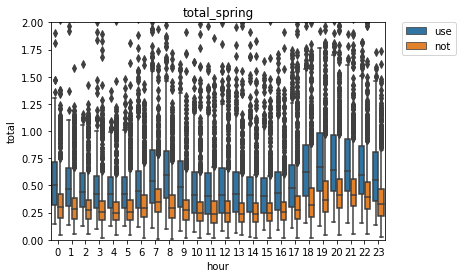

In [252]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

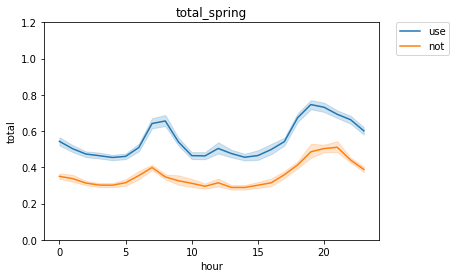

In [253]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_spring')
plt.show()

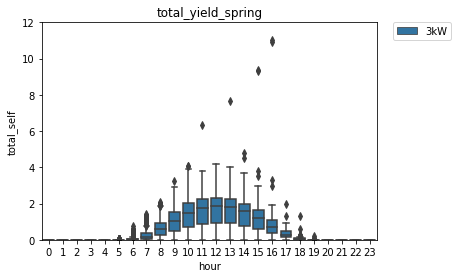

In [254]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

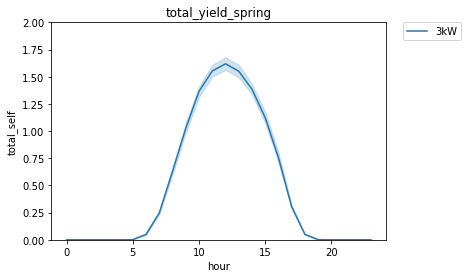

In [255]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_spring')
plt.show()

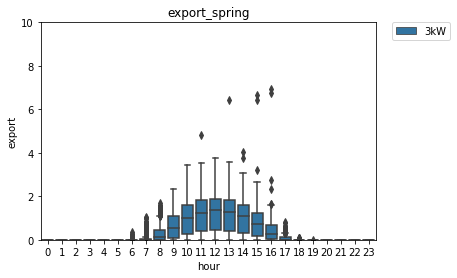

In [256]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

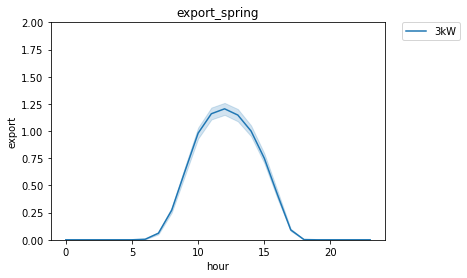

In [257]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_spring')
plt.show()

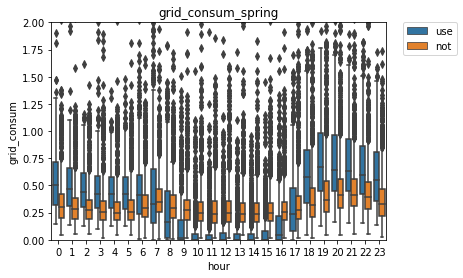

In [258]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

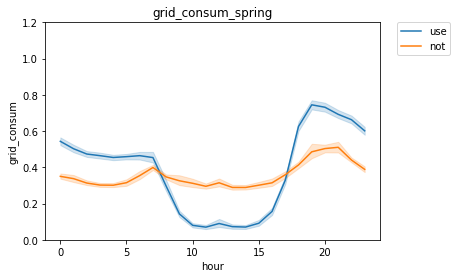

In [259]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_spring, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_spring')
plt.show()

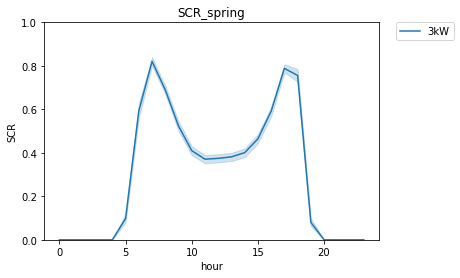

In [260]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_spring')
plt.show()

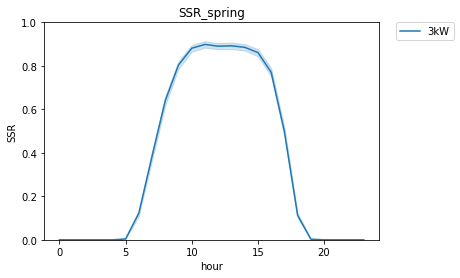

In [261]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_spring, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_spring')
plt.show()

<hr>

### 여름(Summer)

In [262]:
df_all_hour_summer = df_all_hour[(df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') | (df_all_hour.ym == '2021/8')]

In [263]:
# 총 전력 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1551.0  0.436137  0.462807  0.049988  0.220032  0.339966  0.550049   
     1   1559.0  0.386314  0.279552  0.049988  0.200012  0.309937  0.500000   
     2   1553.0  0.347072  0.226169  0.059998  0.190002  0.289917  0.440186   
     3   1552.0  0.326284  0.230813  0.059998  0.179993  0.270020  0.409973   
     4   1557.0  0.304490  0.195845  0.059998  0.169983  0.259949  0.369995   
     5   1542.0  0.300797  0.221379  0.049988  0.169983  0.250000  0.369995   
     6   1539.0  0.349570  0.274540  0.049988  0.190063  0.290039  0.420044   
     7   1537.0  0.430787  0.448600  0.059998  0.250000  0.359985  0.489990   
     8   1542.0  0.388820  0.333348  0.049988  0.210022  0.320068  0.460022   
     9   1543.0  0.371800  0.312081  0.040039  0.200012  0.309998  0.440125   
     10  1541.0  0.371986  0.547047  0.049988  0.200012  0.309998  0.440063   
     11  1551.0  0.397156  0.608184  0.049988  0.179993  0.299988  0.449951   
     12  1538.0  0.395807  0.418532  0.039978  0.179993  0.300049  0.460083   
     13  1546.0  0.415501  0.600920  0.039978  0.179993  0.300049  0.469971   
     14  1545.0  0.419358  0.606087  0.039978  0.190002  0.300049  0.459961   
     15  1541.0  0.409494  0.420008  0.049988  0.200012  0.309998  0.459961   
     16  1541.0  0.445885  0.703194  0.039978  0.200073  0.329956  0.489990   
     17  1542.0  0.472776  0.536444  0.059998  0.210022  0.339966  0.539978   
     18  1537.0  0.535511  0.591967  0.049988  0.220032  0.359985  0.619995   
     19  1547.0  0.568424  0.593621  0.059998  0.250000  0.409973  0.660034   
     20  1542.0  0.634293  0.614585  0.059998  0.319946  0.460083  0.739990   
     21  1551.0  0.623419  0.598691  0.059998  0.339966  0.479980  0.720093   
     22  1553.0  0.546162  0.427432  0.070007  0.290039  0.429993  0.670044   
     23  1543.0  0.469696  0.356369  0.059998  0.245056  0.360046  0.595032   
use  0    811.0  0.553526  0.318753  0.159973  0.315002  0.479980  0.719971   
     1    814.0  0.518026  0.306332  0.139984  0.280029  0.449982  0.677490   
     2    812.0  0.461991  0.227582  0.140015  0.270012  0.419952  0.620117   
     3    812.0  0.447390  0.233197  0.140015  0.250000  0.390015  0.609985   
     4    803.0  0.427350  0.210623  0.139984  0.239990  0.380005  0.589996   
     5    796.0  0.439172  0.227904  0.140015  0.250000  0.390015  0.599976   
     6    798.0  0.482769  0.364261  0.129944  0.260071  0.399994  0.637451   
     7    796.0  0.580547  0.484019  0.169952  0.319946  0.470093  0.731323   
     8    801.0  0.645152  0.532187  0.150024  0.369995  0.539917  0.819946   
     9    799.0  0.585819  0.420333  0.110107  0.329956  0.500061  0.730103   
     10   807.0  0.552568  0.374592  0.129944  0.290100  0.470093  0.680008   
     11   802.0  0.609532  0.554236  0.110046  0.302521  0.509933  0.740036   
     12   800.0  0.670409  0.511389  0.109985  0.320053  0.549957  0.812531   
     13   799.0  0.685428  0.533671  0.119934  0.359955  0.540039  0.799927   
     14   801.0  0.667930  0.545510  0.130005  0.330017  0.510010  0.770081   
     15   802.0  0.683178  0.715978  0.120026  0.329956  0.529846  0.800049   
     16   809.0  0.670056  0.523629  0.119873  0.340088  0.510132  0.800171   
     17   808.0  0.719327  0.494168  0.149872  0.380051  0.570068  0.920166   
     18   806.0  0.822554  0.542047  0.160004  0.419937  0.655029  1.074982   
     19   810.0  0.878182  0.598311  0.129944  0.460022  0.690002  1.119995   
     20   810.0  0.842827  0.511530  0.169983  0.489990  0.709961  1.050049   
     21   813.0  0.801848  0.435220  0.169983  0.489990  0.709961  1.010010   
     22   809.0  0.745937  0.430551  0.179993  0.450012  0.650024  0.939941   
     23   807.0  0.641243  0.387854  0.140015  0.380005  0.559937  0.800049   

               max  
type 시간             
not  0   10.59997

In [264]:
# 총 전력 생산량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   811.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   814.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   803.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   796.0  0.004850  0.016736  0.0  0.000000  0.000000  0.009903   
         6   798.0  0.084834  0.091745  0.0  0.019897  0.059998  0.120087   
         7   796.0  0.306560  0.232033  0.0  0.140015  0.279907  0.429932   
         8   801.0  0.623851  0.405979  0.0  0.320068  0.560059  0.899902   
         9   799.0  0.951079  0.563750  0.0  0.520020  0.899963  1.405029   
         10  807.0  1.187421  0.636385  0.0  0.710022  1.200073  1.709961   
         11  802.0  1.316756  0.671226  0.0  0.809952  1.365051  1.869995   
         12  800.0  1.383372  0.761558  0.0  0.819992  1.434998  1.920044   
         13  799.0  1.344541  0.741846  0.0  0.770020  1.410034  1.880005   
         14  801.0  1.226680  0.795121  0.0  0.679932  1.260010  1.729980   
         15  802.0  1.007244  0.722519  0.0  0.549957  1.029907  1.427460   
         16  809.0  0.694569  0.501469  0.0  0.359985  0.670044  0.989990   
         17  808.0  0.368978  0.405289  0.0  0.189941  0.320068  0.520020   
         18  806.0  0.108728  0.108648  0.0  0.039917  0.099976  0.160034   
         19  810.0  0.009697  0.030585  0.0  0.000000  0.000000  0.010010   
         20  810.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  813.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  809.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  807.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.391602  
         6    0.760010  
         7    1.309937  
         8    1.940063  
         9    3.270020  
         10   3.660034  
         11   4.231323  
         12   8.669922  
         13   9.620117  
         14  11.100037  
         15  11.300049  
         16   8.569946  
         17   9.150024  
         18   1.599243  
         19   0.704712  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [265]:
# 총 전력 수출량
df_all_hour_summer_use = df_all_hour_summer[df_all_hour_summer.type == 'use']
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   811.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   814.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   803.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   796.0  0.000013  0.000355  0.0  0.000000  0.000000  0.000000   
         6   798.0  0.007484  0.028605  0.0  0.000000  0.000000  0.000000   
         7   796.0  0.077229  0.138284  0.0  0.000000  0.010010  0.099976   
         8   801.0  0.261849  0.318525  0.0  0.000000  0.119995  0.419983   
         9   799.0  0.532899  0.502566  0.0  0.069946  0.399963  0.909912   
         10  807.0  0.747366  0.600943  0.0  0.190002  0.660034  1.229980   
         11  802.0  0.833391  0.638417  0.0  0.250000  0.730072  1.369995   
         12  800.0  0.866790  0.703247  0.0  0.260010  0.774963  1.402512   
         13  799.0  0.820720  0.681132  0.0  0.210052  0.760010  1.340027   
         14  801.0  0.726123  0.694577  0.0  0.150024  0.619995  1.220093   
         15  802.0  0.537826  0.582693  0.0  0.059998  0.424988  0.920044   
         16  809.0  0.296549  0.353245  0.0  0.010010  0.169922  0.489990   
         17  808.0  0.088764  0.254807  0.0  0.000000  0.010010  0.110001   
         18  806.0  0.004007  0.019879  0.0  0.000000  0.000000  0.000000   
         19  810.0  0.000210  0.004318  0.0  0.000000  0.000000  0.000000   
         20  810.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  813.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  809.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  807.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.010010  
         6   0.400024  
         7   0.890015  
         8   1.589966  
         9   2.109985  
         10  3.140015  
         11  2.300049  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  8.160034  
         16  3.589966  
         17  6.169922  
         18  0.429932  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [266]:
# 총 그리드 소비량
df_all_hour_summer.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1551.0  0.436137  0.462807  0.049988  0.220032  0.339966  0.550049   
     1   1559.0  0.386314  0.279552  0.049988  0.200012  0.309937  0.500000   
     2   1553.0  0.347072  0.226169  0.059998  0.190002  0.289917  0.440186   
     3   1552.0  0.326284  0.230813  0.059998  0.179993  0.270020  0.409973   
     4   1557.0  0.304490  0.195845  0.059998  0.169983  0.259949  0.369995   
     5   1542.0  0.300797  0.221379  0.049988  0.169983  0.250000  0.369995   
     6   1539.0  0.349570  0.274540  0.049988  0.190063  0.290039  0.420044   
     7   1537.0  0.430787  0.448600  0.059998  0.250000  0.359985  0.489990   
     8   1542.0  0.388820  0.333348  0.049988  0.210022  0.320068  0.460022   
     9   1543.0  0.371800  0.312081  0.040039  0.200012  0.309998  0.440125   
     10  1541.0  0.371986  0.547047  0.049988  0.200012  0.309998  0.440063   
     11  1551.0  0.397156  0.608184  0.049988  0.179993  0.299988  0.449951   
     12  1538.0  0.395807  0.418532  0.039978  0.179993  0.300049  0.460083   
     13  1546.0  0.415501  0.600920  0.039978  0.179993  0.300049  0.469971   
     14  1545.0  0.419358  0.606087  0.039978  0.190002  0.300049  0.459961   
     15  1541.0  0.409494  0.420008  0.049988  0.200012  0.309998  0.459961   
     16  1541.0  0.445885  0.703194  0.039978  0.200073  0.329956  0.489990   
     17  1542.0  0.472776  0.536444  0.059998  0.210022  0.339966  0.539978   
     18  1537.0  0.535511  0.591967  0.049988  0.220032  0.359985  0.619995   
     19  1547.0  0.568424  0.593621  0.059998  0.250000  0.409973  0.660034   
     20  1542.0  0.634293  0.614585  0.059998  0.319946  0.460083  0.739990   
     21  1551.0  0.623419  0.598691  0.059998  0.339966  0.479980  0.720093   
     22  1553.0  0.546162  0.427432  0.070007  0.290039  0.429993  0.670044   
     23  1543.0  0.469696  0.356369  0.059998  0.245056  0.360046  0.595032   
use  0    811.0  0.553526  0.318753  0.159973  0.315002  0.479980  0.719971   
     1    814.0  0.518026  0.306332  0.139984  0.280029  0.449982  0.677490   
     2    812.0  0.461991  0.227582  0.140015  0.270012  0.419952  0.620117   
     3    812.0  0.447390  0.233197  0.140015  0.250000  0.390015  0.609985   
     4    803.0  0.427350  0.210623  0.139984  0.239990  0.380005  0.589996   
     5    796.0  0.434335  0.227781  0.130005  0.240013  0.380005  0.590088   
     6    798.0  0.405419  0.375701  0.010010  0.190002  0.309998  0.589966   
     7    796.0  0.351217  0.488769  0.000000  0.079956  0.239990  0.510010   
     8    801.0  0.283151  0.510391  0.000000  0.010010  0.130005  0.400024   
     9    799.0  0.167639  0.327652  0.000000  0.000000  0.030029  0.205017   
     10   807.0  0.112513  0.240161  0.000000  0.000000  0.010010  0.099976   
     11   802.0  0.126167  0.378216  0.000000  0.000000  0.010010  0.110031   
     12   800.0  0.153827  0.316800  0.000000  0.000000  0.010010  0.159912   
     13   799.0  0.161607  0.314812  0.000000  0.000000  0.010010  0.179932   
     14   801.0  0.167373  0.320492  0.000000  0.000000  0.010010  0.199951   
     15   802.0  0.213761  0.452061  0.000000  0.000000  0.040009  0.270020   
     16   809.0  0.272037  0.398935  0.000000  0.010010  0.099976  0.400024   
     17   808.0  0.439112  0.455524  0.000000  0.109985  0.270020  0.659912   
     18   806.0  0.717833  0.547226  0.029968  0.309998  0.554993  0.979980   
     19   810.0  0.868696  0.599131  0.129944  0.459961  0.689941  1.109985   
     20   810.0  0.842827  0.511530  0.169983  0.489990  0.709961  1.050049   
     21   813.0  0.801848  0.435220  0.169983  0.489990  0.709961  1.010010   
     22   809.0  0.745937  0.430551  0.179993  0.450012  0.650024  0.939941   
     23   807.0  0.641243  0.387854  0.140015  0.380005  0.559937  0.800049   

               max  
type 시간             
not  0   10.59997

In [267]:
# SCR(자가소비율)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   811.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   814.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   803.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   796.0  0.264866  0.441341  0.0  0.000000  0.000000  1.000000  1.0
         6   798.0  0.796703  0.374472  0.0  0.833333  1.000000  1.000000  1.0
         7   796.0  0.793299  0.274002  0.0  0.675648  0.908213  1.000000  1.0
         8   801.0  0.686537  0.286299  0.0  0.446479  0.718363  0.981465  1.0
         9   799.0  0.552634  0.307713  0.0  0.273614  0.509321  0.856322  1.0
         10  807.0  0.474151  0.297428  0.0  0.218113  0.389235  0.718804  1.0
         11  802.0  0.462573  0.293501  0.0  0.205900  0.400336  0.684498  1.0
         12  800.0  0.464830  0.290890  0.0  0.223666  0.390723  0.694680  1.0
         13  799.0  0.479244  0.294110  0.0  0.225372  0.408523  0.710087  1.0
         14  801.0  0.510351  0.304379  0.0  0.240462  0.444384  0.781605  1.0
         15  802.0  0.571817  0.307538  0.0  0.291919  0.546469  0.870472  1.0
         16  809.0  0.668332  0.289730  0.0  0.434788  0.696249  0.964255  1.0
         17  808.0  0.819166  0.251751  0.0  0.710092  0.938280  1.000000  1.0
         18  806.0  0.887370  0.294982  0.0  1.000000  1.000000  1.000000  1.0
         19  810.0  0.406432  0.490688  0.0  0.000000  0.000000  1.000000  1.0
         20  810.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  813.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  809.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  807.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [268]:
# SSR(자가공급률)
df_all_hour_summer_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   811.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   814.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   812.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   803.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   796.0  0.012829  0.030622  0.0  0.000000  0.000000  0.013712   
         6   798.0  0.210432  0.217849  0.0  0.033754  0.126358  0.324315   
         7   796.0  0.495680  0.313783  0.0  0.224756  0.483407  0.787421   
         8   801.0  0.668875  0.314061  0.0  0.434713  0.745422  0.961505   
         9   799.0  0.791038  0.282516  0.0  0.666691  0.931761  1.000000   
         10  807.0  0.857073  0.246407  0.0  0.845724  0.984601  1.000000   
         11  802.0  0.866989  0.230491  0.0  0.841050  0.983724  1.000000   
         12  800.0  0.853344  0.234656  0.0  0.800088  0.978650  1.000000   
         13  799.0  0.845583  0.235409  0.0  0.764391  0.970567  1.000000   
         14  801.0  0.830320  0.252769  0.0  0.745610  0.967704  1.000000   
         15  802.0  0.784583  0.276737  0.0  0.640955  0.925187  1.000000   
         16  809.0  0.701945  0.305098  0.0  0.470998  0.799854  0.978244   
         17  808.0  0.495976  0.303617  0.0  0.225714  0.480429  0.755716   
         18  806.0  0.187648  0.188916  0.0  0.042369  0.125060  0.271965   
         19  810.0  0.016304  0.036425  0.0  0.000000  0.000000  0.017636   
         20  810.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  813.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  809.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  807.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.947318  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.903533  
         19  0.501673  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

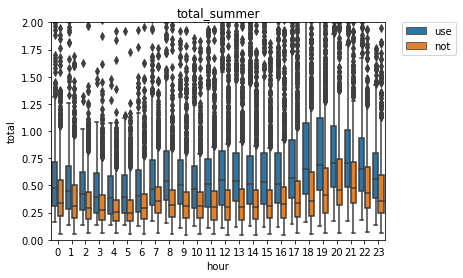

In [269]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

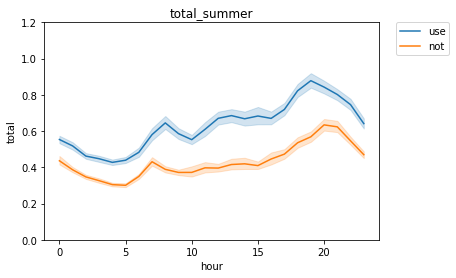

In [270]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_summer')
plt.show()

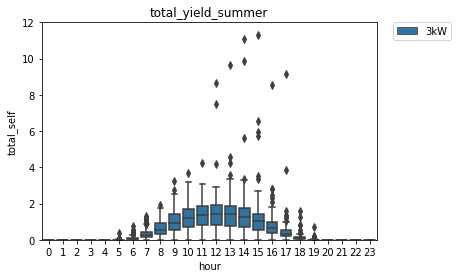

In [271]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

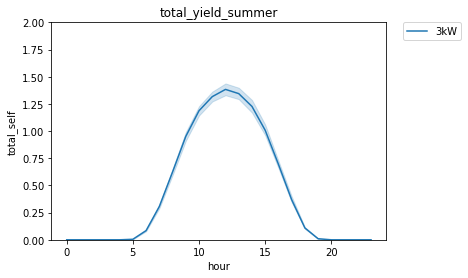

In [272]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_summer')
plt.show()

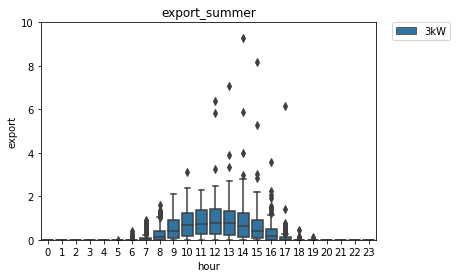

In [273]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

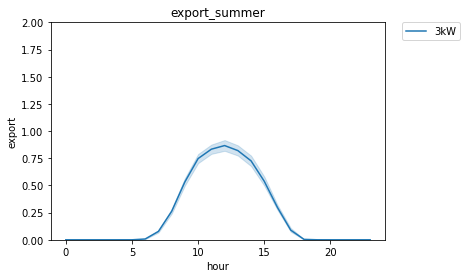

In [274]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_summer')
plt.show()

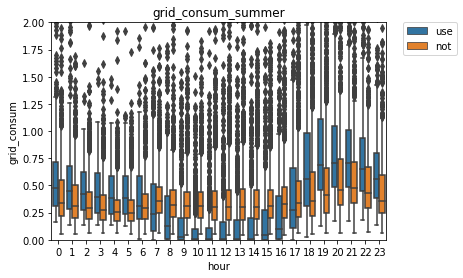

In [275]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

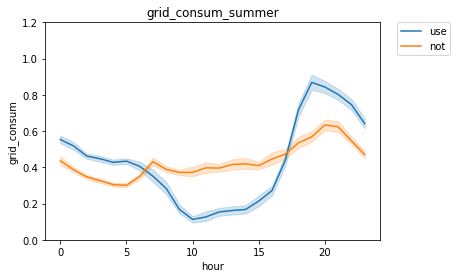

In [276]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_summer, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_summer')
plt.show()

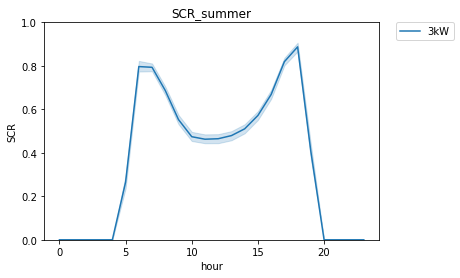

In [277]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_summer')
plt.show()

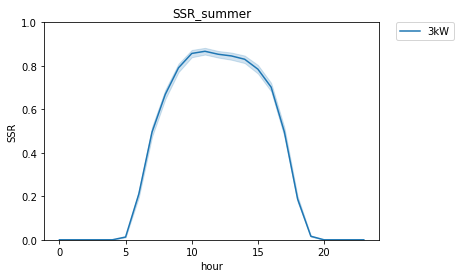

In [278]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_summer, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_summer')
plt.show()

<hr>

### 가을(Autumn)

In [279]:
df_all_hour_autumn = df_all_hour[(df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') | (df_all_hour.ym == '2021/11')]

In [280]:
# 총 전력 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1565.0  0.370618  0.389730  0.029968  0.219971  0.309937  0.429932   
     1   1569.0  0.337969  0.234600  0.039978  0.200073  0.289917  0.380127   
     2   1565.0  0.317384  0.198719  0.030029  0.190063  0.280029  0.369995   
     3   1570.0  0.313470  0.233663  0.039978  0.189941  0.270020  0.359863   
     4   1563.0  0.297703  0.193605  0.030029  0.179932  0.260010  0.359863   
     5   1563.0  0.302342  0.296832  0.030029  0.170044  0.250000  0.359863   
     6   1560.0  0.330779  0.281238  0.029968  0.190155  0.274902  0.390015   
     7   1555.0  0.403929  0.488423  0.020020  0.239990  0.330078  0.459961   
     8   1569.0  0.362788  0.392574  0.019958  0.209961  0.300049  0.429932   
     9   1560.0  0.325581  0.341599  0.019958  0.180054  0.280029  0.389893   
     10  1565.0  0.304720  0.339423  0.029968  0.179932  0.260010  0.350098   
     11  1544.0  0.301683  0.305591  0.030029  0.160034  0.250000  0.350006   
     12  1551.0  0.323012  0.281235  0.020020  0.160034  0.260010  0.379883   
     13  1550.0  0.320027  0.414269  0.020020  0.160034  0.250000  0.379883   
     14  1547.0  0.322095  0.307980  0.019958  0.169922  0.260010  0.364990   
     15  1547.0  0.343959  0.542472  0.019958  0.170013  0.270020  0.369995   
     16  1552.0  0.351359  0.375128  0.020020  0.180145  0.280029  0.400024   
     17  1556.0  0.390506  0.437529  0.029968  0.190063  0.309967  0.449951   
     18  1550.0  0.466479  0.421107  0.030029  0.229980  0.359863  0.550018   
     19  1554.0  0.527747  0.512769  0.019958  0.270020  0.389893  0.590088   
     20  1547.0  0.497726  0.338225  0.049927  0.309937  0.420044  0.584961   
     21  1558.0  0.508834  0.370150  0.039978  0.319946  0.420044  0.580078   
     22  1563.0  0.466324  0.449527  0.020020  0.290039  0.380005  0.530029   
     23  1560.0  0.393740  0.248240  0.030029  0.239990  0.339844  0.470215   
use  0    805.0  0.564026  0.291562  0.149902  0.319946  0.510010  0.780029   
     1    802.0  0.521862  0.277271  0.139954  0.290039  0.469971  0.709961   
     2    806.0  0.488264  0.265898  0.140015  0.280029  0.459961  0.649902   
     3    797.0  0.465147  0.243017  0.130005  0.265015  0.420166  0.609863   
     4    801.0  0.456460  0.242762  0.140015  0.260010  0.420044  0.600098   
     5    801.0  0.459635  0.235302  0.130005  0.259888  0.429932  0.590088   
     6    799.0  0.513797  0.336870  0.140015  0.270020  0.440063  0.649963   
     7    799.0  0.636825  0.465848  0.139893  0.339905  0.490112  0.795044   
     8    800.0  0.641477  0.341420  0.120117  0.370087  0.569763  0.832306   
     9    809.0  0.548234  0.334396  0.099976  0.290039  0.470215  0.739990   
     10   807.0  0.489845  0.298409  0.079956  0.250000  0.430054  0.649872   
     11   799.0  0.504611  0.370507  0.079956  0.250061  0.419983  0.649963   
     12   796.0  0.556438  0.395696  0.109985  0.279877  0.469971  0.719864   
     13   798.0  0.531028  0.323363  0.080078  0.280029  0.479980  0.679932   
     14   805.0  0.511916  0.336994  0.080200  0.270020  0.449829  0.640137   
     15   804.0  0.502738  0.319223  0.089966  0.277405  0.449829  0.640015   
     16   808.0  0.531191  0.437608  0.109985  0.289917  0.459961  0.669876   
     17   804.0  0.644416  0.526120  0.109985  0.360092  0.554932  0.800049   
     18   801.0  0.749121  0.396772  0.189941  0.451416  0.670044  0.940063   
     19   800.0  0.758448  0.397487  0.219971  0.457855  0.659912  0.960205   
     20   802.0  0.732828  0.417093  0.200012  0.450073  0.630005  0.930115   
     21   796.0  0.731014  0.387661  0.200012  0.447510  0.630005  0.989990   
     22   804.0  0.716386  0.429627  0.169983  0.419922  0.620117  0.949951   
     23   804.0  0.636558  0.351424  0.140015  0.359985  0.569885  0.869934   

               max  
type 시간             
not  0   12.57006

In [281]:
# 총 전력 생산량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   805.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   806.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   797.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   801.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.000012  0.000354  0.000000  0.000000  0.000000   
         6   799.0  0.006446  0.019699  0.000000  0.000000  0.000000   
         7   799.0  0.128918  0.141691  0.000000  0.030029  0.090088   
         8   800.0  0.492079  0.336447  0.000000  0.247498  0.450195   
         9   809.0  0.927674  0.542360  0.000000  0.500000  0.910156   
         10  807.0  1.226465  0.631297  0.000000  0.724976  1.310059   
         11  799.0  1.375278  0.701260  0.019897  0.795044  1.520020   
         12  796.0  1.411053  0.745012  0.010010  0.777435  1.530029   
         13  798.0  1.309821  0.731075  0.010010  0.709961  1.369995   
         14  805.0  1.117779  0.743628  0.000000  0.570068  1.099854   
         15  804.0  0.749598  0.492108  0.000000  0.340088  0.680176   
         16  808.0  0.364986  0.412181  0.000000  0.110107  0.250000   
         17  804.0  0.097704  0.485736  0.000000  0.000000  0.020020   
         18  801.0  0.003145  0.012682  0.000000  0.000000  0.000000   
         19  800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  796.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  804.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  804.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%        max  
설비용량(kW) 시간                       
3kW      0   0.000000   0.000000  
         1   0.000000   0.000000  
         2   0.000000   0.000000  
         3   0.000000   0.000000  
         4   0.000000   0.000000  
         5   0.000000   0.010010  
         6   0.009827   0.270020  
         7   0.179932   1.129883  
         8   0.679932   1.879883  
         9   1.360107   2.510010  
         10  1.760010   3.020020  
         11  1.974976   2.969971  
         12  2.050049   4.650146  
         13  1.919922   6.669922  
         14  1.600098  10.650146  
         15  1.109863   3.140137  
         16  0.500000   7.390137  
         17  0.099884  12.609985  
         18  0.000000   0.260010  
         19  0.000000   0.000000  
         20  0.000000   0.000000  
         21  0.000000   0.000000  
         22  0.000000   0.000000  
         23  0.000000   0.000000

In [282]:
# 총 전력 수출량
df_all_hour_autumn_use = df_all_hour_autumn[df_all_hour_autumn.type == 'use']
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   805.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   802.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   806.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   797.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   801.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   801.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   799.0  0.000238  0.003214  0.0  0.000000  0.000000  0.000000   
         7   799.0  0.016766  0.061545  0.0  0.000000  0.000000  0.010010   
         8   800.0  0.174973  0.235309  0.0  0.000000  0.074951  0.270020   
         9   809.0  0.542220  0.479314  0.0  0.079956  0.440002  0.909912   
         10  807.0  0.830515  0.595759  0.0  0.270020  0.869873  1.309937   
         11  799.0  0.971694  0.674707  0.0  0.339996  1.040039  1.559937   
         12  796.0  0.973571  0.705405  0.0  0.287430  1.015015  1.570068   
         13  798.0  0.885543  0.686607  0.0  0.230133  0.910034  1.459961   
         14  805.0  0.721986  0.676068  0.0  0.160034  0.619995  1.180054   
         15  804.0  0.414967  0.434136  0.0  0.030029  0.250000  0.729980   
         16  808.0  0.145596  0.256390  0.0  0.000000  0.020020  0.199966   
         17  804.0  0.023608  0.216965  0.0  0.000000  0.000000  0.000000   
         18  801.0  0.000050  0.001415  0.0  0.000000  0.000000  0.000000   
         19  800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  802.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  804.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  804.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.059937  
         7   0.750000  
         8   1.419922  
         9   1.949951  
         10  2.419922  
         11  2.310059  
         12  3.500000  
         13  5.699951  
         14  9.149902  
         15  2.410034  
         16  2.790039  
         17  4.760010  
         18  0.040039  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [283]:
# 총 그리드 소비량
df_all_hour_autumn.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1565.0  0.370618  0.389730  0.029968  0.219971  0.309937  0.429932   
     1   1569.0  0.337969  0.234600  0.039978  0.200073  0.289917  0.380127   
     2   1565.0  0.317384  0.198719  0.030029  0.190063  0.280029  0.369995   
     3   1570.0  0.313470  0.233663  0.039978  0.189941  0.270020  0.359863   
     4   1563.0  0.297703  0.193605  0.030029  0.179932  0.260010  0.359863   
     5   1563.0  0.302342  0.296832  0.030029  0.170044  0.250000  0.359863   
     6   1560.0  0.330779  0.281238  0.029968  0.190155  0.274902  0.390015   
     7   1555.0  0.403929  0.488423  0.020020  0.239990  0.330078  0.459961   
     8   1569.0  0.362788  0.392574  0.019958  0.209961  0.300049  0.429932   
     9   1560.0  0.325581  0.341599  0.019958  0.180054  0.280029  0.389893   
     10  1565.0  0.304720  0.339423  0.029968  0.179932  0.260010  0.350098   
     11  1544.0  0.301683  0.305591  0.030029  0.160034  0.250000  0.350006   
     12  1551.0  0.323012  0.281235  0.020020  0.160034  0.260010  0.379883   
     13  1550.0  0.320027  0.414269  0.020020  0.160034  0.250000  0.379883   
     14  1547.0  0.322095  0.307980  0.019958  0.169922  0.260010  0.364990   
     15  1547.0  0.343959  0.542472  0.019958  0.170013  0.270020  0.369995   
     16  1552.0  0.351359  0.375128  0.020020  0.180145  0.280029  0.400024   
     17  1556.0  0.390506  0.437529  0.029968  0.190063  0.309967  0.449951   
     18  1550.0  0.466479  0.421107  0.030029  0.229980  0.359863  0.550018   
     19  1554.0  0.527747  0.512769  0.019958  0.270020  0.389893  0.590088   
     20  1547.0  0.497726  0.338225  0.049927  0.309937  0.420044  0.584961   
     21  1558.0  0.508834  0.370150  0.039978  0.319946  0.420044  0.580078   
     22  1563.0  0.466324  0.449527  0.020020  0.290039  0.380005  0.530029   
     23  1560.0  0.393740  0.248240  0.030029  0.239990  0.339844  0.470215   
use  0    805.0  0.564026  0.291562  0.149902  0.319946  0.510010  0.780029   
     1    802.0  0.521862  0.277271  0.139954  0.290039  0.469971  0.709961   
     2    806.0  0.488264  0.265898  0.140015  0.280029  0.459961  0.649902   
     3    797.0  0.465147  0.243017  0.130005  0.265015  0.420166  0.609863   
     4    801.0  0.456460  0.242762  0.140015  0.260010  0.420044  0.600098   
     5    801.0  0.459623  0.235283  0.130005  0.259888  0.429932  0.590088   
     6    799.0  0.507588  0.337336  0.140015  0.260010  0.440063  0.645020   
     7    799.0  0.524673  0.479709  0.000000  0.219971  0.390015  0.679932   
     8    800.0  0.324370  0.344879  0.000000  0.059937  0.199951  0.489990   
     9    809.0  0.162781  0.273071  0.000000  0.000000  0.020020  0.219971   
     10   807.0  0.093894  0.201788  0.000000  0.000000  0.000000  0.079834   
     11   799.0  0.101027  0.254989  0.000000  0.000000  0.000000  0.060059   
     12   796.0  0.118957  0.254326  0.000000  0.000000  0.000000  0.099976   
     13   798.0  0.106750  0.214913  0.000000  0.000000  0.009888  0.100098   
     14   805.0  0.116122  0.238200  0.000000  0.000000  0.010010  0.110107   
     15   804.0  0.168107  0.261442  0.000000  0.000000  0.050049  0.240051   
     16   808.0  0.311801  0.347844  0.000000  0.059937  0.219971  0.479980   
     17   804.0  0.570320  0.396949  0.010010  0.270020  0.489990  0.760010   
     18   801.0  0.746025  0.397789  0.189941  0.449951  0.670044  0.939941   
     19   800.0  0.758448  0.397487  0.219971  0.457855  0.659912  0.960205   
     20   802.0  0.732828  0.417093  0.200012  0.450073  0.630005  0.930115   
     21   796.0  0.731014  0.387661  0.200012  0.447510  0.630005  0.989990   
     22   804.0  0.716386  0.429627  0.169983  0.419922  0.620117  0.949951   
     23   804.0  0.636558  0.351424  0.140015  0.359985  0.569885  0.869934   

               max  
type 시간             
not  0   12.57006

In [284]:
# SCR(자가소비율)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   805.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   806.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   797.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   801.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.001248  0.035333  0.000000  0.000000  0.000000   
         6   799.0  0.252758  0.433648  0.000000  0.000000  0.000000   
         7   799.0  0.835827  0.316590  0.000000  0.848791  1.000000   
         8   800.0  0.731059  0.268914  0.000000  0.522278  0.802431   
         9   809.0  0.534529  0.304650  0.000000  0.257150  0.494246   
         10  807.0  0.436480  0.292602  0.000000  0.184864  0.353681   
         11  799.0  0.408721  0.294671  0.052629  0.159189  0.315992   
         12  796.0  0.426143  0.294792  0.059016  0.174264  0.336006   
         13  798.0  0.447482  0.297456  0.045759  0.190102  0.363236   
         14  805.0  0.484849  0.298169  0.000000  0.222194  0.421959   
         15  804.0  0.593617  0.307010  0.000000  0.319391  0.608491   
         16  808.0  0.759976  0.282436  0.000000  0.548151  0.899878   
         17  804.0  0.646549  0.451551  0.000000  0.000000  1.000000   
         18  801.0  0.130894  0.337254  0.000000  0.000000  0.000000   
         19  800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  796.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  804.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  804.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%  max  
설비용량(kW) 시간                 
3kW      0   0.000000  0.0  
         1   0.000000  0.0  
         2   0.000000  0.0  
         3   0.000000  0.0  
         4   0.000000  0.0  
         5   0.000000  1.0  
         6   0.804367  1.0  
         7   1.000000  1.0  
         8   1.000000  1.0  
         9   0.828681  1.0  
         10  0.627366  1.0  
         11  0.587624  1.0  
         12  0.627190  1.0  
         13  0.669004  1.0  
         14  0.732576  1.0  
         15  0.902078  1.0  
         16  1.000000  1.0  
         17  1.000000  1.0  
         18  0.000000  1.0  
         19  0.000000  0.0  
         20  0.000000  0.0  
         21  0.000000  0.0  
         22  0.000000  0.0  
         23  0.000000  0.0

In [285]:
# SSR(자가공급률)
df_all_hour_autumn_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std       min       25%       50%  \
설비용량(kW) 시간                                                            
3kW      0   805.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         1   802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         2   806.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         3   797.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         4   801.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         5   801.0  0.000015  0.000437  0.000000  0.000000  0.000000   
         6   799.0  0.015855  0.042958  0.000000  0.000000  0.000000   
         7   799.0  0.242630  0.233963  0.000000  0.053863  0.166124   
         8   800.0  0.583980  0.309187  0.000000  0.331998  0.618184   
         9   809.0  0.790844  0.288072  0.000000  0.676481  0.950549   
         10  807.0  0.869887  0.240523  0.000000  0.872485  1.000000   
         11  799.0  0.877309  0.231779  0.030331  0.879702  1.000000   
         12  796.0  0.866662  0.230323  0.014104  0.833471  1.000000   
         13  798.0  0.862130  0.231114  0.012206  0.836077  0.991591   
         14  805.0  0.843313  0.247443  0.000000  0.785318  0.976167   
         15  804.0  0.752130  0.285085  0.000000  0.580235  0.880411   
         16  808.0  0.508787  0.325928  0.000000  0.202273  0.500093   
         17  804.0  0.144946  0.213312  0.000000  0.000000  0.040182   
         18  801.0  0.006134  0.021266  0.000000  0.000000  0.000000   
         19  800.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         20  802.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         21  796.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         22  804.0  0.000000  0.000000  0.000000  0.000000  0.000000   
         23  804.0  0.000000  0.000000  0.000000  0.000000  0.000000   

                  75%       max  
설비용량(kW) 시간                      
3kW      0   0.000000  0.000000  
         1   0.000000  0.000000  
         2   0.000000  0.000000  
         3   0.000000  0.000000  
         4   0.000000  0.000000  
         5   0.000000  0.012357  
         6   0.007835  0.500000  
         7   0.380142  1.000000  
         8   0.862407  1.000000  
         9   1.000000  1.000000  
         10  1.000000  1.000000  
         11  1.000000  1.000000  
         12  1.000000  1.000000  
         13  1.000000  1.000000  
         14  1.000000  1.000000  
         15  1.000000  1.000000  
         16  0.810248  1.000000  
         17  0.191892  0.961502  
         18  0.000000  0.209511  
         19  0.000000  0.000000  
         20  0.000000  0.000000  
         21  0.000000  0.000000  
         22  0.000000  0.000000  
         23  0.000000  0.000000

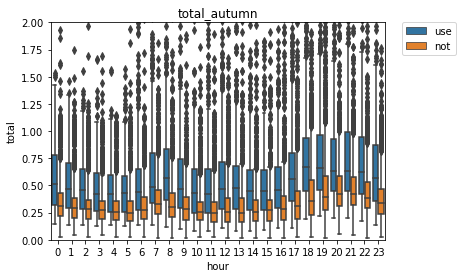

In [286]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

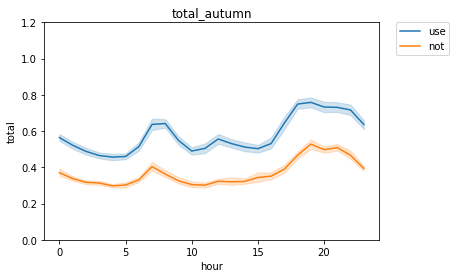

In [287]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_autumn')
plt.show()

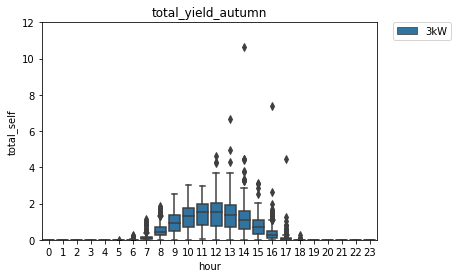

In [288]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

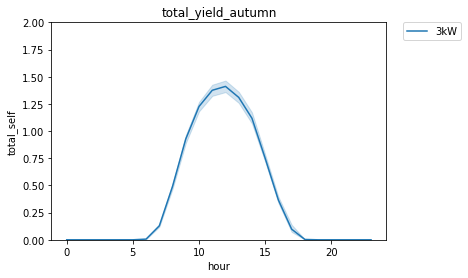

In [289]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_autumn')
plt.show()

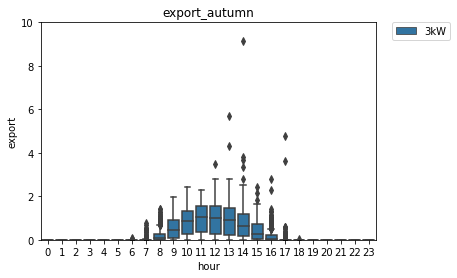

In [290]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

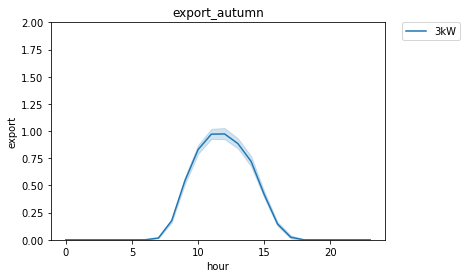

In [291]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_autumn')
plt.show()

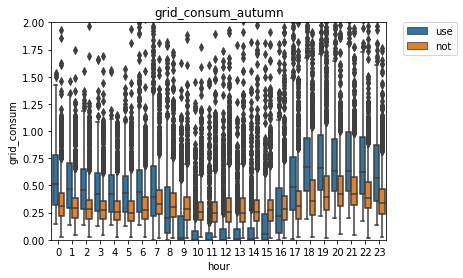

In [292]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

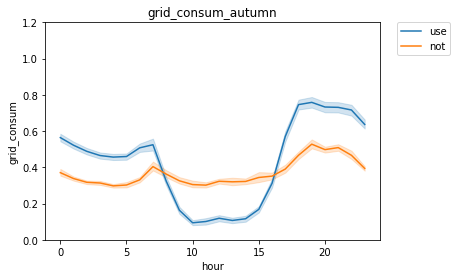

In [293]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_autumn, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_autumn')
plt.show()

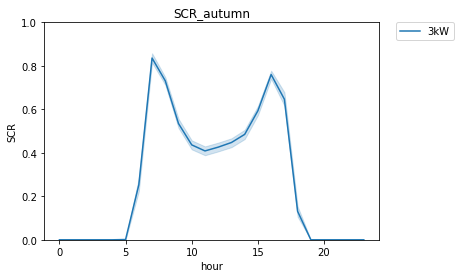

In [294]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_autumn')
plt.show()

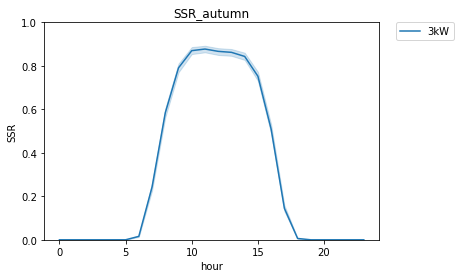

In [295]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_autumn, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_autumn')
plt.show()

<hr>

### 겨울(Winter)

In [296]:
df_all_hour_winter = df_all_hour[(df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') | (df_all_hour.ym == '2022/2')]

In [297]:
# 총 전력 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1561.0  0.412357  0.302099  0.019897  0.239990  0.359985  0.479980   
     1   1562.0  0.380123  0.285047  0.019897  0.222656  0.339844  0.440186   
     2   1562.0  0.368259  0.257673  0.040039  0.219971  0.320068  0.420166   
     3   1566.0  0.357912  0.221075  0.020020  0.210205  0.320068  0.420349   
     4   1565.0  0.358999  0.299992  0.020020  0.209961  0.310059  0.419922   
     5   1550.0  0.359120  0.351973  0.029907  0.199951  0.310059  0.420349   
     6   1561.0  0.387615  0.337888  0.020020  0.219971  0.330078  0.459961   
     7   1558.0  0.455169  0.414208  0.010010  0.280029  0.399902  0.539795   
     8   1558.0  0.435029  0.530737  0.019958  0.239990  0.350098  0.500000   
     9   1561.0  0.407476  0.580480  0.020020  0.209961  0.319946  0.450195   
     10  1569.0  0.397730  0.660159  0.010010  0.199951  0.290039  0.429932   
     11  1571.0  0.365813  0.443220  0.020020  0.179932  0.280029  0.410156   
     12  1562.0  0.366828  0.408297  0.010010  0.179932  0.280029  0.439941   
     13  1558.0  0.358111  0.319136  0.010010  0.179932  0.280029  0.430176   
     14  1559.0  0.372126  0.481104  0.019897  0.179932  0.280029  0.429932   
     15  1564.0  0.368486  0.583402  0.020020  0.189941  0.290039  0.419922   
     16  1567.0  0.411146  0.555799  0.019958  0.199951  0.310059  0.459961   
     17  1563.0  0.477813  0.479392  0.019897  0.229980  0.359985  0.549805   
     18  1542.0  0.558204  0.507364  0.019897  0.270020  0.419922  0.630371   
     19  1558.0  0.605640  0.726485  0.030029  0.310059  0.449951  0.639893   
     20  1554.0  0.574894  0.534990  0.020020  0.339966  0.469971  0.639893   
     21  1546.0  0.570580  0.539691  0.049927  0.349976  0.479980  0.639893   
     22  1563.0  0.515591  0.382215  0.020020  0.310059  0.449951  0.610107   
     23  1566.0  0.456047  0.512156  0.020020  0.270020  0.389893  0.529785   
use  0    796.0  0.649981  0.272627  0.140015  0.430023  0.630127  0.842651   
     1    798.0  0.597824  0.313041  0.150024  0.391357  0.574951  0.779968   
     2    800.0  0.564683  0.233241  0.140015  0.379883  0.540039  0.729980   
     3    799.0  0.540895  0.220531  0.169922  0.370117  0.500000  0.699951   
     4    800.0  0.550770  0.279636  0.139893  0.379883  0.510010  0.699829   
     5    801.0  0.542351  0.244940  0.119995  0.359985  0.500000  0.700195   
     6    791.0  0.586290  0.310325  0.099976  0.379883  0.520020  0.770020   
     7    789.0  0.731805  0.665351  0.159912  0.419922  0.590088  0.940186   
     8    795.0  0.805069  0.405211  0.159790  0.494995  0.739746  1.060303   
     9    793.0  0.748805  0.471457  0.089844  0.450195  0.709961  0.959961   
     10   788.0  0.657942  0.597349  0.079834  0.340271  0.580078  0.842468   
     11   788.0  0.625746  0.441268  0.090088  0.330078  0.569824  0.819885   
     12   790.0  0.637833  0.409615  0.079834  0.350098  0.569763  0.857330   
     13   788.0  0.611433  0.364355  0.079834  0.367386  0.559875  0.812637   
     14   785.0  0.596032  0.355232  0.080078  0.370239  0.550049  0.750000   
     15   795.0  0.587744  0.343250  0.070068  0.330078  0.539917  0.750061   
     16   797.0  0.635632  0.579879  0.089844  0.369873  0.570068  0.790283   
     17   794.0  0.774373  0.421027  0.119873  0.479980  0.700195  0.969971   
     18   795.0  0.909995  0.428117  0.199951  0.590088  0.849609  1.129883   
     19   795.0  0.913120  0.412334  0.140137  0.590088  0.860107  1.185059   
     20   796.0  0.864700  0.421378  0.149902  0.579834  0.810059  1.100098   
     21   788.0  0.843653  0.359500  0.200073  0.587402  0.805054  1.079712   
     22   795.0  0.786754  0.322910  0.200195  0.559814  0.760010  1.004883   
     23   794.0  0.727693  0.356937  0.160034  0.502441  0.699951  0.917480   

               max  
type 시간             
not  0    5.16992

In [298]:
# 총 전력 생산량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   798.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   799.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   801.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   791.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   789.0  0.011182  0.027089  0.0  0.000000  0.000000  0.010010   
         8   795.0  0.233012  0.196792  0.0  0.090088  0.180176  0.320007   
         9   793.0  0.754276  0.462263  0.0  0.369873  0.709961  1.120117   
         10  788.0  1.186663  0.599265  0.0  0.729980  1.239990  1.682617   
         11  788.0  1.480505  0.683321  0.0  0.947449  1.630127  2.000000   
         12  790.0  1.570732  0.700149  0.0  1.029846  1.719971  2.140076   
         13  788.0  1.488799  0.698854  0.0  0.920105  1.640015  2.079834   
         14  785.0  1.265183  0.727112  0.0  0.709961  1.340088  1.790039   
         15  795.0  0.870399  0.665949  0.0  0.404968  0.789795  1.299927   
         16  797.0  0.324626  0.415112  0.0  0.080078  0.209961  0.459961   
         17  794.0  0.052760  0.290329  0.0  0.000000  0.010010  0.050049   
         18  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  788.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  794.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.000000  
         6    0.000000  
         7    0.290039  
         8    1.119873  
         9    1.940186  
         10   3.520020  
         11   4.779785  
         12   4.949951  
         13   4.209961  
         14   8.030029  
         15  10.969971  
         16   7.850098  
         17   7.679932  
         18   0.000000  
         19   0.000000  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [299]:
# 총 전력 수출량
df_all_hour_winter_use = df_all_hour_winter[df_all_hour_winter.type == 'use']
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   798.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   799.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   801.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   791.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   789.0  0.000443  0.005054  0.0  0.000000  0.000000  0.000000   
         8   795.0  0.030966  0.073131  0.0  0.000000  0.000000  0.025024   
         9   793.0  0.307051  0.318952  0.0  0.039795  0.189941  0.510010   
         10  788.0  0.679448  0.501626  0.0  0.250000  0.625000  1.082520   
         11  788.0  0.956886  0.617237  0.0  0.419922  1.010010  1.432617   
         12  790.0  1.036987  0.655178  0.0  0.422607  1.120117  1.540039   
         13  788.0  0.970327  0.633574  0.0  0.417480  1.020020  1.470032   
         14  785.0  0.779367  0.625834  0.0  0.239990  0.760010  1.239990   
         15  795.0  0.466117  0.553643  0.0  0.060059  0.319824  0.760010   
         16  797.0  0.116172  0.226392  0.0  0.000000  0.010010  0.130127   
         17  794.0  0.012927  0.185210  0.0  0.000000  0.000000  0.000000   
         18  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  788.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  794.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.089844  
         8   0.620117  
         9   1.369873  
         10  3.010010  
         11  4.130127  
         12  4.089844  
         13  3.559814  
         14  6.680176  
         15  9.610107  
         16  2.250000  
         17  5.099976  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [300]:
# 총 그리드 소비량
df_all_hour_winter.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   1561.0  0.412357  0.302099  0.019897  0.239990  0.359985  0.479980   
     1   1562.0  0.380123  0.285047  0.019897  0.222656  0.339844  0.440186   
     2   1562.0  0.368259  0.257673  0.040039  0.219971  0.320068  0.420166   
     3   1566.0  0.357912  0.221075  0.020020  0.210205  0.320068  0.420349   
     4   1565.0  0.358999  0.299992  0.020020  0.209961  0.310059  0.419922   
     5   1550.0  0.359120  0.351973  0.029907  0.199951  0.310059  0.420349   
     6   1561.0  0.387615  0.337888  0.020020  0.219971  0.330078  0.459961   
     7   1558.0  0.455169  0.414208  0.010010  0.280029  0.399902  0.539795   
     8   1558.0  0.435029  0.530737  0.019958  0.239990  0.350098  0.500000   
     9   1561.0  0.407476  0.580480  0.020020  0.209961  0.319946  0.450195   
     10  1569.0  0.397730  0.660159  0.010010  0.199951  0.290039  0.429932   
     11  1571.0  0.365813  0.443220  0.020020  0.179932  0.280029  0.410156   
     12  1562.0  0.366828  0.408297  0.010010  0.179932  0.280029  0.439941   
     13  1558.0  0.358111  0.319136  0.010010  0.179932  0.280029  0.430176   
     14  1559.0  0.372126  0.481104  0.019897  0.179932  0.280029  0.429932   
     15  1564.0  0.368486  0.583402  0.020020  0.189941  0.290039  0.419922   
     16  1567.0  0.411146  0.555799  0.019958  0.199951  0.310059  0.459961   
     17  1563.0  0.477813  0.479392  0.019897  0.229980  0.359985  0.549805   
     18  1542.0  0.558204  0.507364  0.019897  0.270020  0.419922  0.630371   
     19  1558.0  0.605640  0.726485  0.030029  0.310059  0.449951  0.639893   
     20  1554.0  0.574894  0.534990  0.020020  0.339966  0.469971  0.639893   
     21  1546.0  0.570580  0.539691  0.049927  0.349976  0.479980  0.639893   
     22  1563.0  0.515591  0.382215  0.020020  0.310059  0.449951  0.610107   
     23  1566.0  0.456047  0.512156  0.020020  0.270020  0.389893  0.529785   
use  0    796.0  0.649981  0.272627  0.140015  0.430023  0.630127  0.842651   
     1    798.0  0.597824  0.313041  0.150024  0.391357  0.574951  0.779968   
     2    800.0  0.564683  0.233241  0.140015  0.379883  0.540039  0.729980   
     3    799.0  0.540895  0.220531  0.169922  0.370117  0.500000  0.699951   
     4    800.0  0.550770  0.279636  0.139893  0.379883  0.510010  0.699829   
     5    801.0  0.542351  0.244940  0.119995  0.359985  0.500000  0.700195   
     6    791.0  0.586290  0.310325  0.099976  0.379883  0.520020  0.770020   
     7    789.0  0.721067  0.666510  0.149902  0.399902  0.579834  0.939941   
     8    795.0  0.603022  0.423910  0.000000  0.270020  0.520020  0.860229   
     9    793.0  0.301581  0.433820  0.000000  0.030029  0.140137  0.439941   
     10   788.0  0.150728  0.463801  0.000000  0.000000  0.010254  0.139954   
     11   788.0  0.102127  0.229999  0.000000  0.000000  0.000000  0.080078   
     12   790.0  0.104088  0.231412  0.000000  0.000000  0.000000  0.089844   
     13   788.0  0.092960  0.191576  0.000000  0.000000  0.000000  0.090149   
     14   785.0  0.110215  0.216662  0.000000  0.000000  0.010010  0.109985   
     15   795.0  0.183462  0.276696  0.000000  0.000000  0.060059  0.254883   
     16   797.0  0.427179  0.460239  0.000000  0.119873  0.360352  0.600098   
     17   794.0  0.734539  0.420396  0.030029  0.439941  0.689941  0.949951   
     18   795.0  0.909995  0.428117  0.199951  0.590088  0.849609  1.129883   
     19   795.0  0.913120  0.412334  0.140137  0.590088  0.860107  1.185059   
     20   796.0  0.864700  0.421378  0.149902  0.579834  0.810059  1.100098   
     21   788.0  0.843653  0.359500  0.200073  0.587402  0.805054  1.079712   
     22   795.0  0.786754  0.322910  0.200195  0.559814  0.760010  1.004883   
     23   794.0  0.727693  0.356937  0.160034  0.502441  0.699951  0.917480   

               max  
type 시간             
not  0    5.16992

In [301]:
# SCR(자가소비율)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  max
설비용량(kW) 시간                                                                   
3kW      0   796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         1   798.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         2   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         3   799.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         4   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         5   801.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         6   791.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         7   789.0  0.396994  0.487912  0.0  0.000000  0.000000  1.000000  1.0
         8   795.0  0.865053  0.253922  0.0  0.844697  1.000000  1.000000  1.0
         9   793.0  0.668651  0.263930  0.0  0.461160  0.713953  0.902848  1.0
         10  788.0  0.500795  0.270783  0.0  0.281090  0.459787  0.697777  1.0
         11  788.0  0.427157  0.266874  0.0  0.209955  0.376868  0.573356  1.0
         12  790.0  0.413920  0.261482  0.0  0.205309  0.355829  0.575538  1.0
         13  788.0  0.428129  0.258588  0.0  0.216335  0.377711  0.585546  1.0
         14  785.0  0.481602  0.269808  0.0  0.264451  0.438651  0.666667  1.0
         15  795.0  0.592503  0.283913  0.0  0.343923  0.588168  0.851326  1.0
         16  797.0  0.788000  0.275199  0.0  0.644716  0.922932  1.000000  1.0
         17  794.0  0.511900  0.484258  0.0  0.000000  0.709873  1.000000  1.0
         18  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         19  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         20  796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         21  788.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         22  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0
         23  794.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000  0.0

In [302]:
# SSR(자가공급률)
df_all_hour_winter_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                 
3kW      0   796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   798.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   799.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   800.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   801.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         6   791.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         7   789.0  0.019529  0.045293  0.0  0.000000  0.000000  0.022240   
         8   795.0  0.306870  0.237402  0.0  0.116822  0.260427  0.457527   
         9   793.0  0.678912  0.299824  0.0  0.464786  0.762388  0.941134   
         10  788.0  0.843151  0.243805  0.0  0.775493  0.971543  1.000000   
         11  788.0  0.888895  0.210396  0.0  0.878385  1.000000  1.000000   
         12  790.0  0.891184  0.201353  0.0  0.875738  1.000000  1.000000   
         13  788.0  0.888980  0.197157  0.0  0.865504  1.000000  1.000000   
         14  785.0  0.860298  0.224665  0.0  0.811321  0.979778  1.000000   
         15  795.0  0.753118  0.284338  0.0  0.575564  0.865925  1.000000   
         16  797.0  0.416940  0.322293  0.0  0.122024  0.346614  0.688024   
         17  794.0  0.068752  0.135499  0.0  0.000000  0.011775  0.070846   
         18  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         19  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         20  796.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  788.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  795.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  794.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.000000  
         6   0.000000  
         7   0.452787  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  0.872671  
         18  0.000000  
         19  0.000000  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

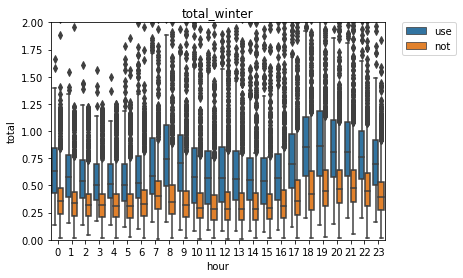

In [303]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

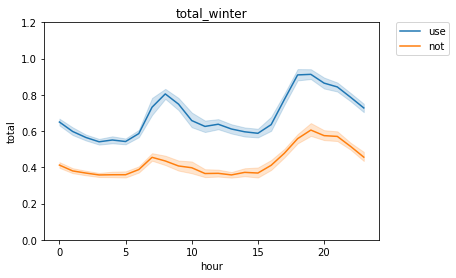

In [304]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_winter')
plt.show()

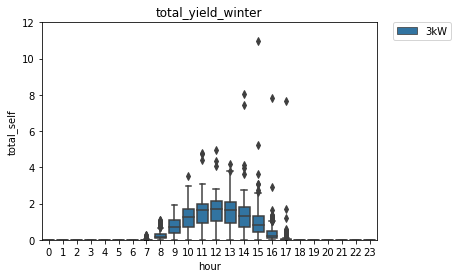

In [305]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

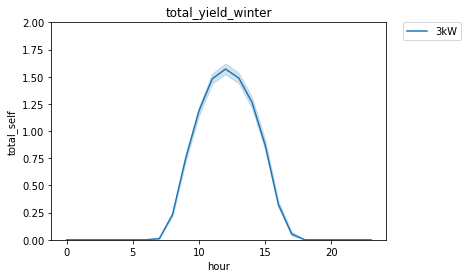

In [306]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_winter')
plt.show()

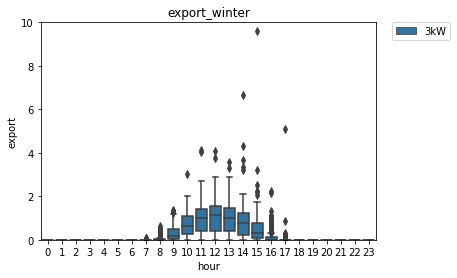

In [307]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

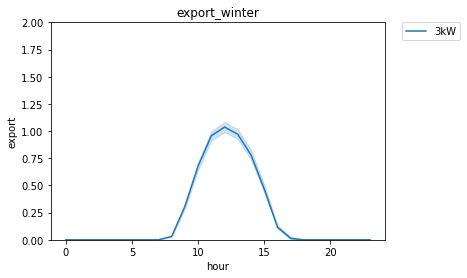

In [308]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_winter')
plt.show()

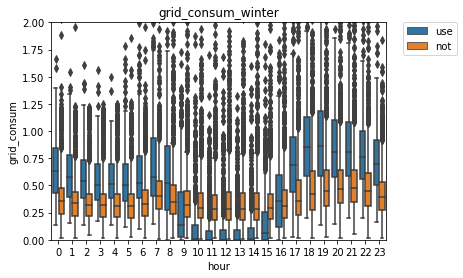

In [309]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

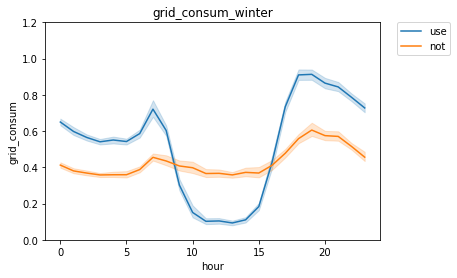

In [310]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_winter, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_winter')
plt.show()

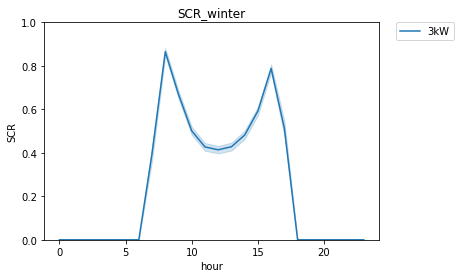

In [311]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_winter')
plt.show()

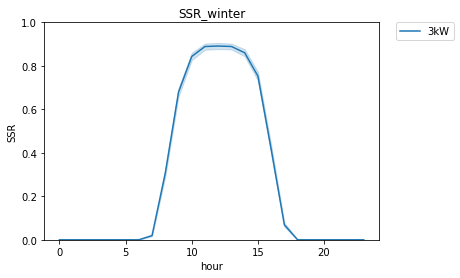

In [312]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_winter, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_winter')
plt.show()

<hr>

## **<1년(total)>**

### 2021.05 ~ 2022.04

In [313]:
df_all_hour_year = df_all_hour[(df_all_hour.ym == '2021/5') | (df_all_hour.ym == '2021/6') | (df_all_hour.ym == '2021/7') |
                              (df_all_hour.ym == '2021/8') | (df_all_hour.ym == '2021/9') | (df_all_hour.ym == '2021/10') |
                              (df_all_hour.ym == '2021/11') | (df_all_hour.ym == '2021/12') | (df_all_hour.ym == '2022/1') |
                              (df_all_hour.ym == '2022/2') | (df_all_hour.ym == '2022/3') | (df_all_hour.ym == '2022/4')]

In [314]:
# 총 전력 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['전력소비량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   6180.0  0.392641  0.367400  0.019897  0.219971  0.320068  0.460083   
     1   6198.0  0.360639  0.298882  0.019897  0.209961  0.299927  0.420166   
     2   6189.0  0.336652  0.233026  0.030029  0.199951  0.289795  0.399902   
     3   6200.0  0.325111  0.225162  0.020020  0.190002  0.279907  0.389893   
     4   6205.0  0.315723  0.232330  0.020020  0.180054  0.270020  0.379883   
     5   6166.0  0.319376  0.314468  0.029907  0.179932  0.260010  0.380005   
     6   6174.0  0.355613  0.341862  0.020020  0.200073  0.299927  0.420044   
     7   6163.0  0.422360  0.416753  0.010010  0.250000  0.359985  0.489990   
     8   6193.0  0.383552  0.397327  0.010010  0.219727  0.319824  0.449951   
     9   6180.0  0.357842  0.463775  0.019958  0.190002  0.290039  0.410034   
     10  6194.0  0.346754  0.515099  0.010010  0.180054  0.279785  0.390137   
     11  6177.0  0.340406  0.432850  0.020020  0.169922  0.260010  0.390137   
     12  6164.0  0.350219  0.390660  0.010010  0.169983  0.270020  0.410034   
     13  6167.0  0.345974  0.420417  0.010010  0.169983  0.260254  0.400146   
     14  6166.0  0.350928  0.437561  0.019897  0.170044  0.270020  0.399902   
     15  6164.0  0.356115  0.480333  0.019897  0.179932  0.279907  0.399902   
     16  6158.0  0.381266  0.533831  0.019958  0.189941  0.290039  0.420044   
     17  6162.0  0.425628  0.461314  0.019897  0.200073  0.319946  0.489990   
     18  6128.0  0.493828  0.483407  0.019897  0.229980  0.359985  0.570068   
     19  6160.0  0.547371  0.662090  0.019958  0.270020  0.400024  0.609863   
     20  6145.0  0.552926  0.492383  0.020020  0.310059  0.439941  0.620117   
     21  6154.0  0.553631  0.529421  0.039978  0.329834  0.440186  0.619995   
     22  6187.0  0.492463  0.390331  0.020020  0.290039  0.409973  0.580078   
     23  6177.0  0.427288  0.373109  0.020020  0.239990  0.359863  0.510010   
use  0   3230.0  0.577361  0.302641  0.140015  0.340088  0.530029  0.779785   
     1   3227.0  0.534821  0.300900  0.139954  0.319946  0.489990  0.709961   
     2   3235.0  0.496805  0.241734  0.130005  0.300049  0.460022  0.659668   
     3   3227.0  0.479219  0.235967  0.100098  0.289978  0.440002  0.620117   
     4   3216.0  0.472123  0.242006  0.130005  0.280029  0.440002  0.619873   
     5   3215.0  0.475343  0.236146  0.119995  0.280029  0.439941  0.619873   
     6   3201.0  0.522820  0.332250  0.099976  0.289917  0.460449  0.660156   
     7   3196.0  0.647481  0.515011  0.109863  0.349976  0.529907  0.819946   
     8   3207.0  0.686581  0.445959  0.100037  0.400024  0.599976  0.880096   
     9   3212.0  0.604973  0.399315  0.080078  0.329712  0.540100  0.790039   
     10  3213.0  0.540405  0.410839  0.070312  0.275146  0.470215  0.690186   
     11  3197.0  0.550300  0.431221  0.050537  0.270020  0.469971  0.700073   
     12  3199.0  0.591731  0.445227  0.079834  0.290024  0.500122  0.759796   
     13  3197.0  0.575449  0.398241  0.060059  0.300049  0.490234  0.719849   
     14  3203.0  0.557275  0.396584  0.026428  0.299683  0.479736  0.689941   
     15  3211.0  0.559342  0.476085  0.070068  0.290039  0.469971  0.679993   
     16  3227.0  0.583457  0.499185  0.089844  0.310059  0.490051  0.709976   
     17  3223.0  0.669219  0.455406  0.109863  0.379883  0.570068  0.859985   
     18  3219.0  0.788096  0.444746  0.150146  0.469971  0.690063  1.010010   
     19  3223.0  0.823608  0.461064  0.129944  0.480072  0.709961  1.070068   
     20  3220.0  0.792775  0.437392  0.149902  0.489990  0.699829  1.010010   
     21  3212.0  0.766772  0.382742  0.149994  0.489990  0.690002  0.989990   
     22  3219.0  0.727706  0.382499  0.150146  0.450012  0.659912  0.939941   
     23  3219.0  0.651312  0.353376  0.140015  0.400024  0.599854  0.850098   

               max  
type 시간             
not  0   12.57006

In [315]:
# 총 전력 생산량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['발전량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   3230.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   3235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   3216.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   3215.0  0.001565  0.008934  0.0  0.000000  0.000000  0.000000   
         6   3201.0  0.035477  0.070671  0.0  0.000000  0.000000  0.040039   
         7   3196.0  0.174462  0.215429  0.0  0.010010  0.099976  0.270020   
         8   3207.0  0.495957  0.395230  0.0  0.179932  0.420044  0.709961   
         9   3212.0  0.915574  0.560129  0.0  0.449951  0.870117  1.349854   
         10  3213.0  1.242004  0.661462  0.0  0.729980  1.290039  1.780029   
         11  3197.0  1.431381  0.726335  0.0  0.849976  1.570068  2.020020   
         12  3199.0  1.496375  0.764395  0.0  0.869995  1.629883  2.129883   
         13  3197.0  1.423805  0.755885  0.0  0.809937  1.520020  2.030029   
         14  3203.0  1.249058  0.757137  0.0  0.669922  1.290039  1.790039   
         15  3211.0  0.938261  0.675106  0.0  0.449951  0.860107  1.380127   
         16  3227.0  0.536191  0.546395  0.0  0.159912  0.429932  0.820068   
         17  3223.0  0.206872  0.387329  0.0  0.010010  0.110107  0.319824   
         18  3219.0  0.040701  0.078695  0.0  0.000000  0.000000  0.059998   
         19  3223.0  0.002787  0.016495  0.0  0.000000  0.000000  0.000000   
         20  3220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  3212.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                   max  
설비용량(kW) 시간             
3kW      0    0.000000  
         1    0.000000  
         2    0.000000  
         3    0.000000  
         4    0.000000  
         5    0.391602  
         6    0.760010  
         7    1.449951  
         8    2.059998  
         9    3.270020  
         10   4.100037  
         11   6.339844  
         12   8.669922  
         13   9.620117  
         14  11.100037  
         15  11.300049  
         16  11.000000  
         17  12.609985  
         18   1.599243  
         19   0.704712  
         20   0.000000  
         21   0.000000  
         22   0.000000  
         23   0.000000

In [316]:
# 총 전력 수출량
df_all_hour_year_use = df_all_hour_year[df_all_hour_year.type == 'use']
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['잉여전력량(kWh)']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   3230.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   3235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   3216.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   3215.0  0.000003  0.000177  0.0  0.000000  0.000000  0.000000   
         6   3201.0  0.003237  0.019373  0.0  0.000000  0.000000  0.000000   
         7   3196.0  0.038943  0.108702  0.0  0.000000  0.000000  0.020020   
         8   3207.0  0.185300  0.283662  0.0  0.000000  0.039978  0.280029   
         9   3212.0  0.503827  0.490896  0.0  0.060059  0.359985  0.849976   
         10  3213.0  0.810538  0.619941  0.0  0.239990  0.769989  1.299988   
         11  3197.0  0.980804  0.693620  0.0  0.340027  1.010010  1.549927   
         12  3199.0  1.021282  0.730296  0.0  0.340027  1.050049  1.609985   
         13  3197.0  0.956745  0.710863  0.0  0.299805  0.950012  1.539795   
         14  3203.0  0.807665  0.687198  0.0  0.209961  0.730103  1.319962   
         15  3211.0  0.542879  0.575537  0.0  0.069946  0.400024  0.919922   
         16  3227.0  0.243927  0.376853  0.0  0.000000  0.079834  0.379929   
         17  3223.0  0.054382  0.207072  0.0  0.000000  0.000000  0.030029   
         18  3219.0  0.001536  0.010921  0.0  0.000000  0.000000  0.000000   
         19  3223.0  0.000055  0.002168  0.0  0.000000  0.000000  0.000000   
         20  3220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  3212.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.010010  
         6   0.400024  
         7   1.039978  
         8   1.679993  
         9   2.320007  
         10  3.440002  
         11  4.829834  
         12  6.380005  
         13  7.079956  
         14  9.299988  
         15  9.610107  
         16  6.940002  
         17  6.169922  
         18  0.429932  
         19  0.120148  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

In [317]:
# 총 그리드 소비량
df_all_hour_year.groupby(['type', '시간']).describe()['수전전력량(kWh)']

count      mean       std       min       25%       50%       75%  \
type 시간                                                                       
not  0   6180.0  0.392641  0.367400  0.019897  0.219971  0.320068  0.460083   
     1   6198.0  0.360639  0.298882  0.019897  0.209961  0.299927  0.420166   
     2   6189.0  0.336652  0.233026  0.030029  0.199951  0.289795  0.399902   
     3   6200.0  0.325111  0.225162  0.020020  0.190002  0.279907  0.389893   
     4   6205.0  0.315723  0.232330  0.020020  0.180054  0.270020  0.379883   
     5   6166.0  0.319376  0.314468  0.029907  0.179932  0.260010  0.380005   
     6   6174.0  0.355613  0.341862  0.020020  0.200073  0.299927  0.420044   
     7   6163.0  0.422360  0.416753  0.010010  0.250000  0.359985  0.489990   
     8   6193.0  0.383552  0.397327  0.010010  0.219727  0.319824  0.449951   
     9   6180.0  0.357842  0.463775  0.019958  0.190002  0.290039  0.410034   
     10  6194.0  0.346754  0.515099  0.010010  0.180054  0.279785  0.390137   
     11  6177.0  0.340406  0.432850  0.020020  0.169922  0.260010  0.390137   
     12  6164.0  0.350219  0.390660  0.010010  0.169983  0.270020  0.410034   
     13  6167.0  0.345974  0.420417  0.010010  0.169983  0.260254  0.400146   
     14  6166.0  0.350928  0.437561  0.019897  0.170044  0.270020  0.399902   
     15  6164.0  0.356115  0.480333  0.019897  0.179932  0.279907  0.399902   
     16  6158.0  0.381266  0.533831  0.019958  0.189941  0.290039  0.420044   
     17  6162.0  0.425628  0.461314  0.019897  0.200073  0.319946  0.489990   
     18  6128.0  0.493828  0.483407  0.019897  0.229980  0.359985  0.570068   
     19  6160.0  0.547371  0.662090  0.019958  0.270020  0.400024  0.609863   
     20  6145.0  0.552926  0.492383  0.020020  0.310059  0.439941  0.620117   
     21  6154.0  0.553631  0.529421  0.039978  0.329834  0.440186  0.619995   
     22  6187.0  0.492463  0.390331  0.020020  0.290039  0.409973  0.580078   
     23  6177.0  0.427288  0.373109  0.020020  0.239990  0.359863  0.510010   
use  0   3230.0  0.577361  0.302641  0.140015  0.340088  0.530029  0.779785   
     1   3227.0  0.534821  0.300900  0.139954  0.319946  0.489990  0.709961   
     2   3235.0  0.496805  0.241734  0.130005  0.300049  0.460022  0.659668   
     3   3227.0  0.479219  0.235967  0.100098  0.289978  0.440002  0.620117   
     4   3216.0  0.472123  0.242006  0.130005  0.280029  0.440002  0.619873   
     5   3215.0  0.473781  0.236380  0.119995  0.279999  0.430176  0.619873   
     6   3201.0  0.490580  0.342587  0.010010  0.250000  0.439941  0.649902   
     7   3196.0  0.511962  0.538164  0.000000  0.199951  0.399902  0.690063   
     8   3207.0  0.375924  0.454805  0.000000  0.059814  0.250000  0.569977   
     9   3212.0  0.193226  0.334694  0.000000  0.000000  0.040039  0.269928   
     10  3213.0  0.108939  0.294416  0.000000  0.000000  0.009766  0.090088   
     11  3197.0  0.099722  0.270490  0.000000  0.000000  0.000000  0.069946   
     12  3199.0  0.116638  0.286375  0.000000  0.000000  0.000000  0.094971   
     13  3197.0  0.108389  0.232953  0.000000  0.000000  0.000000  0.099976   
     14  3203.0  0.115882  0.242170  0.000000  0.000000  0.010010  0.110352   
     15  3211.0  0.163960  0.321594  0.000000  0.000000  0.030029  0.219849   
     16  3227.0  0.291193  0.388003  0.000000  0.020020  0.150024  0.450195   
     17  3223.0  0.516729  0.429267  0.000000  0.189941  0.430054  0.745117   
     18  3219.0  0.748932  0.453058  0.029968  0.420044  0.669922  0.979980   
     19  3223.0  0.820876  0.461251  0.129944  0.479980  0.709961  1.070068   
     20  3220.0  0.792775  0.437392  0.149902  0.489990  0.699829  1.010010   
     21  3212.0  0.766772  0.382742  0.149994  0.489990  0.690002  0.989990   
     22  3219.0  0.727706  0.382499  0.150146  0.450012  0.659912  0.939941   
     23  3219.0  0.651312  0.353376  0.140015  0.400024  0.599854  0.850098   

               max  
type 시간             
not  0   12.57006

In [318]:
# SCR(자가소비율)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가소비율']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   3230.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   3235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   3216.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   3215.0  0.090772  0.287254  0.0  0.000000  0.000000  0.000000   
         6   3201.0  0.412185  0.482005  0.0  0.000000  0.000000  1.000000   
         7   3196.0  0.713038  0.394867  0.0  0.517124  0.961502  1.000000   
         8   3207.0  0.742643  0.284632  0.0  0.534805  0.854273  1.000000   
         9   3212.0  0.569376  0.303469  0.0  0.291095  0.552043  0.864449   
         10  3213.0  0.455051  0.292824  0.0  0.197054  0.388763  0.666667   
         11  3197.0  0.417177  0.288566  0.0  0.169851  0.338539  0.613643   
         12  3199.0  0.419697  0.287139  0.0  0.175017  0.339537  0.610811   
         13  3197.0  0.433873  0.287539  0.0  0.191302  0.357882  0.635850   
         14  3203.0  0.469117  0.294455  0.0  0.213759  0.401679  0.700494   
         15  3211.0  0.555294  0.304268  0.0  0.287127  0.530480  0.844283   
         16  3227.0  0.701366  0.297902  0.0  0.461549  0.781083  1.000000   
         17  3223.0  0.692626  0.397257  0.0  0.395905  0.930976  1.000000   
         18  3219.0  0.446601  0.490779  0.0  0.000000  0.000000  1.000000   
         19  3223.0  0.122437  0.327432  0.0  0.000000  0.000000  0.000000   
         20  3220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  3212.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

             max  
설비용량(kW) 시간       
3kW      0   0.0  
         1   0.0  
         2   0.0  
         3   0.0  
         4   0.0  
         5   1.0  
         6   1.0  
         7   1.0  
         8   1.0  
         9   1.0  
         10  1.0  
         11  1.0  
         12  1.0  
         13  1.0  
         14  1.0  
         15  1.0  
         16  1.0  
         17  1.0  
         18  1.0  
         19  1.0  
         20  0.0  
         21  0.0  
         22  0.0  
         23  0.0

In [319]:
# SSR(자가공급률)
df_all_hour_year_use.groupby(['설비용량(kW)', '시간']).describe()['자가공급률']

count      mean       std  min       25%       50%       75%  \
설비용량(kW) 시간                                                                  
3kW      0   3230.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         1   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         2   3235.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         3   3227.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         4   3216.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         5   3215.0  0.004158  0.017602  0.0  0.000000  0.000000  0.000000   
         6   3201.0  0.087548  0.167251  0.0  0.000000  0.000000  0.095820   
         7   3196.0  0.286630  0.307185  0.0  0.018198  0.170413  0.499844   
         8   3207.0  0.550610  0.330207  0.0  0.257769  0.562381  0.880849   
         9   3212.0  0.766654  0.292087  0.0  0.610843  0.908990  1.000000   
         10  3213.0  0.862909  0.241486  0.0  0.848789  0.989466  1.000000   
         11  3197.0  0.882940  0.221854  0.0  0.880849  1.000000  1.000000   
         12  3199.0  0.875406  0.220956  0.0  0.845680  1.000000  1.000000   
         13  3197.0  0.872216  0.220787  0.0  0.842444  1.000000  1.000000   
         14  3203.0  0.854857  0.238013  0.0  0.803627  0.983721  1.000000   
         15  3211.0  0.787992  0.275107  0.0  0.648754  0.930193  1.000000   
         16  3227.0  0.600535  0.341674  0.0  0.278239  0.662093  0.942728   
         17  3223.0  0.303694  0.319274  0.0  0.017563  0.178094  0.540039   
         18  3219.0  0.077049  0.145827  0.0  0.000000  0.000000  0.088918   
         19  3223.0  0.004825  0.021201  0.0  0.000000  0.000000  0.000000   
         20  3220.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         21  3212.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         22  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   
         23  3219.0  0.000000  0.000000  0.0  0.000000  0.000000  0.000000   

                  max  
설비용량(kW) 시간            
3kW      0   0.000000  
         1   0.000000  
         2   0.000000  
         3   0.000000  
         4   0.000000  
         5   0.383319  
         6   0.975588  
         7   1.000000  
         8   1.000000  
         9   1.000000  
         10  1.000000  
         11  1.000000  
         12  1.000000  
         13  1.000000  
         14  1.000000  
         15  1.000000  
         16  1.000000  
         17  1.000000  
         18  0.917613  
         19  0.501673  
         20  0.000000  
         21  0.000000  
         22  0.000000  
         23  0.000000

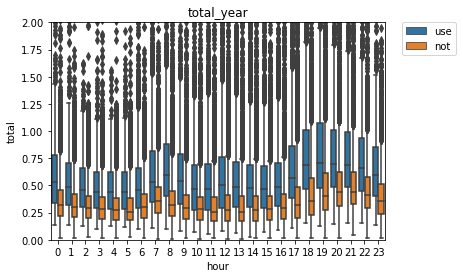

In [320]:
# 총 전력 소비량 - 그림
p1 = sns.boxplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

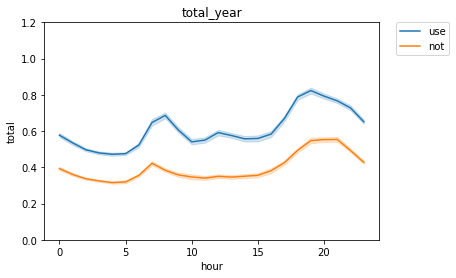

In [321]:
p1 = sns.lineplot(x='시간', y='전력소비량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('total')
p1.set_title('total_year')
plt.show()

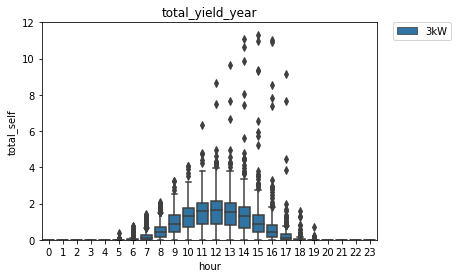

In [322]:
# 총 전력 생산량 - 그림
p1 = sns.boxplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 12.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

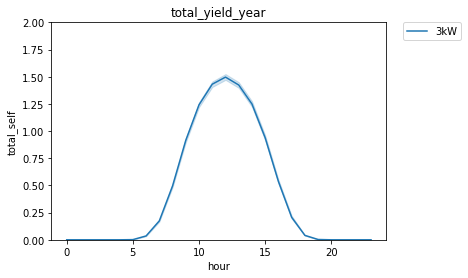

In [323]:
p1 = sns.lineplot(x='시간', y='발전량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('total_self')
p1.set_title('total_yield_year')
plt.show()

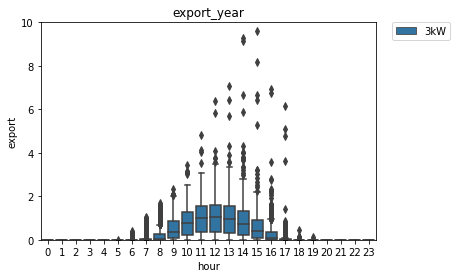

In [324]:
# 총 전력 수출량 - 그림
p1 = sns.boxplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 10.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

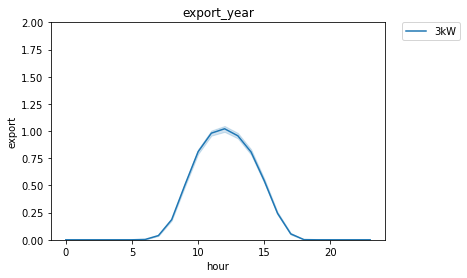

In [325]:
p1 = sns.lineplot(x='시간', y='잉여전력량(kWh)', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('export')
p1.set_title('export_year')
plt.show()

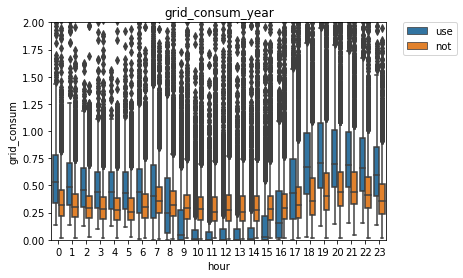

In [326]:
# 총 그리드 소비량 - 그림
p1 = sns.boxplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 2.0)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

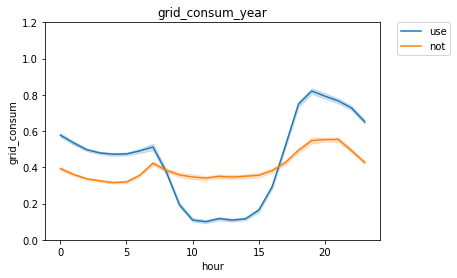

In [327]:
p1 = sns.lineplot(x='시간', y='수전전력량(kWh)', data=df_all_hour_year, hue='type')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.2)
p1.set_xlabel('hour')
p1.set_ylabel('grid_consum')
p1.set_title('grid_consum_year')
plt.show()

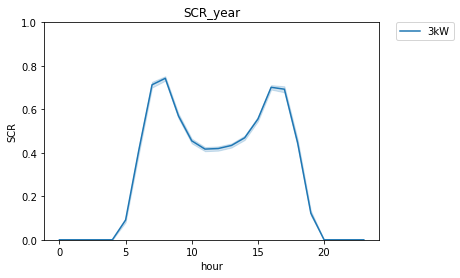

In [328]:
# SCR(자가소비율) - 그림
p1 = sns.lineplot(x='시간', y='자가소비율', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SCR')
p1.set_title('SCR_year')
plt.show()

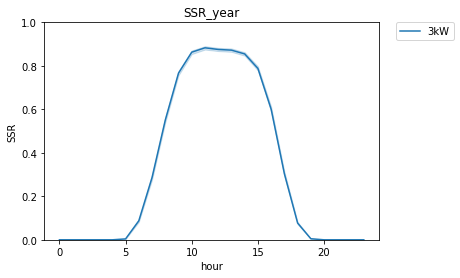

In [329]:
# SSR(자가공급률) - 그림
p1 = sns.lineplot(x='시간', y='자가공급률', data=df_all_hour_year, hue='설비용량(kW)')
p1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
p1.set_ylim(0.0, 1.0)
p1.set_xlabel('hour')
p1.set_ylabel('SSR')
p1.set_title('SSR_year')
plt.show()